# <b>Differential Gene Expression Analysis</b>
## Using DeSEQ2 with biological replicates

In [12]:
import custom_functions_pydeseqEnv as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scanpy as sc
import seaborn as sns
import warnings
from custom_functions_pydeseqEnv import plot_volcano_df, plot_volcano_df_html, return_de
from matplotlib.pyplot import rc_context

In [13]:
# Set the seed
np.random.seed(123)

#warnings.filterwarnings("ignore")

## Loading the data

In [14]:
adata = sc.read_h5ad("../data/taPVAT_8W_24W_M_F_HF_CTRL_combined_preprocessed.h5ad")

In [15]:
annotate = sc.read_h5ad('../data/taPVAT_combined_annotated_with_immune_fibro_ecs.h5ad')

In [17]:
### We'll normalize and log transform the data in adata here
### Deseq will take in data from the "counts" layer which is unnormalized.
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [18]:
### Then we add annotations, clusters, and UMAP coordinates
adata.obs['celltype'] = annotate.obs.celltype.copy() 
adata.obs['celltype_broad'] = annotate.obs.celltype_broad.copy() 
adata.obs['leiden'] = annotate.obs.leiden.copy()
adata.obsm['X_umap'] = annotate.obsm['X_umap'].copy()

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


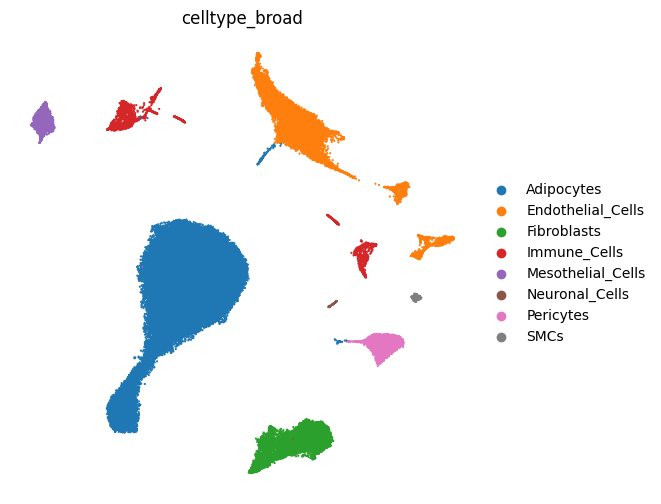

In [19]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['celltype_broad'], frameon = False, s = 10)

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


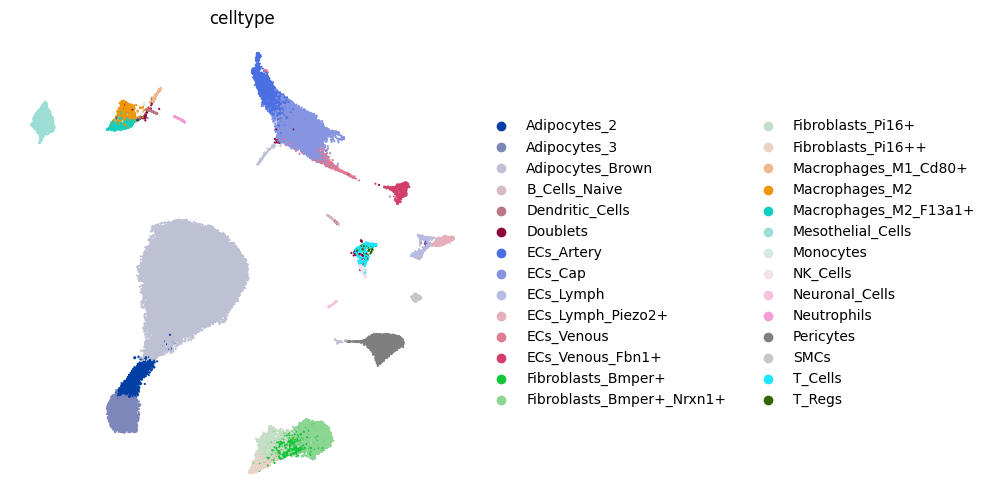

In [10]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['celltype'], frameon = False, s = 10)

## Using DESeq across cell-type comparisons

In [ ]:
%%time
### High level comparisons across whole-tissue
deseqRes = []

celltype = 'test'
group_list = ['celltype_broad']
group1_list = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells', 'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']
group2_list = ['HF', '24W', 'F']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    
    adata_subset = adata.copy()
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    
    ### Run DESeq and save results
    de = return_de(adata, celltype, group, group1, group2)
    de['subset'] = 'None'
    de['sub_id'] = 'None'
    de['sub_2'] = 'None'
    de['sub_id_2'] = 'None'
    de['level'] = 'high'
    deseqRes.append(de)

    ### Generate and save volcano plots
    plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = False)
    plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = False)
    plt.show()

deseqResults1 = pd.concat(deseqRes)
deseqResults1.to_csv('../output/DEGs/taPVAT_whole_tissue_high_level_deseq_all_genes_all.txt', sep = '\t')

## Using DESeq across high-level comparisons

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.53 seconds.

Fitting dispersion trend curve...
... done in 6.42 seconds.

Fitting MAP dispersions...
... done in 13.41 seconds.

Fitting LFCs...
... done in 6.76 seconds.

Refitting 31 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


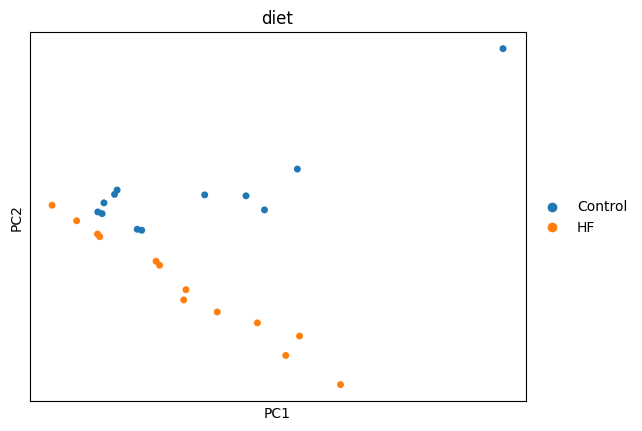

Running Wald tests...
... done in 8.08 seconds.



Log2 fold change & Wald test p-value: diet HF vs Control


baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.259076       -1.034793  2.064518 -0.501228  0.616211   
3110082J24Rik   32.333176        0.266064  0.368619  0.721786  0.470426   
4930404H24Rik    0.323128       -0.615542  1.298288 -0.474118  0.635416   
4930455H04Rik    4.395147        0.037227  0.380655  0.097796  0.922094   
4933400A11Rik    0.657848       -0.292226  0.944307 -0.309461  0.756971   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      7.107155       -0.323677  0.350721 -0.922891  0.356064   
mrpl11         243.000627       -0.004881  0.109072 -0.044752  0.964305   
mrpl24         332.081398       -0.273518  0.091884 -2.976792  0.002913   
mrpl9           95.040702       -0.076703  0.112542 -0.681544  0.495527   
rnf141         173.529653        0.154710  0.098063  1.577653  0.114645   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.721339  
4930404H24Rik       NaN  
4930455H04Rik  0.973323  
4933400A11Rik       NaN  
...                 ...  
hist1h2ail2    0.628652  
mrpl11         0.987904  
mrpl24         0.028758  
mrpl9          0.739007  
rnf141         0.340154  

[20638 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['padj'] = de['padj'].iloc[:] + 1e-199


files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_vs_Control_diet_comparison....


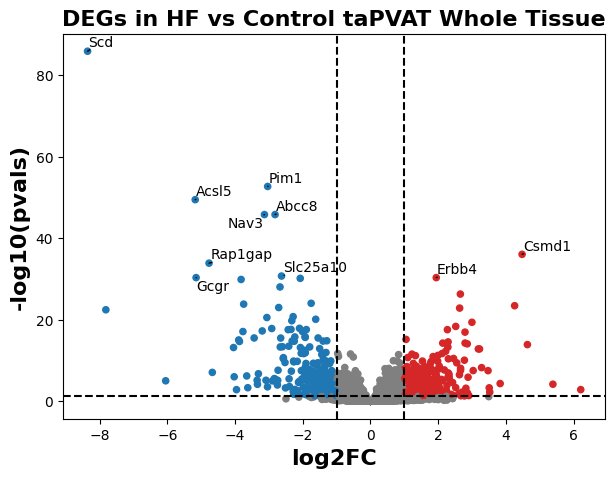

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.31 seconds.

Fitting dispersion trend curve...
... done in 6.33 seconds.

Fitting MAP dispersions...
... done in 13.35 seconds.

Fitting LFCs...
... done in 6.58 seconds.

Refitting 33 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



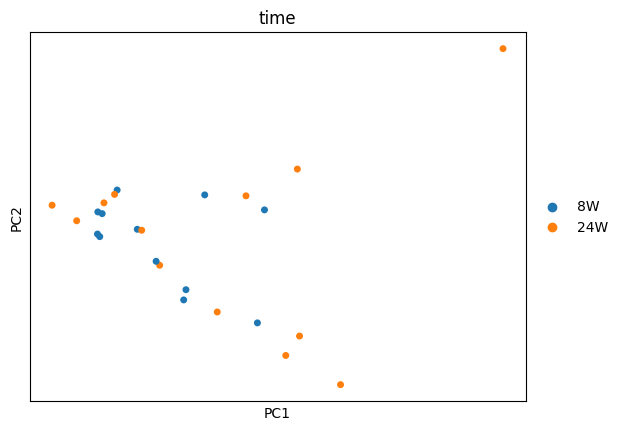

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.08 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.259076       -3.000414  2.155493 -1.391985  0.163927   
3110082J24Rik   32.333176       -0.656785  0.353111 -1.859995  0.062886   
4930404H24Rik    0.323128        1.680394  1.394123  1.205342  0.228071   
4930455H04Rik    4.395147        0.267789  0.376665  0.710947  0.477117   
4933400A11Rik    0.657848        0.544637  0.967283  0.563059  0.573395   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      7.107155       -1.035876  0.304523 -3.401631  0.000670   
mrpl11         243.000627        0.080821  0.108655  0.743832  0.456978   
mrpl24         332.081398        0.032812  0.108400  0.302698  0.762120   
mrpl9           95.040702       -0.323518  0.090703 -3.566772  0.000361   
rnf141         173.529653        0.078923  0.102026  0.773561  0.439190   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.205800  
4930404H24Rik       NaN  
4930455H04Rik  0.689161  
4933400A11Rik       NaN  
...                 ...  
hist1h2ail2    0.009093  
mrpl11         0.672617  
mrpl24         0.885149  
mrpl9          0.005898  
rnf141         0.659018  

[20638 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_vs_8W_time_comparison....


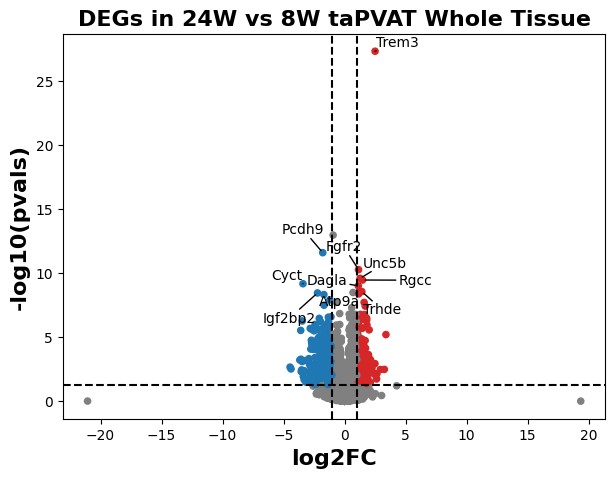

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.29 seconds.

Fitting dispersion trend curve...
... done in 6.32 seconds.

Fitting MAP dispersions...
... done in 13.51 seconds.

Fitting LFCs...
... done in 6.58 seconds.

Refitting 34 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



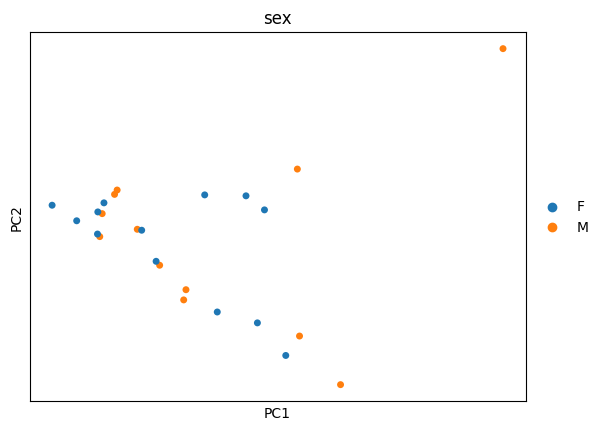

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.23 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.259076        0.761802  2.058205  0.370129  0.711286   
3110082J24Rik   32.333176        0.802014  0.339868  2.359778  0.018286   
4930404H24Rik    0.323128        1.970656  1.338294  1.472513  0.140882   
4930455H04Rik    4.395147       -0.717209  0.353703 -2.027715  0.042589   
4933400A11Rik    0.657848       -0.716696  0.957359 -0.748618  0.454088   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      7.107155        0.311328  0.352417  0.883408  0.377016   
mrpl11         243.000627        0.060259  0.107213  0.562053  0.574080   
mrpl24         332.081398        0.051387  0.108287  0.474540  0.635115   
mrpl9           95.040702       -0.005282  0.113924 -0.046360  0.963023   
rnf141         173.529653        0.145905  0.098068  1.487796  0.136805   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.180533  
4930404H24Rik       NaN  
4930455H04Rik  0.271625  
4933400A11Rik       NaN  
...                 ...  
hist1h2ail2    0.711313  
mrpl11         0.831453  
mrpl24         0.861840  
mrpl9          0.987531  
rnf141         0.463042  

[20638 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_vs_M_sex_comparison....


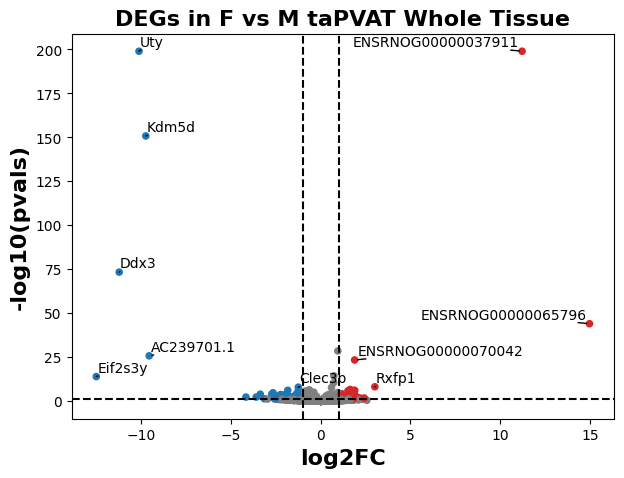

CPU times: user 10min 54s, sys: 47 s, total: 11min 41s
Wall time: 13min 25s


In [9]:
%%time
### High level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    
    adata_subset = adata.copy()
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    
    ### Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    ### Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata, celltype, group, group1, group2)
        de['subset'] = 'None'
        de['sub_id'] = 'None'
        de['sub_2'] = 'None'
        de['sub_id_2'] = 'None'
        de['level'] = 'high'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = False)
        plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = False)
        plt.show()

deseqResults1 = pd.concat(deseqRes)
deseqResults1.to_csv('../output/DEGs/taPVAT_whole_tissue_high_level_deseq_all_genes_all.txt', sep = '\t')

Comparing across diet in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.58 seconds.

Fitting dispersion trend curve...
... done in 6.06 seconds.

Fitting MAP dispersions...
... done in 12.38 seconds.

Fitting LFCs...
... done in 6.29 seconds.

Refitting 48 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



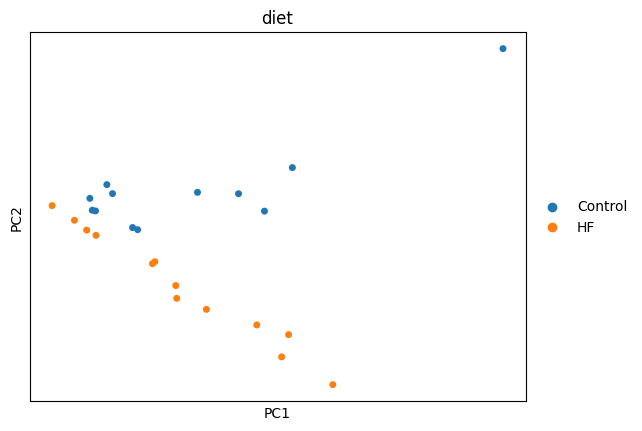

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.16 seconds.



baseMean  log2FoldChange     lfcSE      stat        pvalue  \
3110082J24Rik   31.829409        0.158600  0.378698  0.418803  6.753602e-01   
4930404H24Rik    0.355915       -0.767200  1.307884 -0.586596  5.574749e-01   
4930455H04Rik    3.198805        0.265129  0.485186  0.546449  5.847574e-01   
6330411D24Rik    4.262944        0.999922  0.665390  1.502762  1.329005e-01   
A1cf             0.922657        1.381439  0.982206  1.406466  1.595858e-01   
...                   ...             ...       ...       ...           ...   
hist1h2ail2      2.955139       -0.760580  0.502048 -1.514954  1.297839e-01   
mrpl11         221.660670       -0.089441  0.080524 -1.110734  2.666828e-01   
mrpl24         295.321602       -0.349534  0.069474 -5.031177  4.874775e-07   
mrpl9           71.582780       -0.173354  0.136771 -1.267476  2.049850e-01   
rnf141         110.770203        0.258892  0.136316  1.899204  5.753765e-02   

                   padj  
3110082J24Rik  0.827127  
4930404H24Rik       NaN  
4930455H04Rik  0.767468  
6330411D24Rik  0.323154  
A1cf           0.361236  
...                 ...  
hist1h2ail2    0.317629  
mrpl11         0.494914  
mrpl24         0.000014  
mrpl9          0.423199  
rnf141         0.184511  

[19565 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_HF_vs_Control_diet_comparison....


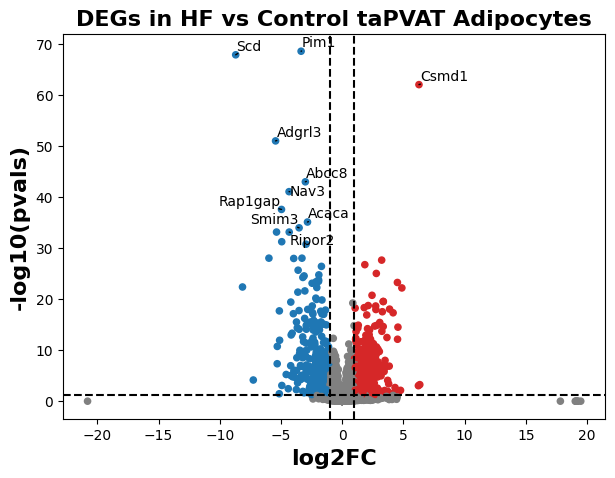

Comparing across diet in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.37 seconds.

Fitting dispersion trend curve...
... done in 4.54 seconds.

Fitting MAP dispersions...
... done in 8.31 seconds.

Fitting LFCs...
... done in 5.13 seconds.

Refitting 29 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



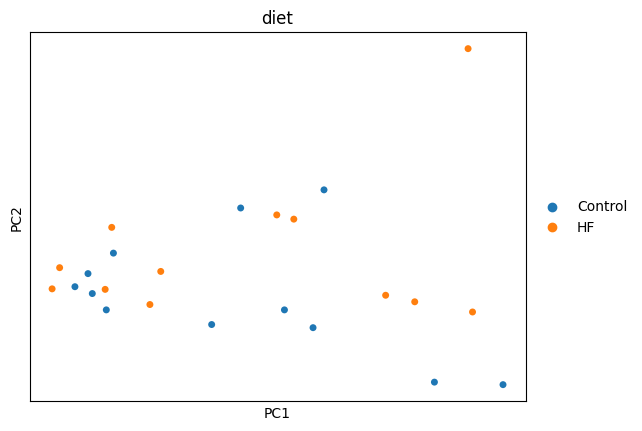

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.63 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik     0.154245        1.027044  1.557181  0.659553  0.509540   
6330411D24Rik    10.258650       -0.039410  0.495117 -0.079598  0.936557   
A2ml1             0.151762       -0.303816  1.792380 -0.169504  0.865400   
A3galt2           1.989109       -0.069129  0.497180 -0.139042  0.889417   
AABR07000398.1  228.243613        0.316427  0.258371  1.224701  0.220688   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.657771        0.634631  0.838137  0.757192  0.448935   
mrpl11            2.066997       -0.159127  0.551614 -0.288475  0.772983   
mrpl24            5.124246        0.002290  0.325674  0.007030  0.994391   
mrpl9             3.148757        1.089310  0.403013  2.702914  0.006873   
rnf141            7.344107       -0.175452  0.253046 -0.693358  0.488085   

                    padj  
3110082J24Rik        NaN  
6330411D24Rik   0.997657  
A2ml1                NaN  
A3galt2         0.994596  
AABR07000398.1  0.880069  
...                  ...  
hist1h2ail2     0.950065  
mrpl11          0.984670  
mrpl24          0.998985  
mrpl9           0.365573  
rnf141          0.954870  

[14886 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_HF_vs_Control_diet_comparison....


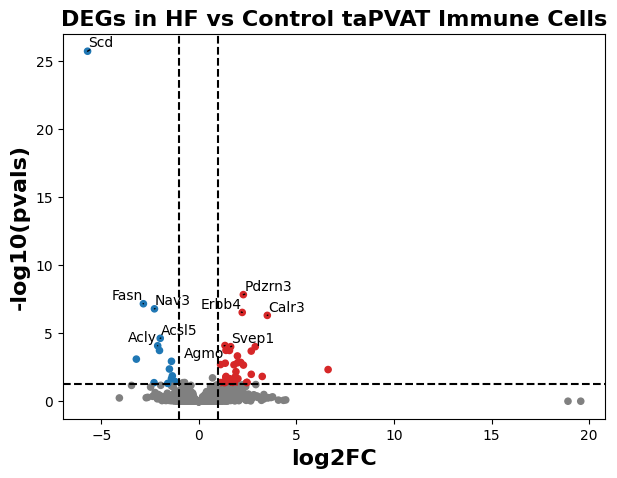

Comparing across diet in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.67 seconds.

Fitting dispersion trend curve...
... done in 5.06 seconds.

Fitting MAP dispersions...
... done in 9.81 seconds.

Fitting LFCs...
... done in 5.55 seconds.

Refitting 16 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

/mnt/home/

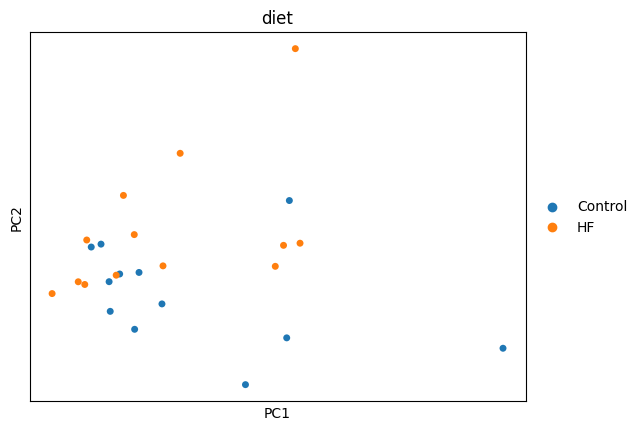

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.83 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik   0.657952        0.068718  0.768550  0.089412  0.928754   
6330411D24Rik   0.322260       -0.690384  1.301220 -0.530567  0.595719   
A2ml1           0.083145       -1.451872  2.531774 -0.573461  0.566333   
A3galt2         8.108542       -0.180697  0.268960 -0.671835  0.501689   
A4galt          0.186706       -2.573652  2.153024 -1.195366  0.231944   
...                  ...             ...       ...       ...       ...   
hist1h2ail2     1.345321        0.030583  0.648477  0.047161  0.962385   
mrpl11          5.146314       -0.185820  0.329720 -0.563570  0.573047   
mrpl24         10.934196       -0.059288  0.221373 -0.267819  0.788839   
mrpl9           7.630979       -0.171959  0.247338 -0.695238  0.486906   
rnf141         24.917993        0.153240  0.194795  0.786674  0.431473   

                   padj  
4930455H04Rik       NaN  
6330411D24Rik       NaN  
A2ml1               NaN  
A3galt2        0.898362  
A4galt              NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.925987  
mrpl24         0.973651  
mrpl9          0.892770  
rnf141         0.873672  

[16641 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_HF_vs_Control_diet_comparison....


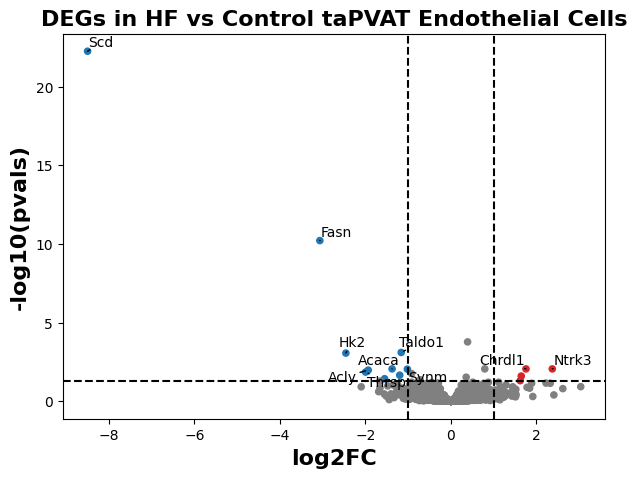

Comparing across diet in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.45 seconds.

Fitting dispersion trend curve...
... done in 4.56 seconds.

Fitting MAP dispersions...
... done in 7.91 seconds.

Fitting LFCs...
... done in 4.91 seconds.

Refitting 15 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

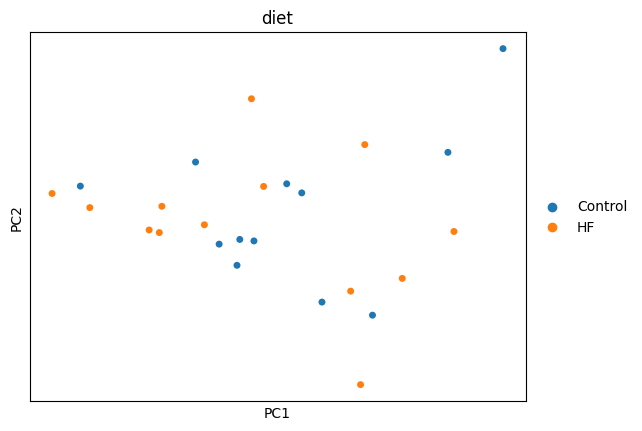

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.56 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2           1.287093       -1.237431  0.690733 -1.791475  0.073217   
AABR07000398.1  103.855907        0.163348  0.209676  0.779050  0.435950   
AABR07000544.1    1.041905       -0.278105  0.697539 -0.398694  0.690118   
AABR07001942.1    3.108596       -0.694927  0.442756 -1.569549  0.116520   
AABR07002627.1    0.176734       -0.745678  1.618659 -0.460676  0.645031   
...                    ...             ...       ...       ...       ...   
Zzz3             15.441128        0.191088  0.186387  1.025220  0.305259   
mrpl11            1.599747       -0.218459  0.529046 -0.412929  0.679658   
mrpl24            2.740518       -0.135516  0.459080 -0.295190  0.767849   
mrpl9             1.821945        0.267806  0.499751  0.535879  0.592042   
rnf141            4.652660       -0.385940  0.343282 -1.124266  0.260900   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.967643  
AABR07000544.1       NaN  
AABR07001942.1  0.800895  
AABR07002627.1       NaN  
...                  ...  
Zzz3            0.924607  
mrpl11               NaN  
mrpl24          0.995234  
mrpl9                NaN  
rnf141          0.914844  

[13973 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_HF_vs_Control_diet_comparison....


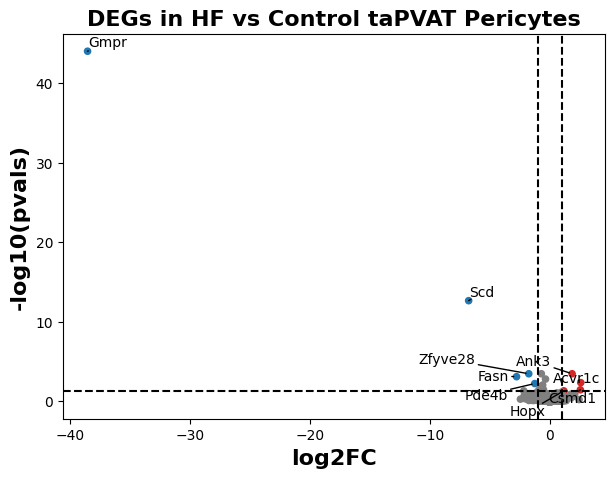

Comparing across diet in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.70 seconds.

Fitting dispersion trend curve...
... done in 4.46 seconds.

Fitting MAP dispersions...
... done in 7.62 seconds.

Fitting LFCs...
... done in 4.89 seconds.

Refitting 8 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/t

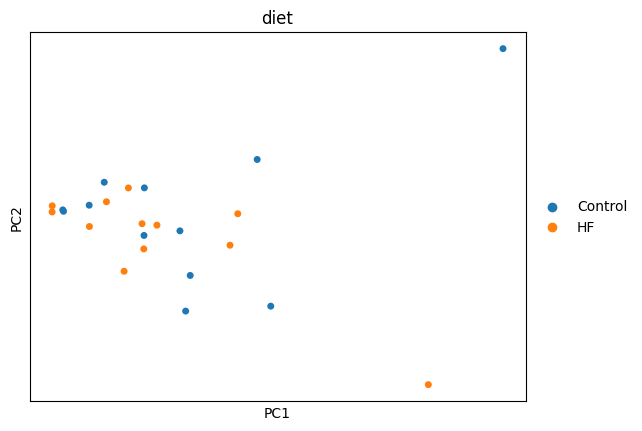

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.62 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.114972       -1.719736  2.134772 -0.805583  0.420483   
6330411D24Rik     0.245019        0.641756  1.585316  0.404812  0.685615   
A3galt2           0.537386        0.132814  0.878396  0.151201  0.879817   
AABR07000398.1  104.881091        0.367654  0.245237  1.499177  0.133828   
AABR07000544.1    0.380520       -0.466131  1.129985 -0.412511  0.679965   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       1.360970       -0.310924  0.564230 -0.551060  0.581593   
mrpl11            1.094775        0.530223  0.604689  0.876853  0.380567   
mrpl24            2.342370       -0.844208  0.502073 -1.681444  0.092677   
mrpl9             0.934873        0.460190  0.650664  0.707261  0.479404   
rnf141            4.118853        0.180430  0.343657  0.525030  0.599562   

                    padj  
4930455H04Rik   0.999422  
6330411D24Rik   0.999422  
A3galt2         0.999422  
AABR07000398.1  0.999422  
AABR07000544.1  0.999422  
...                  ...  
hist1h2ail2     0.999422  
mrpl11          0.999422  
mrpl24          0.999422  
mrpl9           0.999422  
rnf141          0.999422  

[13889 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_HF_vs_Control_diet_comparison....


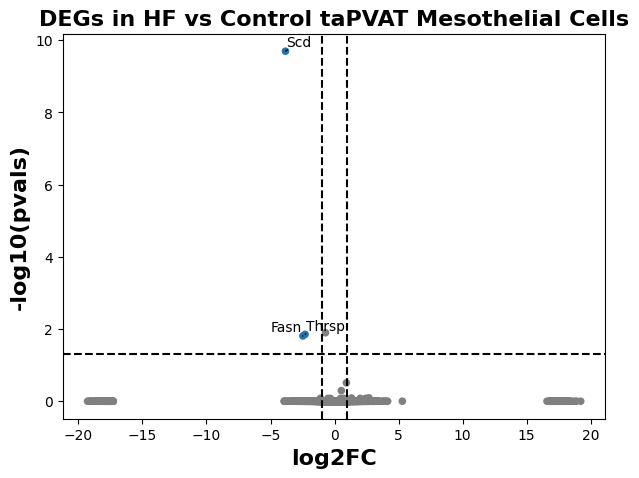

Comparing across diet in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across diet in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
Comparing across time in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across time in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.53 seconds.

Fitting dispersion trend curve...
... done in 6.20 seconds.

Fitting MAP dispersions...
... done in 12.58 seconds.

Fitting LFCs...
... done in 6.43 seconds.

Refitting 51 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



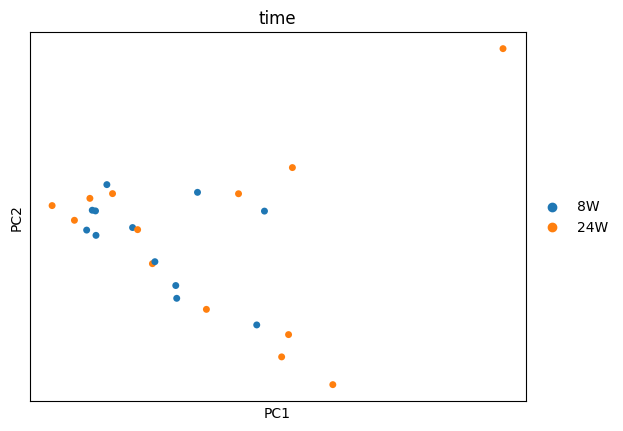

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.17 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.829409       -0.693546  0.361839 -1.916727  0.055273   
4930404H24Rik    0.355915        1.683642  1.406687  1.196885  0.231352   
4930455H04Rik    3.198805        0.091486  0.477454  0.191611  0.848047   
6330411D24Rik    4.262944        0.403208  0.677725  0.594943  0.551881   
A1cf             0.922657       -1.468058  0.976453 -1.503460  0.132720   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      2.955139       -0.903842  0.492004 -1.837062  0.066201   
mrpl11         221.660670        0.053085  0.083358  0.636836  0.524231   
mrpl24         295.321602        0.034837  0.100660  0.346086  0.729278   
mrpl9           71.582780       -0.380923  0.118080 -3.225978  0.001255   
rnf141         110.770203        0.186068  0.142787  1.303123  0.192533   

                   padj  
3110082J24Rik  0.194971  
4930404H24Rik       NaN  
4930455H04Rik  0.928607  
6330411D24Rik  0.746910  
A1cf                NaN  
...                 ...  
hist1h2ail2    0.218500  
mrpl11         0.727135  
mrpl24         0.860946  
mrpl9          0.016060  
rnf141         0.416929  

[19565 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_24W_vs_8W_time_comparison....


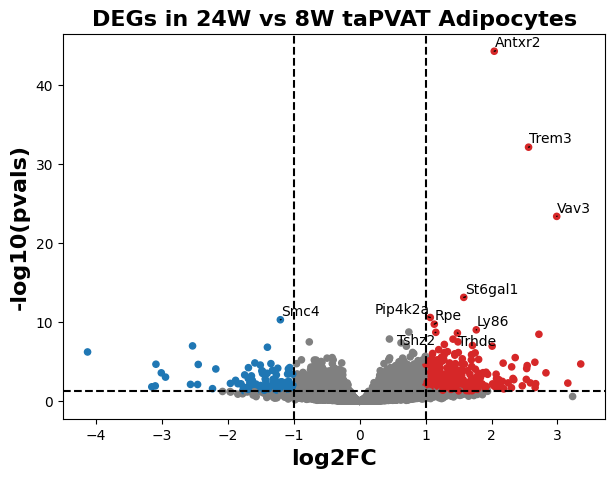

Comparing across time in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.32 seconds.

Fitting dispersion trend curve...
... done in 4.85 seconds.

Fitting MAP dispersions...
... done in 8.28 seconds.

Fitting LFCs...
... done in 5.08 seconds.

Refitting 40 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



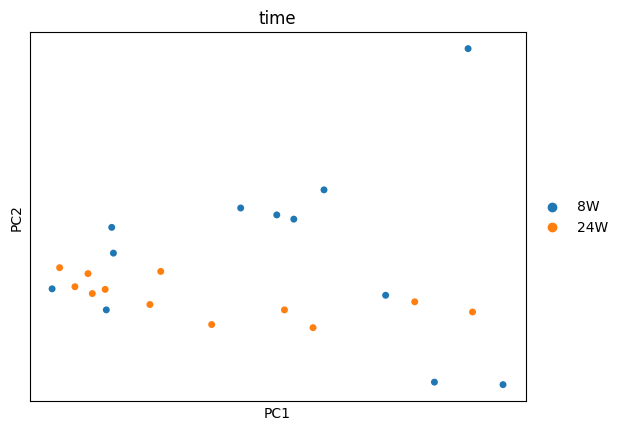

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.65 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
3110082J24Rik     0.154245       -0.379969    1.519431 -0.250073  0.802531   
6330411D24Rik    10.258650        0.578218    0.479961  1.204719  0.228312   
A2ml1             0.151762      -17.211303  266.351139 -0.064619  0.948477   
A3galt2           1.989109        0.015354    0.502850  0.030534  0.975641   
AABR07000398.1  228.243613       -0.376267    0.255383 -1.473345  0.140658   
...                    ...             ...         ...       ...       ...   
hist1h2ail2       0.657771       -0.804121    0.870575 -0.923666  0.355660   
mrpl11            2.066997        0.198255    0.550205  0.360329  0.718601   
mrpl24            5.124246       -0.120471    0.324264 -0.371522  0.710249   
mrpl9             3.148757        0.163437    0.406220  0.402337  0.687436   
rnf141            7.344107        0.343058    0.250380  1.370149  0.170640   

                    padj  
3110082J24Rik        NaN  
6330411D24Rik   0.710100  
A2ml1                NaN  
A3galt2         0.997722  
AABR07000398.1  0.625448  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.931902  
mrpl24          0.929887  
mrpl9           0.922530  
rnf141          0.653373  

[14886 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_24W_vs_8W_time_comparison....


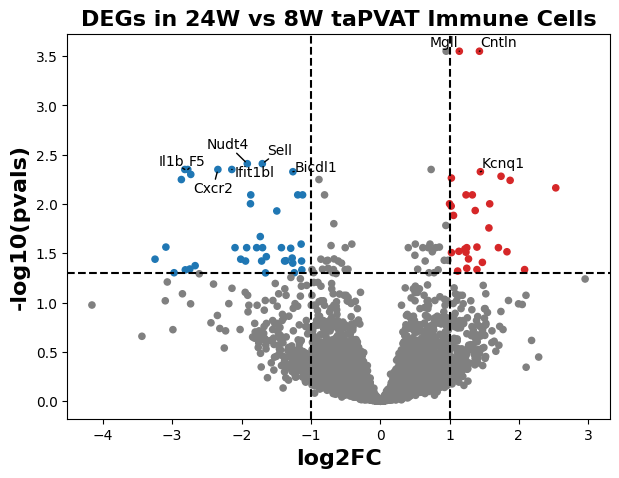

Comparing across time in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.57 seconds.

Fitting dispersion trend curve...
... done in 4.98 seconds.

Fitting MAP dispersions...
... done in 9.55 seconds.

Fitting LFCs...
... done in 5.54 seconds.

Refitting 6 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/t

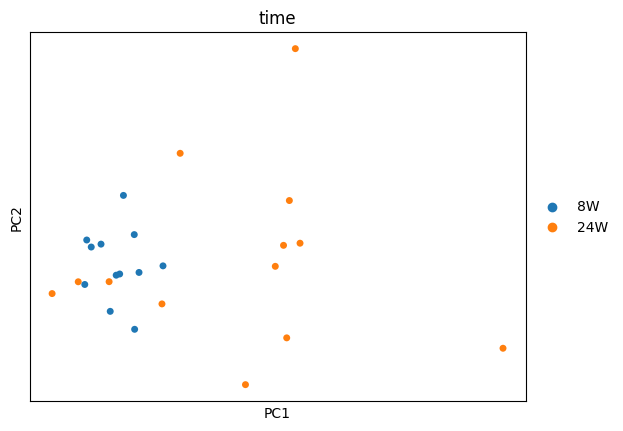

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.81 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik   0.657952        1.209474  0.899727  1.344268  0.178862   
6330411D24Rik   0.322260       -0.663453  1.291867 -0.513561  0.607559   
A2ml1           0.083145       -0.137024  2.471950 -0.055432  0.955795   
A3galt2         8.108542       -0.595155  0.257763 -2.308924  0.020948   
A4galt          0.186706       -0.424812  1.884459 -0.225429  0.821645   
...                  ...             ...       ...       ...       ...   
hist1h2ail2     1.345321       -1.231951  0.601241 -2.049013  0.040461   
mrpl11          5.146314       -0.351357  0.326901 -1.074814  0.282458   
mrpl24         10.934196       -0.265094  0.220311 -1.203271  0.228871   
mrpl9           7.630979        0.112344  0.251423  0.446832  0.654996   
rnf141         24.917993       -0.282095  0.187846 -1.501740  0.133164   

                   padj  
4930455H04Rik       NaN  
6330411D24Rik       NaN  
A2ml1               NaN  
A3galt2        0.162314  
A4galt              NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.650779  
mrpl24         0.597510  
mrpl9          0.886348  
rnf141         0.461597  

[16641 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_24W_vs_8W_time_comparison....


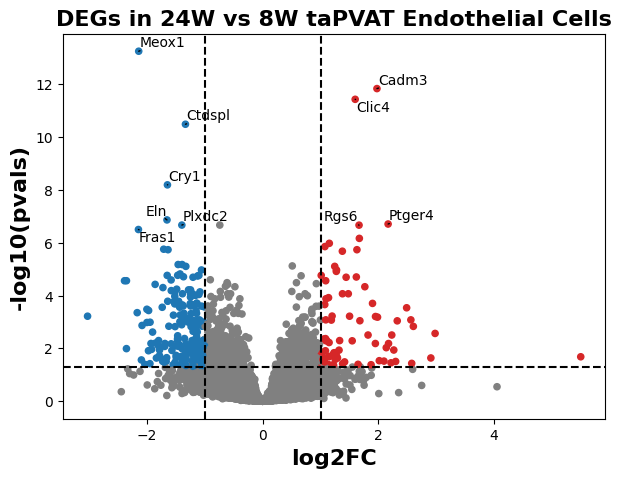

Comparing across time in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.39 seconds.

Fitting dispersion trend curve...
... done in 4.20 seconds.

Fitting MAP dispersions...
... done in 7.85 seconds.

Fitting LFCs...
... done in 4.85 seconds.

Refitting 9 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

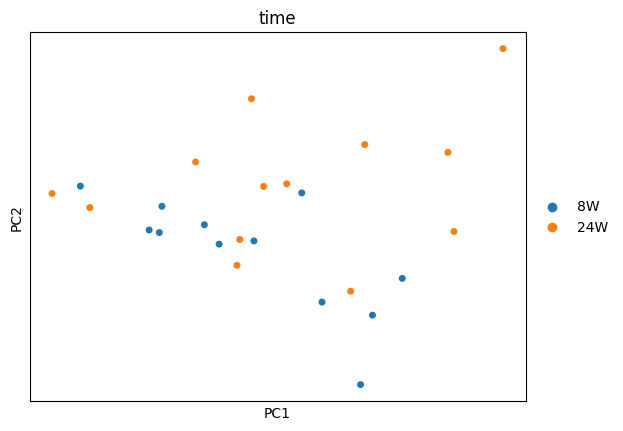

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.51 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2           1.287093       -1.233216  0.672383 -1.834097  0.066640   
AABR07000398.1  103.855907       -0.460946  0.192039 -2.400278  0.016383   
AABR07000544.1    1.041905       -0.160124  0.693821 -0.230785  0.817482   
AABR07001942.1    3.108596       -0.150545  0.454224 -0.331433  0.740318   
AABR07002627.1    0.176734       -0.828330  1.591418 -0.520498  0.602716   
...                    ...             ...       ...       ...       ...   
Zzz3             15.441128        0.133677  0.188468  0.709283  0.478149   
mrpl11            1.599747       -0.080117  0.530114 -0.151132  0.879872   
mrpl24            2.740518       -0.239155  0.461274 -0.518468  0.604132   
mrpl9             1.821945       -0.201523  0.500059 -0.402998  0.686950   
rnf141            4.652660        0.466281  0.344566  1.353241  0.175979   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.343618  
AABR07000544.1       NaN  
AABR07001942.1  0.968372  
AABR07002627.1       NaN  
...                  ...  
Zzz3            0.906769  
mrpl11               NaN  
mrpl24          0.945137  
mrpl9                NaN  
rnf141          0.759204  

[13973 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_24W_vs_8W_time_comparison....


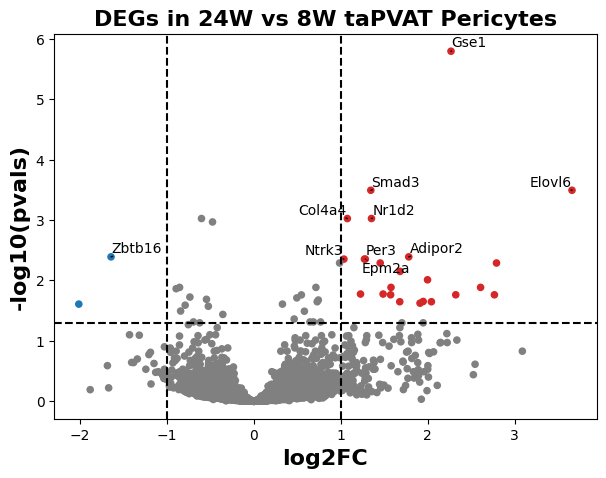

Comparing across time in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.89 seconds.

Fitting dispersion trend curve...
... done in 4.23 seconds.

Fitting MAP dispersions...
... done in 7.56 seconds.

Fitting LFCs...
... done in 5.33 seconds.

Refitting 11 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

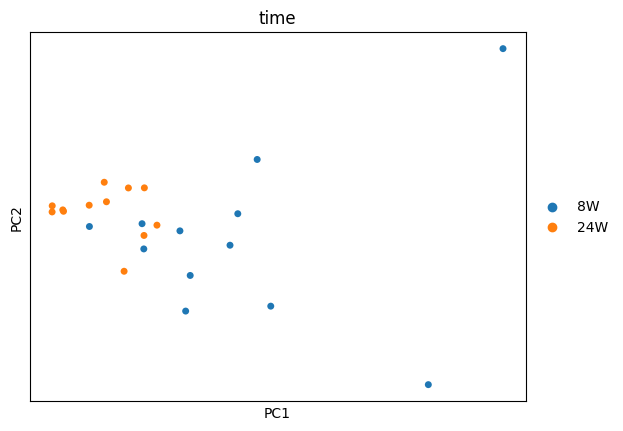

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.56 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.114972       -0.256900  2.053502 -0.125103  0.900442   
6330411D24Rik     0.245019       -1.327969  1.909378 -0.695498  0.486743   
A3galt2           0.537386        0.782402  0.859643  0.910148  0.362744   
AABR07000398.1  104.881091       -0.052820  0.255887 -0.206421  0.836462   
AABR07000544.1    0.380520       -0.122971  1.188554 -0.103462  0.917596   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       1.360970        0.458488  0.554858  0.826317  0.408624   
mrpl11            1.094775       -0.917659  0.715063 -1.283326  0.199378   
mrpl24            2.342370       -0.810281  0.519713 -1.559092  0.118975   
mrpl9             0.934873       -1.636423  0.833083 -1.964297  0.049496   
rnf141            4.118853        0.176019  0.352098  0.499916  0.617134   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.995544  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24          0.811249  
mrpl9                NaN  
rnf141          0.977843  

[13889 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_24W_vs_8W_time_comparison....


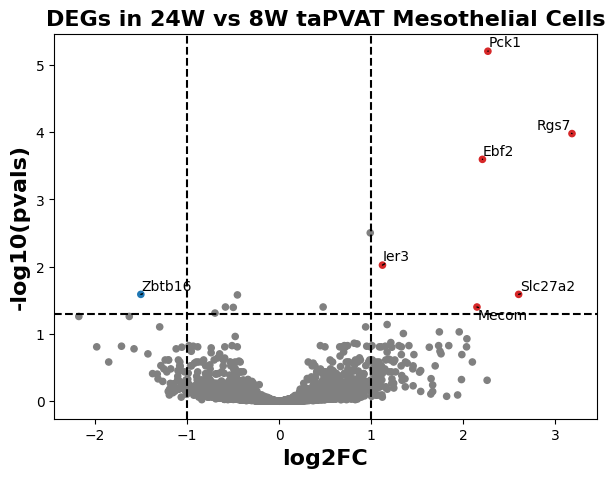

Comparing across time in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across time in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
Comparing across sex in taPVAT Fibroblasts
There are less than 12 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across sex in taPVAT Adipocytes


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 9.52 seconds.

Fitting dispersion trend curve...
... done in 6.12 seconds.

Fitting MAP dispersions...
... done in 12.53 seconds.

Fitting LFCs...
... done in 6.46 seconds.

Refitting 57 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



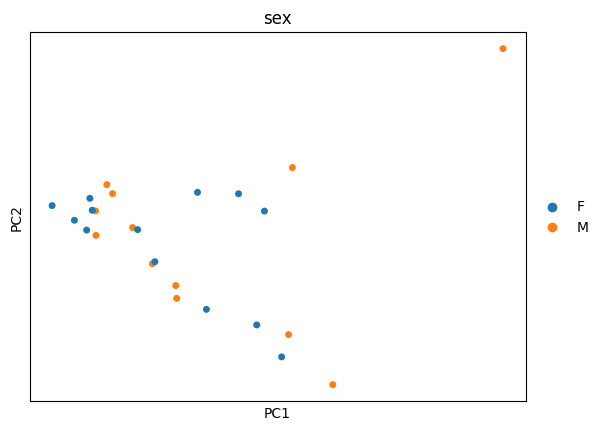

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.11 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.829409        0.819801  0.348562  2.351950  0.018675   
4930404H24Rik    0.355915        2.086664  1.352288  1.543062  0.122816   
4930455H04Rik    3.198805       -0.671954  0.460225 -1.460055  0.144275   
6330411D24Rik    4.262944        0.384963  0.671425  0.573352  0.566406   
A1cf             0.922657        0.363908  0.989636  0.367719  0.713083   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      2.955139        1.065694  0.483710  2.203165  0.027583   
mrpl11         221.660670        0.053855  0.080193  0.671568  0.501859   
mrpl24         295.321602        0.046798  0.100826  0.464147  0.642542   
mrpl9           71.582780        0.024894  0.142128  0.175154  0.860959   
rnf141         110.770203        0.155949  0.142331  1.095684  0.273217   

                   padj  
3110082J24Rik  0.162711  
4930404H24Rik       NaN  
4930455H04Rik  0.461460  
6330411D24Rik  0.820447  
A1cf                NaN  
...                 ...  
hist1h2ail2    0.202710  
mrpl11         0.782744  
mrpl24         0.859138  
mrpl9          0.953041  
rnf141         0.606861  

[19565 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_F_vs_M_sex_comparison....


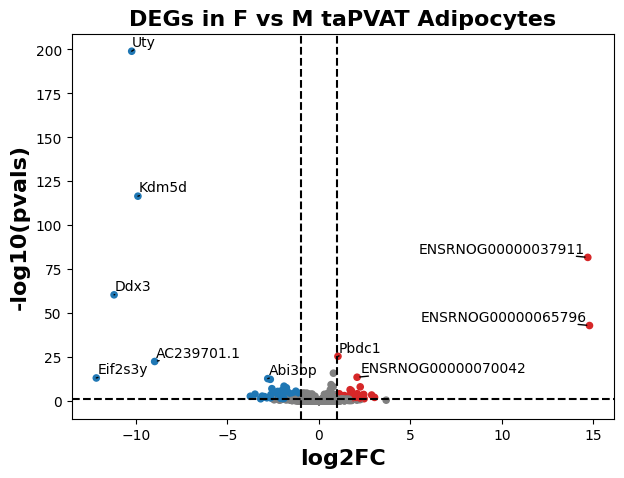

Comparing across sex in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.35 seconds.

Fitting dispersion trend curve...
... done in 4.51 seconds.

Fitting MAP dispersions...
... done in 8.31 seconds.

Fitting LFCs...
... done in 5.13 seconds.

Refitting 35 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



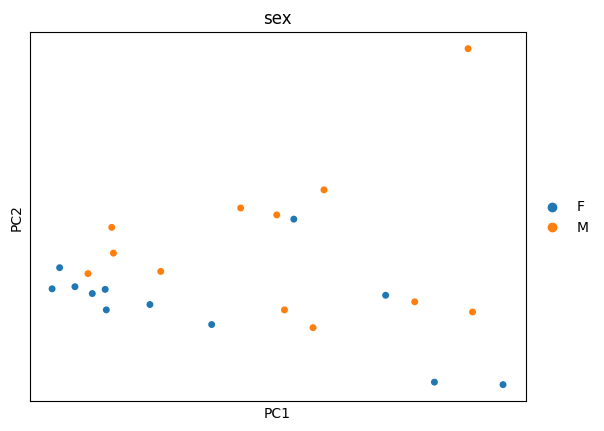

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.68 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik     0.154245       -0.858436  1.579211 -0.543585  0.586727   
6330411D24Rik    10.258650        0.778845  0.468431  1.662666  0.096379   
A2ml1             0.151762       -0.716045  1.856960 -0.385601  0.699793   
A3galt2           1.989109        0.742459  0.482659  1.538270  0.123983   
AABR07000398.1  228.243613       -0.086287  0.264713 -0.325962  0.744453   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.657771       -0.865757  0.879817 -0.984020  0.325106   
mrpl11            2.066997        1.030867  0.504766  2.042266  0.041125   
mrpl24            5.124246        0.434426  0.313281  1.386697  0.165534   
mrpl9             3.148757       -0.199259  0.413562 -0.481810  0.629941   
rnf141            7.344107        0.084334  0.254767  0.331023  0.740627   

                    padj  
3110082J24Rik        NaN  
6330411D24Rik   0.420128  
A2ml1                NaN  
A3galt2              NaN  
AABR07000398.1  0.915039  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.915039  

[14886 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_F_vs_M_sex_comparison....


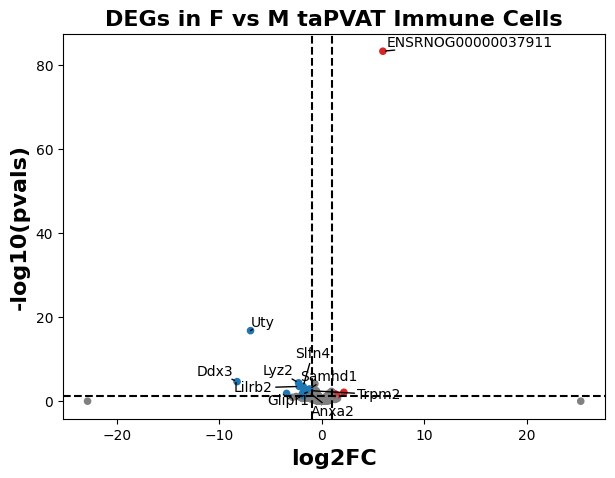

Comparing across sex in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.61 seconds.

Fitting dispersion trend curve...
... done in 5.05 seconds.

Fitting MAP dispersions...
... done in 9.72 seconds.

Fitting LFCs...
... done in 5.52 seconds.

Refitting 9 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



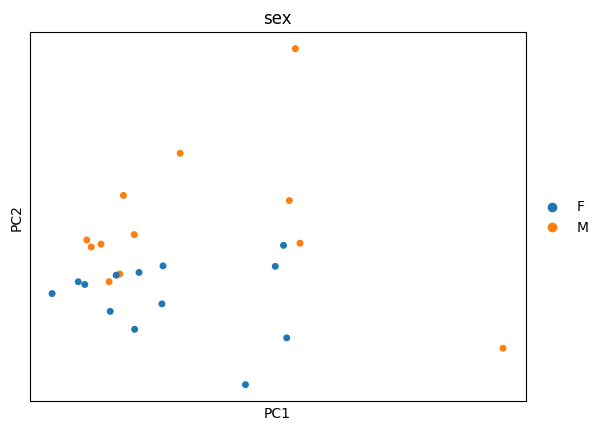

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.87 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik   0.657952       -0.894290  0.775270 -1.153521  0.248696   
6330411D24Rik   0.322260        0.501416  1.296647  0.386702  0.698977   
A2ml1           0.083145       -1.358903  2.543413 -0.534283  0.593146   
A3galt2         8.108542        0.689803  0.240615  2.866828  0.004146   
A4galt          0.186706       -0.068444  1.895414 -0.036110  0.971195   
...                  ...             ...       ...       ...       ...   
hist1h2ail2     1.345321       -0.520308  0.646112 -0.805291  0.420652   
mrpl11          5.146314        0.177081  0.333165  0.531510  0.595065   
mrpl24         10.934196        0.380597  0.212925  1.787473  0.073861   
mrpl9           7.630979        0.116633  0.240259  0.485447  0.627359   
rnf141         24.917993        0.168775  0.194179  0.869172  0.384753   

                   padj  
4930455H04Rik       NaN  
6330411D24Rik       NaN  
A2ml1               NaN  
A3galt2             NaN  
A4galt              NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11              NaN  
mrpl24              NaN  
mrpl9               NaN  
rnf141         0.764385  

[16641 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_F_vs_M_sex_comparison....


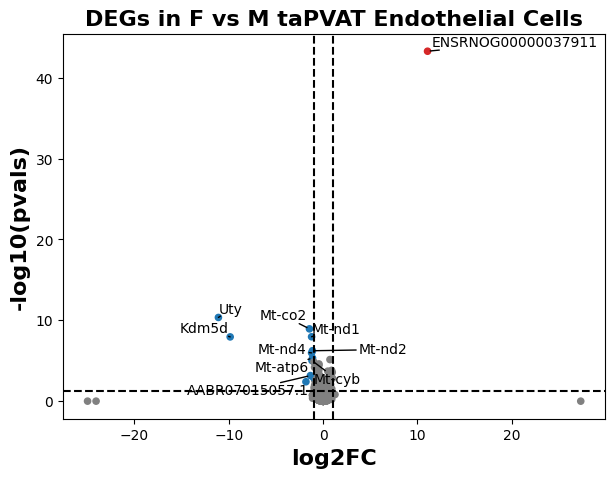

Comparing across sex in taPVAT Pericytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.52 seconds.

Fitting dispersion trend curve...
... done in 4.23 seconds.

Fitting MAP dispersions...
... done in 7.89 seconds.

Fitting LFCs...
... done in 5.00 seconds.

Refitting 18 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MA

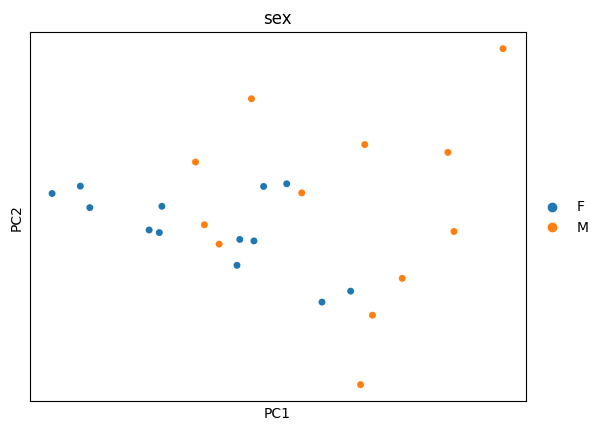

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.59 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2           1.287093        0.252338  0.686251  0.367706  0.713093   
AABR07000398.1  103.855907       -0.338141  0.205598 -1.644672  0.100038   
AABR07000544.1    1.041905       -0.387330  0.709068 -0.546253  0.584892   
AABR07001942.1    3.108596       -0.442133  0.464675 -0.951490  0.341356   
AABR07002627.1    0.176734       -0.705213  1.637696 -0.430613  0.666750   
...                    ...             ...       ...       ...       ...   
Zzz3             15.441128        0.000784  0.190857  0.004110  0.996720   
mrpl11            1.599747       -0.558421  0.539192 -1.035664  0.300359   
mrpl24            2.740518        0.772780  0.440885  1.752791  0.079638   
mrpl9             1.821945       -0.297167  0.505476 -0.587895  0.556603   
rnf141            4.652660       -0.226297  0.349722 -0.647079  0.517581   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.604736  
AABR07000544.1       NaN  
AABR07001942.1       NaN  
AABR07002627.1       NaN  
...                  ...  
Zzz3            0.998727  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[13973 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_F_vs_M_sex_comparison....


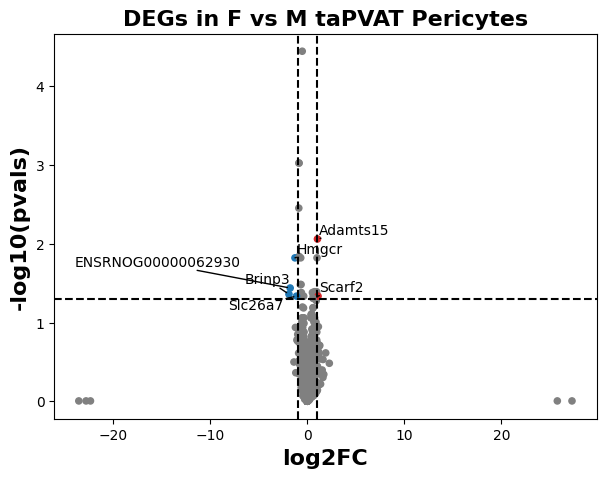

Comparing across sex in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.61 seconds.

Fitting dispersion trend curve...
... done in 4.15 seconds.

Fitting MAP dispersions...
... done in 7.50 seconds.

Fitting LFCs...
... done in 4.96 seconds.

Refitting 8 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/utils.py:767: RuntimeWarning:

M

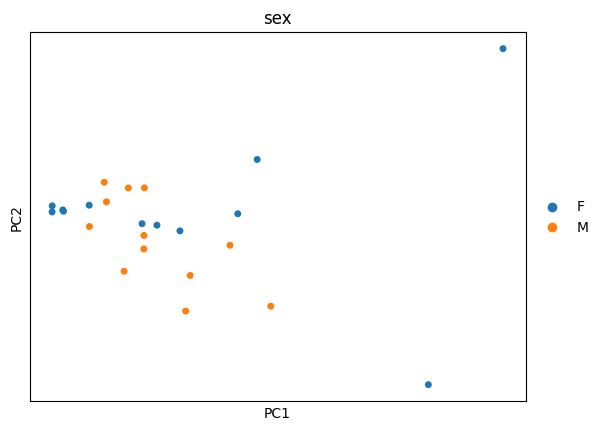

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.48 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4930455H04Rik     0.114972      -17.429780  258.202561 -0.067504  0.946180   
6330411D24Rik     0.245019       -1.304497    1.620031 -0.805229  0.420687   
A3galt2           0.537386       -0.277066    0.882218 -0.314057  0.753478   
AABR07000398.1  104.881091       -0.479772    0.236172 -2.031452  0.042209   
AABR07000544.1    0.380520        0.168654    1.119821  0.150608  0.880285   
...                    ...             ...         ...       ...       ...   
hist1h2ail2       1.360970       -0.298400    0.556054 -0.536639  0.591517   
mrpl11            1.094775        0.446955    0.614941  0.726826  0.467332   
mrpl24            2.342370        0.656661    0.483525  1.358069  0.174442   
mrpl9             0.934873       -0.264365    0.676891 -0.390557  0.696125   
rnf141            4.118853       -0.451726    0.336299 -1.343228  0.179198   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.624241  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[13889 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_F_vs_M_sex_comparison....


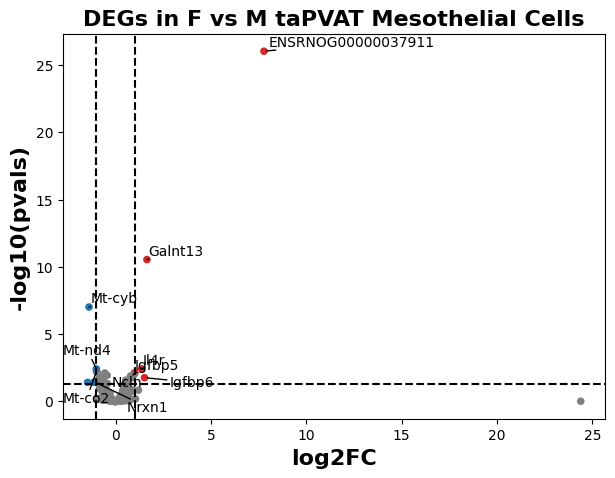

Comparing across sex in taPVAT Neuronal_Cells
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_02     2
P_HF_8W_F_02       2
P_HF_8W_M_01       2
P_CTRL_8W_M_01     2
P_HF_24W_M_01      2
P_CTRL_8W_F_01     2
P_CTRL_24W_F_03    1
P_CTRL_8W_M_03     1
P_HF_24W_F_02      1
P_CTRL_8W_M_02     1
P_HF_24W_M_02      1
Name: count, dtype: int64
Comparing across sex in taPVAT SMCs
There are less than 12 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_HF_8W_F_03      1
P_HF_8W_M_01      1
P_HF_8W_M_02      1
P_CTRL_8W_M_03    1
P_HF_8W_F_02      1
Name: count, dtype: int64
CPU times: user 15min 29s, sys: 1min 20s, total: 16min 49s
Wall time: 22min 39s


In [10]:
%%time
### High level comparisons across 8 broad cell types
deseqRes = []

group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
              
        adata_subset = adata[adata.obs['celltype_broad'] == celltype].copy()
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 12 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2)
            de['subset'] = 'None'
            de['sub_id'] = 'None'
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'high'
            deseqRes.append(de)
              
            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = False)
            plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = False)
            plt.show()
        
deseqResults2 = pd.concat(deseqRes)
deseqResults2.to_csv('../output/DEGs/taPVAT_celltype_broad_high_level_deseq_all_genes_all.txt', sep = '\t')

Comparing across diet in taPVAT Fibroblasts_Bmper+_Nrxn1+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT Adipocytes_2
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    2
Name: count, dtype: int64
Comparing across diet in taPVAT Macrophages_M2


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.74 seconds.

Fitting dispersion trend curve...
... done in 3.67 seconds.

Fitting MAP dispersions...
... done in 5.73 seconds.

Fitting LFCs...
... done in 4.09 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

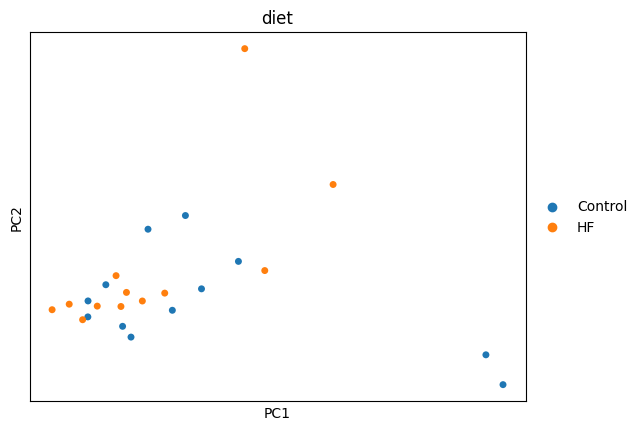

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.39 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6330411D24Rik    1.352040        0.395791  0.714349  0.554058  0.579539   
A3galt2          1.257140        0.553454  0.612443  0.903681  0.366164   
AABR07000398.1  35.773819        0.010972  0.267407  0.041031  0.967271   
AABR07002969.1  23.864825       -0.244062  0.190174 -1.283362  0.199365   
AABR07004891.1   0.489734       -0.617671  0.919463 -0.671774  0.501728   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.322004        2.729060  2.016343  1.353470  0.175905   
mrpl11           0.319461       -0.176015  1.343613 -0.131001  0.895774   
mrpl24           0.620651        0.509747  0.801991  0.635602  0.525036   
mrpl9            0.207148        0.873266  1.359592  0.642300  0.520678   
rnf141           2.190172       -0.367997  0.459095 -0.801570  0.422802   

                    padj  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.998346  
AABR07002969.1  0.859352  
AABR07004891.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.941301  

[11102 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Macrophages_M2_HF_vs_Control_diet_comparison....


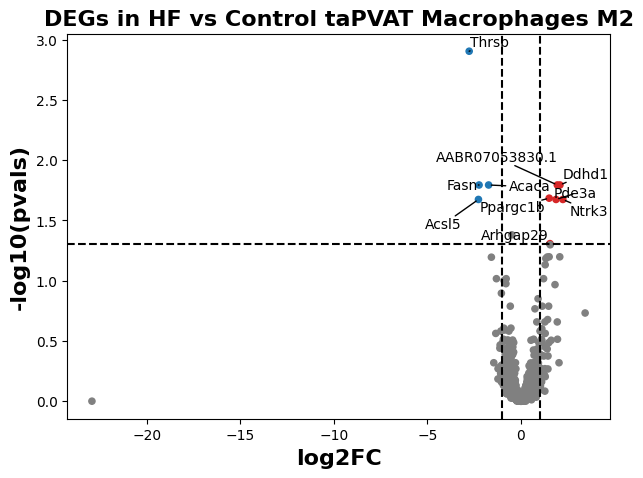

Comparing across diet in taPVAT Adipocytes_Brown


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.44 seconds.

Fitting dispersion trend curve...
... done in 5.91 seconds.

Fitting MAP dispersions...
... done in 12.15 seconds.

Fitting LFCs...
... done in 6.25 seconds.

Refitting 66 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.07 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



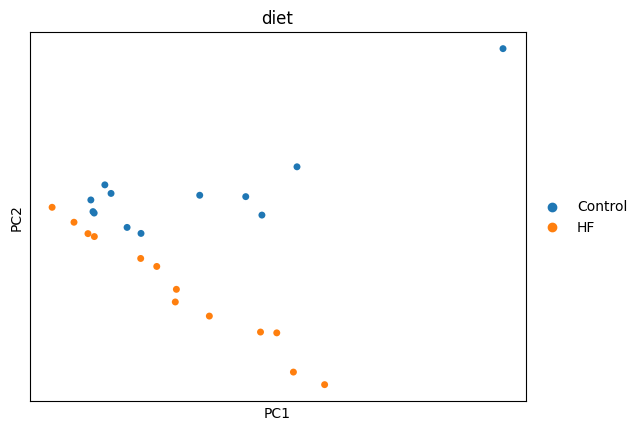

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.21 seconds.



baseMean  log2FoldChange     lfcSE      stat        pvalue  \
3110082J24Rik   31.241640        0.114926  0.367786  0.312480  7.546755e-01   
4930404H24Rik    0.342480       -0.738087  1.301349 -0.567170  5.705986e-01   
4930455H04Rik    2.738920        0.191623  0.488887  0.391958  6.950892e-01   
6330411D24Rik    3.924006        0.977091  0.688890  1.418356  1.560869e-01   
A1cf             0.878748        1.269010  0.993136  1.277781  2.013268e-01   
...                   ...             ...       ...       ...           ...   
hist1h2ail2      2.661203       -0.765279  0.526150 -1.454487  1.458114e-01   
mrpl11         208.942702       -0.091600  0.080863 -1.132784  2.573050e-01   
mrpl24         279.808522       -0.355579  0.071995 -4.938966  7.853797e-07   
mrpl9           65.575244       -0.163248  0.134452 -1.214177  2.246803e-01   
rnf141         100.163249        0.271954  0.144774  1.878474  6.031629e-02   

                   padj  
3110082J24Rik  0.869398  
4930404H24Rik       NaN  
4930455H04Rik  0.832553  
6330411D24Rik  0.338533  
A1cf                NaN  
...                 ...  
hist1h2ail2    0.323976  
mrpl11         0.468180  
mrpl24         0.000018  
mrpl9          0.430542  
rnf141         0.177868  

[19328 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_Brown_HF_vs_Control_diet_comparison....


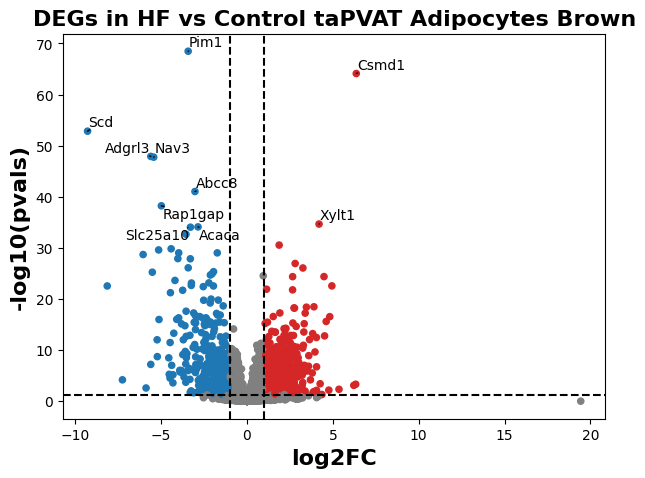

Comparing across diet in taPVAT ECs_Venous_Fbn1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.51 seconds.

Fitting dispersion trend curve...
... done in 3.71 seconds.

Fitting MAP dispersions...
... done in 6.75 seconds.

Fitting LFCs...
... done in 4.48 seconds.

Refitting 13 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/

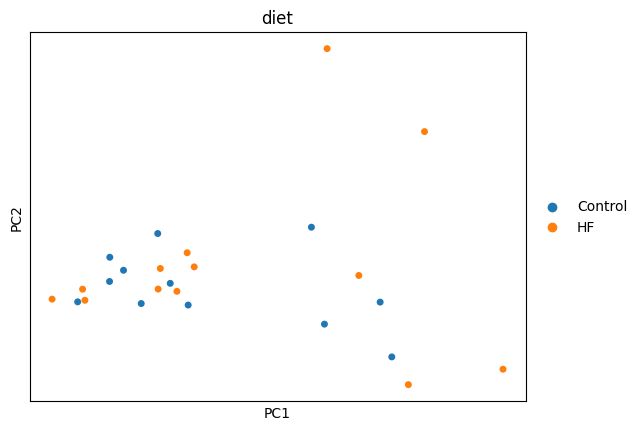

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.48 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.813637       -0.333796  0.700355 -0.476609  0.633640   
AABR07000398.1  44.594482        0.560096  0.317545  1.763832  0.077760   
AABR07001592.2   0.396992       -1.160801  0.985162 -1.178284  0.238683   
AABR07001942.1   0.798685        1.122466  0.874281  1.283874  0.199186   
AABR07002969.1   1.852703        0.292410  0.505276  0.578714  0.562782   
...                   ...             ...       ...       ...       ...   
Zzz3             9.478574        0.408466  0.226262  1.805277  0.071031   
mrpl11           0.250690        1.199595  1.462859  0.820035  0.412196   
mrpl24           1.257648        0.488793  0.687901  0.710557  0.477359   
mrpl9            1.210491        0.514846  0.614893  0.837293  0.402428   
rnf141           1.691591        0.507369  0.510238  0.994377  0.320039   

                    padj  
A3galt2         0.999455  
AABR07000398.1  0.999455  
AABR07001592.2  0.999455  
AABR07001942.1  0.999455  
AABR07002969.1  0.999455  
...                  ...  
Zzz3            0.999455  
mrpl11          0.999455  
mrpl24          0.999455  
mrpl9           0.999455  
rnf141          0.999455  

[12187 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_ECs_Venous_Fbn1+_HF_vs_Control_diet_comparison....


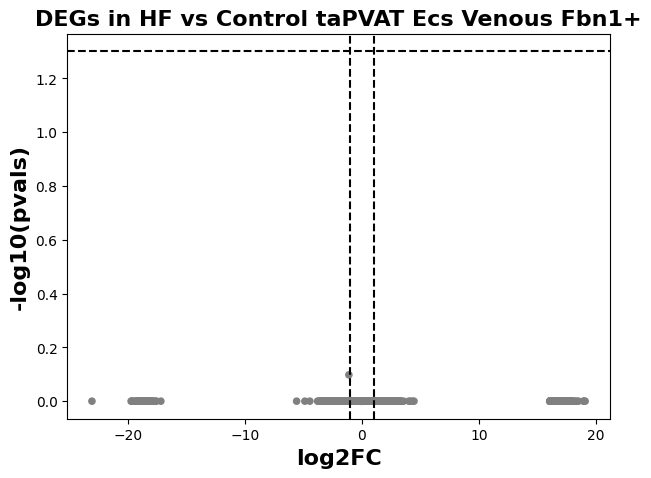

Comparing across diet in taPVAT ECs_Lymph


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.39 seconds.

Fitting dispersion trend curve...
... done in 3.57 seconds.

Fitting MAP dispersions...
... done in 6.54 seconds.

Fitting LFCs...
... done in 4.24 seconds.

Refitting 9 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

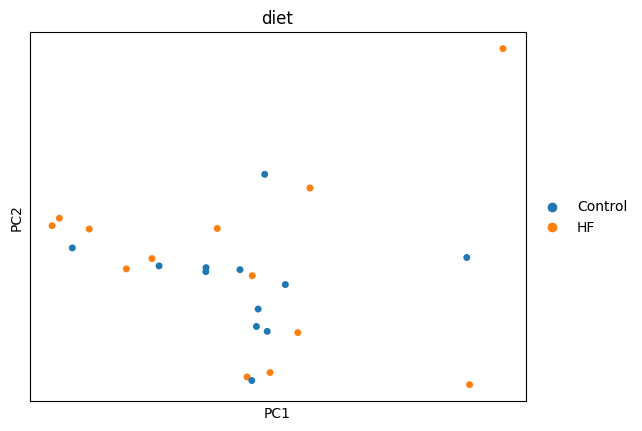

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.36 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.230947       -0.088591  1.330750 -0.066572  0.946922   
AABR07000398.1  31.699712        0.707328  0.410070  1.724895  0.084546   
AABR07000544.1   0.169785        0.144387  1.499784  0.096272  0.923305   
AABR07001592.2   0.771572        0.498479  0.732638  0.680390  0.496258   
AABR07001942.1   0.453397       -0.018506  0.994571 -0.018607  0.985155   
...                   ...             ...       ...       ...       ...   
Zzz3             7.110890        0.306890  0.249509  1.229976  0.218706   
mrpl11           0.569108       -0.735959  1.056552 -0.696567  0.486074   
mrpl24           1.019733        0.195401  0.613785  0.318354  0.750216   
mrpl9            0.352539        0.329436  1.112665  0.296078  0.767170   
rnf141           2.701625        0.062169  0.424164  0.146567  0.883473   

                    padj  
A3galt2         0.999676  
AABR07000398.1  0.999676  
AABR07000544.1  0.999676  
AABR07001592.2  0.999676  
AABR07001942.1  0.999676  
...                  ...  
Zzz3            0.999676  
mrpl11          0.999676  
mrpl24          0.999676  
mrpl9           0.999676  
rnf141          0.999676  

[11859 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_ECs_Lymph_HF_vs_Control_diet_comparison....


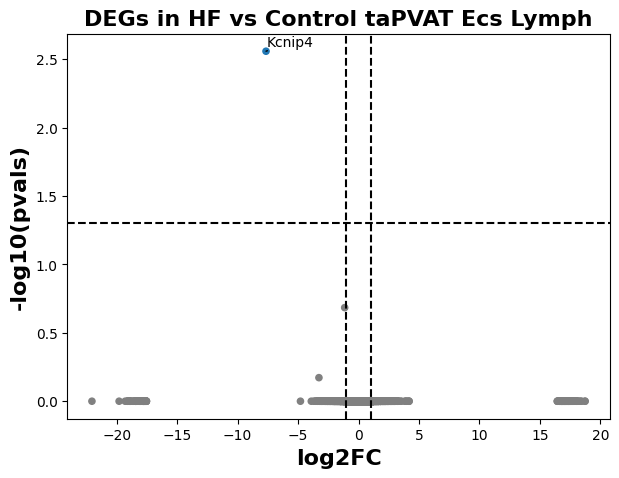

Comparing across diet in taPVAT Fibroblasts_Pi16+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.40 seconds.

Fitting dispersion trend curve...
... done in 4.05 seconds.

Fitting MAP dispersions...
... done in 7.36 seconds.

Fitting LFCs...
... done in 4.66 seconds.

Refitting 14 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



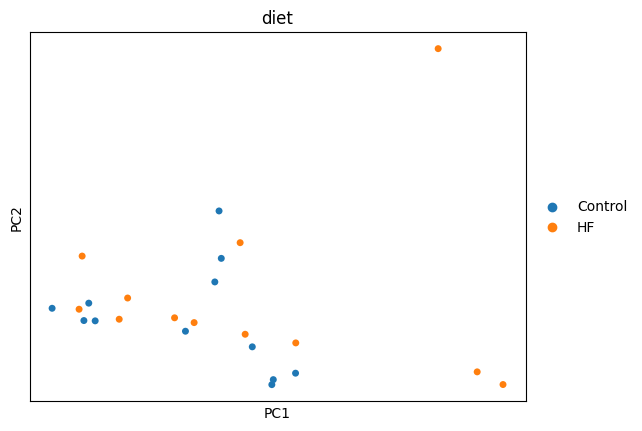

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.56 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik    0.227098       -1.586666  1.755702 -0.903722  0.366143   
6330411D24Rik    0.111472       -0.482464  1.880499 -0.256561  0.797517   
A3galt2          1.847449        0.081915  0.643398  0.127316  0.898690   
AABR07000398.1  88.104550        0.307672  0.252311  1.219417  0.222686   
AABR07000544.1   0.484080       -1.378188  1.488115 -0.926130  0.354379   
...                   ...             ...       ...       ...       ...   
Zzz3            11.528841       -0.134255  0.223356 -0.601080  0.547786   
mrpl11           0.826134       -0.078371  0.794488 -0.098643  0.921422   
mrpl24           2.015844       -0.074869  0.530852 -0.141036  0.887841   
mrpl9            1.476131       -0.042903  0.562043 -0.076333  0.939154   
rnf141           2.908191        0.333121  0.372106  0.895230  0.370664   

                    padj  
4933400A11Rik   0.999405  
6330411D24Rik   0.999405  
A3galt2         0.999405  
AABR07000398.1  0.999405  
AABR07000544.1  0.999405  
...                  ...  
Zzz3            0.999405  
mrpl11          0.999405  
mrpl24          0.999405  
mrpl9           0.999405  
rnf141          0.999405  

[13398 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16+_HF_vs_Control_diet_comparison....


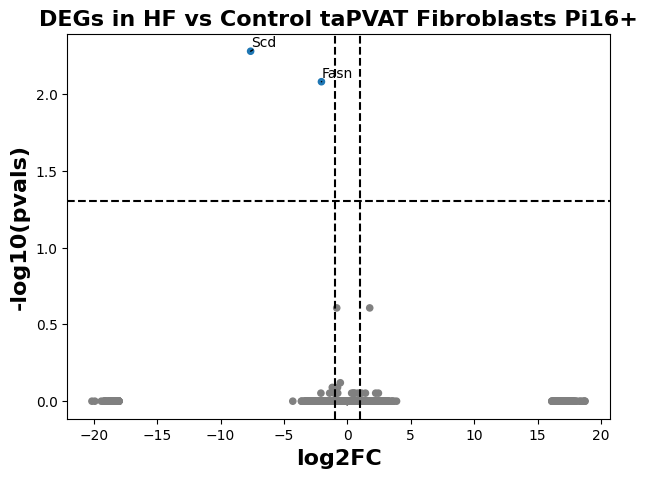

Comparing across diet in taPVAT ECs_Artery


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.20 seconds.

Fitting dispersion trend curve...
... done in 3.97 seconds.

Fitting MAP dispersions...
... done in 7.44 seconds.

Fitting LFCs...
... done in 4.87 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

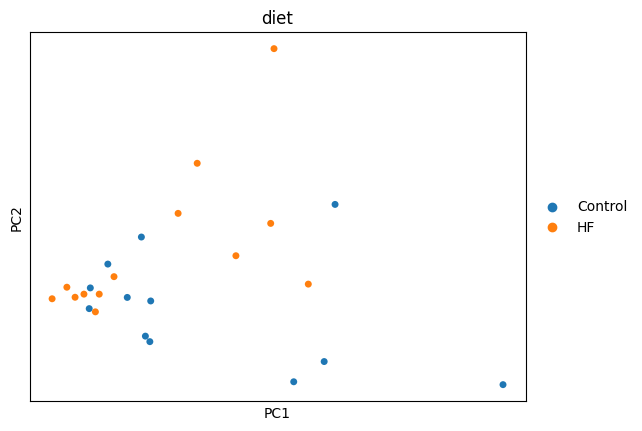

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.67 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik    0.138071        1.422231  1.657006  0.858314  0.390719   
6330411D24Rik    0.043727        1.015367  2.910328  0.348884  0.727176   
A3galt2          2.520876       -0.259688  0.447513 -0.580292  0.561718   
A4galt           0.144901       -2.239874  2.192757 -1.021487  0.307024   
AABR07000398.1  95.363299       -0.000111  0.243692 -0.000454  0.999637   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.154302       -2.388807  2.418102 -0.987885  0.323209   
mrpl11           0.806279       -0.677076  0.787049 -0.860272  0.389639   
mrpl24           1.874449        0.221917  0.448332  0.494984  0.620612   
mrpl9            1.279639        0.118273  0.627437  0.188502  0.850483   
rnf141           2.794297       -0.180168  0.426069 -0.422861  0.672397   

                    padj  
4930455H04Rik   0.998371  
6330411D24Rik   0.998371  
A3galt2         0.998371  
A4galt          0.998371  
AABR07000398.1  0.999880  
...                  ...  
hist1h2ail2     0.998371  
mrpl11          0.998371  
mrpl24          0.998371  
mrpl9           0.998371  
rnf141          0.998371  

[13394 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_ECs_Artery_HF_vs_Control_diet_comparison....


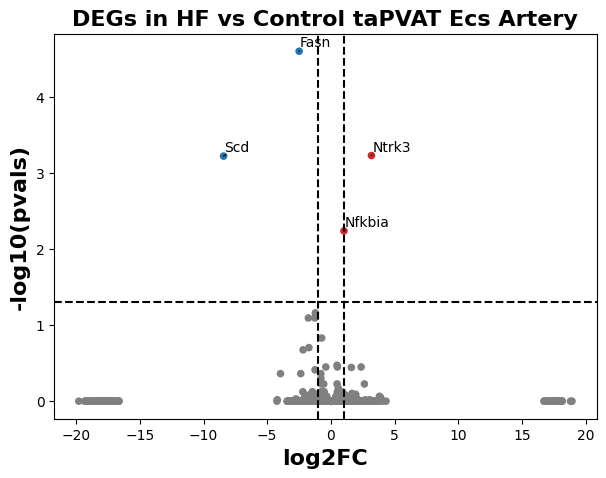

Comparing across diet in taPVAT Adipocytes_3


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.62 seconds.

Fitting dispersion trend curve...
... done in 4.39 seconds.

Fitting MAP dispersions...
... done in 8.05 seconds.

Fitting LFCs...
... done in 5.24 seconds.

Refitting 5 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

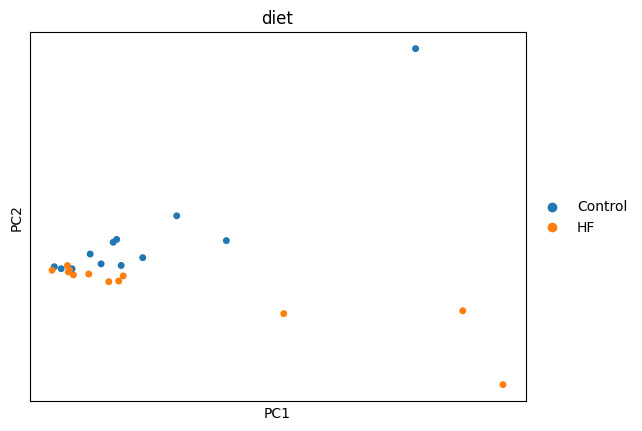

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.63 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.256205       -0.091299  1.340970 -0.068084  0.945719   
6330411D24Rik     0.182879        2.261484  2.131773  1.060846  0.288760   
AABR07000398.1  186.602801        0.113982  0.244729  0.465749  0.641395   
AABR07000544.1    0.676014        0.283464  0.794694  0.356695  0.721320   
AABR07001512.1    0.071297        0.401599  2.233153  0.179835  0.857282   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.239472       -0.509508  1.448399 -0.351774  0.725008   
mrpl11            6.871847       -0.047797  0.324607 -0.147247  0.882937   
mrpl24            8.011141        0.012800  0.241148  0.053078  0.957670   
mrpl9             3.031601       -0.258350  0.434251 -0.594932  0.551889   
rnf141            6.056361       -0.055398  0.284759 -0.194545  0.845749   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
AABR07000398.1  0.993019  
AABR07000544.1       NaN  
AABR07001512.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.997004  
mrpl24          0.998410  
mrpl9           0.986143  
rnf141          0.997004  

[14752 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_3_HF_vs_Control_diet_comparison....


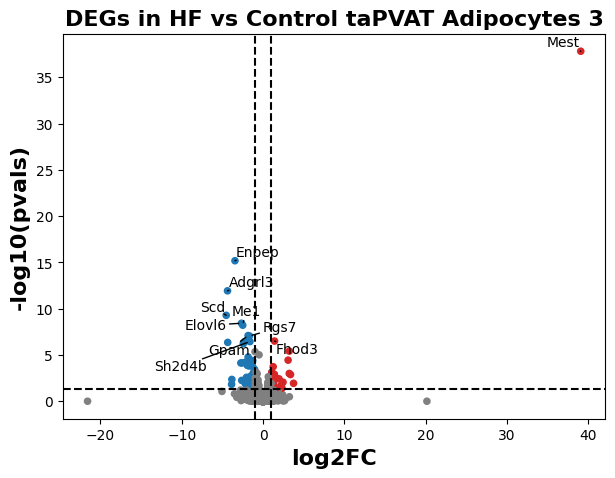

Comparing across diet in taPVAT Macrophages_M2_F13a1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.70 seconds.

Fitting dispersion trend curve...
... done in 3.35 seconds.

Fitting MAP dispersions...
... done in 5.72 seconds.

Fitting LFCs...
... done in 3.98 seconds.

Refitting 1 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

... done in 0.46 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 s

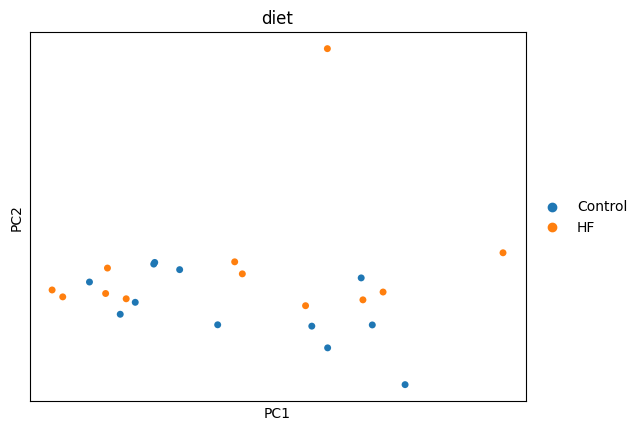

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.28 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6330411D24Rik    7.131699        0.172545  0.363184  0.475090  0.634723   
A3galt2          0.590497       -0.110400  0.844737 -0.130691  0.896019   
AABR07000398.1  35.780783        0.204249  0.249583  0.818359  0.413152   
AABR07002969.1  41.211452       -0.192953  0.166000 -1.162368  0.245086   
AABR07004891.1   0.390426       -1.294592  1.177472 -1.099467  0.271564   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.131989       -1.280226  2.200148 -0.581881  0.560647   
mrpl11           0.487701        0.812113  0.963892  0.842536  0.399488   
mrpl24           0.699165       -1.540869  0.918024 -1.678463  0.093257   
mrpl9            0.434351       -0.579381  1.132230 -0.511717  0.608849   
rnf141           2.248872        0.203257  0.423016  0.480494  0.630876   

                    padj  
6330411D24Rik   0.998916  
A3galt2         0.998916  
AABR07000398.1  0.998916  
AABR07002969.1  0.998916  
AABR07004891.1  0.998916  
...                  ...  
hist1h2ail2     0.998916  
mrpl11          0.998916  
mrpl24          0.998916  
mrpl9           0.998916  
rnf141          0.998916  

[10830 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Macrophages_M2_F13a1+_HF_vs_Control_diet_comparison....


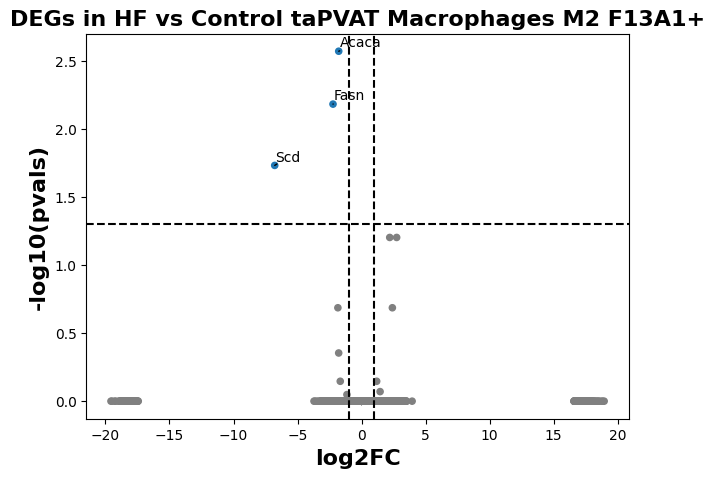

Comparing across diet in taPVAT ECs_Cap


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.54 seconds.

Fitting dispersion trend curve...
... done in 4.49 seconds.

Fitting MAP dispersions...
... done in 8.33 seconds.

Fitting LFCs...
... done in 5.30 seconds.

Refitting 19 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

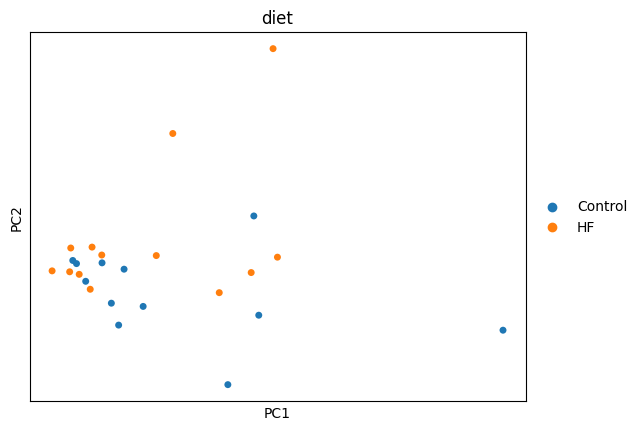

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.83 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.409209       -0.442041  0.963448 -0.458812  0.646369   
6330411D24Rik     0.164530        0.966151  2.224332  0.434355  0.664030   
A3galt2           2.551477       -0.282360  0.450526 -0.626735  0.530833   
AABR07000398.1  265.737154        0.193433  0.307830  0.628378  0.529756   
AABR07000544.1    0.181598        0.801871  1.395437  0.574638  0.565536   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.643871        0.590210  0.988098  0.597320  0.550294   
mrpl11            2.244345       -0.527585  0.543868 -0.970060  0.332017   
mrpl24            4.339981       -0.285442  0.312861 -0.912361  0.361579   
mrpl9             3.259174       -0.588557  0.368308 -1.598003  0.110042   
rnf141            5.700391       -0.004247  0.299967 -0.014159  0.988703   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.923734  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24          0.860245  
mrpl9                NaN  
rnf141          0.997521  

[14932 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Cap_HF_vs_Control_diet_comparison....


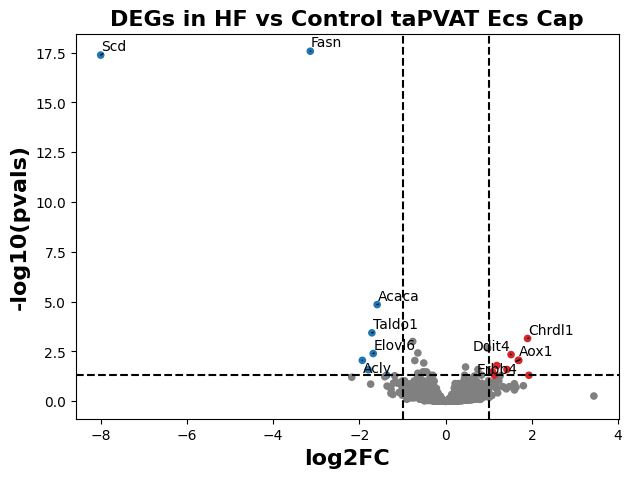

Comparing across diet in taPVAT Fibroblasts_Bmper+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.89 seconds.

Fitting dispersion trend curve...
... done in 3.89 seconds.

Fitting MAP dispersions...
... done in 6.92 seconds.

Fitting LFCs...
... done in 4.35 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



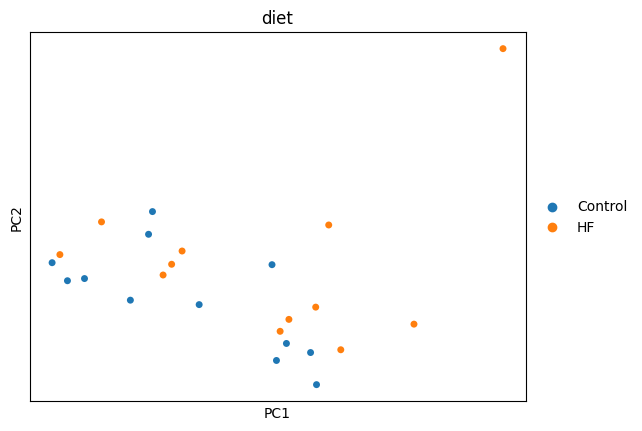

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.39 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik    0.083221       -1.659396  2.321553 -0.714779  0.474746   
A3galt2          0.747801        0.733604  0.787443  0.931628  0.351529   
AABR07000398.1  80.616195        0.051570  0.207898  0.248054  0.804093   
AABR07000544.1   0.144294        1.608156  1.882289  0.854362  0.392904   
AABR07001942.1   0.596555       -1.955341  0.982881 -1.989398  0.046657   
...                   ...             ...       ...       ...       ...   
Zzz3            11.245333        0.107304  0.216415  0.495825  0.620018   
mrpl11           0.419523        0.542988  1.064200  0.510231  0.609890   
mrpl24           1.111081        0.565545  0.617173  0.916348  0.359484   
mrpl9            0.944631       -0.452740  0.698462 -0.648195  0.516859   
rnf141           2.497083       -0.439333  0.398167 -1.103389  0.269858   

                    padj  
4933400A11Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.978873  
AABR07000544.1       NaN  
AABR07001942.1       NaN  
...                  ...  
Zzz3            0.969179  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.876272  

[12520 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Bmper+_HF_vs_Control_diet_comparison....


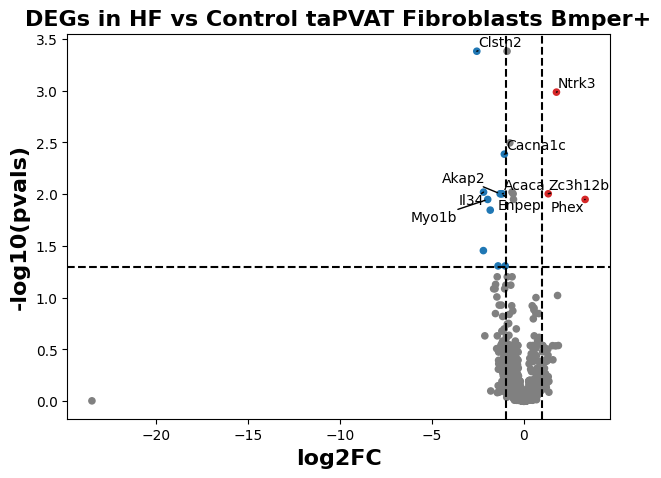

Comparing across diet in taPVAT ECs_Lymph_Piezo2+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    2
Name: count, dtype: int64
Comparing across diet in taPVAT Neutrophils
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       1
P_CTRL_24W_M_03    1
P_CTRL_8W_F_03     1
P_HF_24W_F_02      1
P_HF_24W_F_04      1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across diet in taPVAT T_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.25 seconds.

Fitting dispersion trend curve...
... done in 3.10 seconds.

Fitting MAP dispersions...
... done in 5.43 seconds.

Fitting LFCs...
... done in 3.88 seconds.

Refitting 38 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



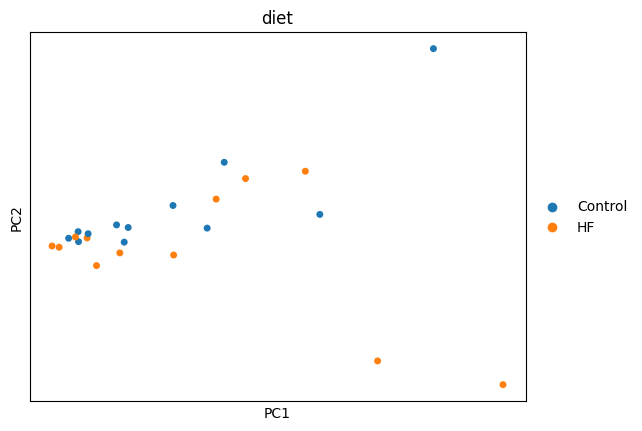

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.42 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
A2ml1            0.093610        0.125952  2.396448  0.052558  0.958084   1.0
AABR07000398.1  37.651115        0.566629  0.274147  2.066879  0.038746   1.0
AABR07002969.1   0.781082       -0.066456  0.745334 -0.089162  0.928953   1.0
AABR07005588.1   0.289951       -0.481234  1.078955 -0.446018  0.655584   1.0
AABR07007032.1  13.131359       -0.286689  0.240523 -1.191942  0.233284   1.0
...                   ...             ...       ...       ...       ...   ...
hist1h2ail2      0.120055        2.125925  2.373295  0.895769  0.370376   1.0
mrpl11           0.136256       -2.219002  2.180846 -1.017496  0.308918   1.0
mrpl24           0.759484        0.685662  0.726199  0.944179  0.345078   1.0
mrpl9            0.617085        1.282562  1.008953  1.271181  0.203664   1.0
rnf141           0.132433       -0.122338  1.938099 -0.063123  0.949669   1.0

[10371 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_T_Cells_HF_vs_Control_diet_comparison....


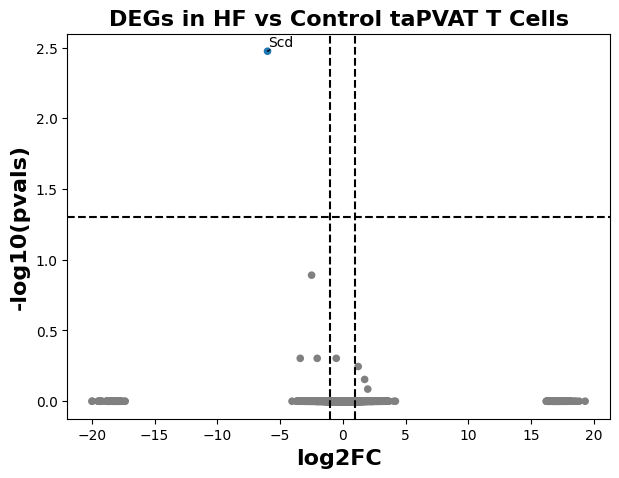

Comparing across diet in taPVAT Doublets
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       2
P_CTRL_24W_M_03    2
P_CTRL_8W_M_02     2
P_CTRL_8W_M_01     2
P_HF_24W_F_01      1
P_CTRL_24W_F_03    1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across diet in taPVAT Fibroblasts_Pi16++


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.60 seconds.

Fitting dispersion trend curve...
... done in 3.75 seconds.

Fitting MAP dispersions...
... done in 6.53 seconds.

Fitting LFCs...
... done in 4.27 seconds.

Refitting 4 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

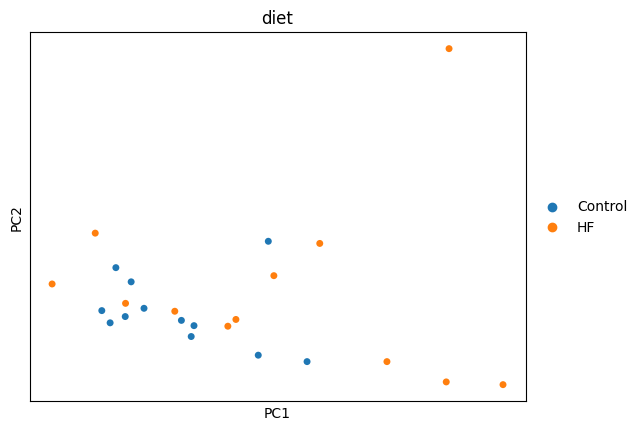

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.35 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4933400A11Rik    0.076763        0.091992    2.319723  0.039656  0.968367   
A3galt2          0.906427       -1.385156    0.727905 -1.902935  0.057049   
AABR07000398.1  75.749387        0.267122    0.287483  0.929173  0.352799   
AABR07001942.1   0.646792       -0.230267    0.922911 -0.249500  0.802974   
AABR07002467.1   0.152648      -18.468435  357.824665 -0.051613  0.958837   
...                   ...             ...         ...       ...       ...   
Zzz3             7.546010       -0.122803    0.242343 -0.506731  0.612343   
mrpl11           0.625120       -0.300216    0.820106 -0.366070  0.714313   
mrpl24           1.041941        0.225686    0.657618  0.343187  0.731458   
mrpl9            1.069111        1.107857    0.679658  1.630023  0.103097   
rnf141           0.890237       -0.131322    0.692578 -0.189613  0.849613   

                    padj  
4933400A11Rik   0.999746  
A3galt2         0.999746  
AABR07000398.1  0.999746  
AABR07001942.1  0.999746  
AABR07002467.1  0.999746  
...                  ...  
Zzz3            0.999746  
mrpl11          0.999746  
mrpl24          0.999746  
mrpl9           0.999746  
rnf141          0.999746  

[12108 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16++_HF_vs_Control_diet_comparison....


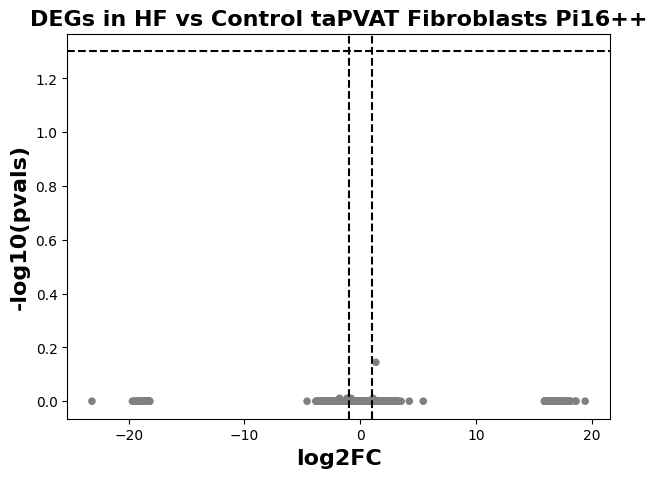

Comparing across diet in taPVAT ECs_Venous


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.95 seconds.

Fitting dispersion trend curve...
... done in 3.48 seconds.

Fitting MAP dispersions...
... done in 6.31 seconds.

Fitting LFCs...
... done in 4.32 seconds.

Refitting 7 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

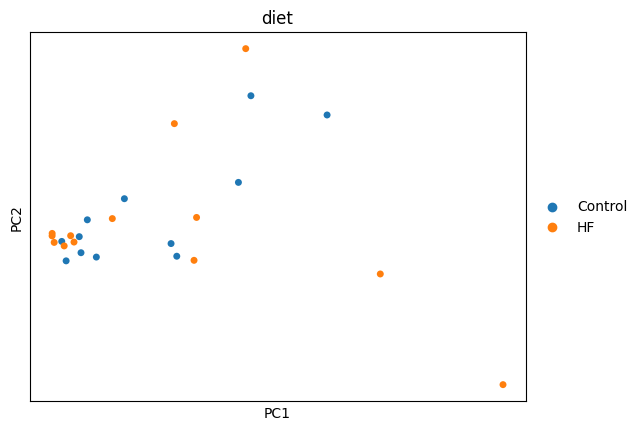

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.14 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.596717        0.680099  0.830479  0.818924  0.412830   
AABR07000398.1  25.927528        0.226326  0.352461  0.642129  0.520790   
AABR07001592.2   0.104361        0.205333  1.599806  0.128349  0.897873   
AABR07001942.1   0.424355       -0.957365  1.103783 -0.867349  0.385751   
AABR07002969.1   0.798046       -0.759929  0.772356 -0.983911  0.325159   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.399686        1.143445  2.462962  0.464256  0.642464   
mrpl11           0.337220       -0.737081  1.097744 -0.671451  0.501933   
mrpl24           0.598267       -0.841333  0.794762 -1.058597  0.289783   
mrpl9            0.246717       -1.108390  1.198754 -0.924619  0.355164   
rnf141           0.493010        0.060530  0.793229  0.076308  0.939174   

                    padj  
A3galt2         0.998867  
AABR07000398.1  0.998867  
AABR07001592.2  0.998867  
AABR07001942.1  0.998867  
AABR07002969.1  0.998867  
...                  ...  
hist1h2ail2     0.998867  
mrpl11          0.998867  
mrpl24          0.998867  
mrpl9           0.998867  
rnf141          0.998867  

[11347 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_ECs_Venous_HF_vs_Control_diet_comparison....


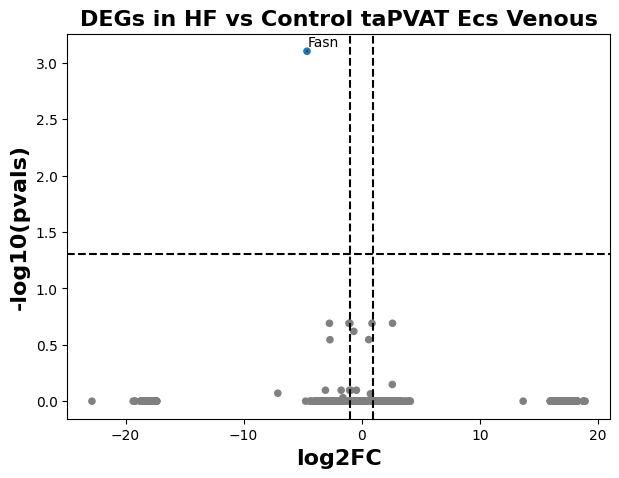

Comparing across diet in taPVAT Macrophages_M1_Cd80+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_01    2
Name: count, dtype: int64
Comparing across diet in taPVAT Dendritic_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_M_02       2
P_CTRL_24W_M_01    2
P_CTRL_24W_F_02    2
P_CTRL_8W_M_03     2
P_CTRL_8W_M_02     1
P_CTRL_8W_M_01     1
P_HF_8W_F_01       1
Name: count, dtype: int64
Comparing across diet in taPVAT B_Cells_Naive
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_02    2
P_CTRL_24W_F_03    1
P_CTRL_24W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT NK_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_02     2
P_CTRL_8W_F_01    1
Name: count, dtype: int64
Comparing across diet in taPVAT T_Regs
There are less than 3 cells of this cell type in the following samples

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.73 seconds.

Fitting dispersion trend curve...
... done in 3.39 seconds.

Fitting MAP dispersions...
... done in 5.84 seconds.

Fitting LFCs...
... done in 4.11 seconds.

Refitting 2 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/utils.py:767: RuntimeWarning:

Mean of empty slice.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean 

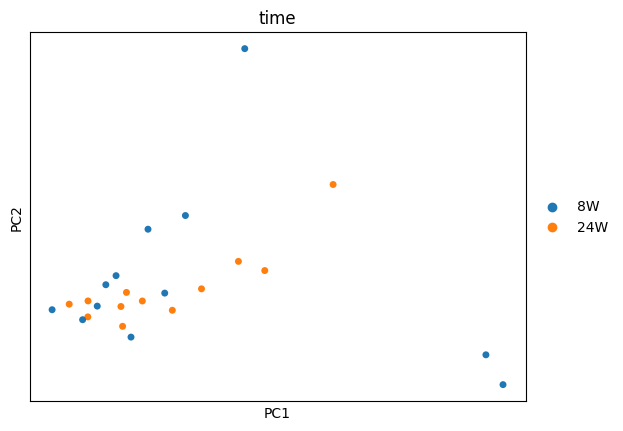

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.37 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
6330411D24Rik    1.352040       -0.518321    0.708729 -0.731338  0.464572   
A3galt2          1.257140        0.167446    0.612562  0.273353  0.784582   
AABR07000398.1  35.773819       -0.225736    0.262221 -0.860864  0.389313   
AABR07002969.1  23.864825       -0.334571    0.186679 -1.792229  0.073096   
AABR07004891.1   0.489734        0.864826    0.903038  0.957686  0.338221   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.322004      -17.461158  264.643828 -0.065980  0.947394   
mrpl11           0.319461        0.787611    1.416726  0.555937  0.578254   
mrpl24           0.620651        0.391244    0.813165  0.481137  0.630419   
mrpl9            0.207148        0.430138    1.373508  0.313168  0.754153   
rnf141           2.190172        0.573064    0.461802  1.240928  0.214632   

                    padj  
6330411D24Rik   0.999708  
A3galt2         0.999708  
AABR07000398.1  0.999708  
AABR07002969.1  0.999708  
AABR07004891.1  0.999708  
...                  ...  
hist1h2ail2     0.999708  
mrpl11          0.999708  
mrpl24          0.999708  
mrpl9           0.999708  
rnf141          0.999708  

[11102 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Macrophages_M2_24W_vs_8W_time_comparison....


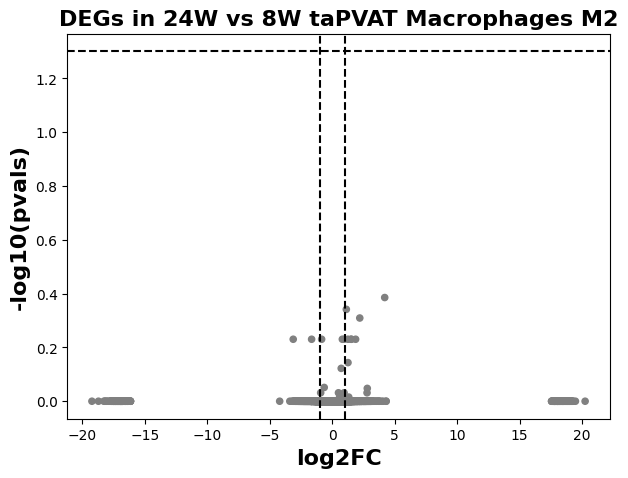

Comparing across time in taPVAT Adipocytes_Brown


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.39 seconds.

Fitting dispersion trend curve...
... done in 5.91 seconds.

Fitting MAP dispersions...
... done in 12.48 seconds.

Fitting LFCs...
... done in 6.36 seconds.

Refitting 55 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



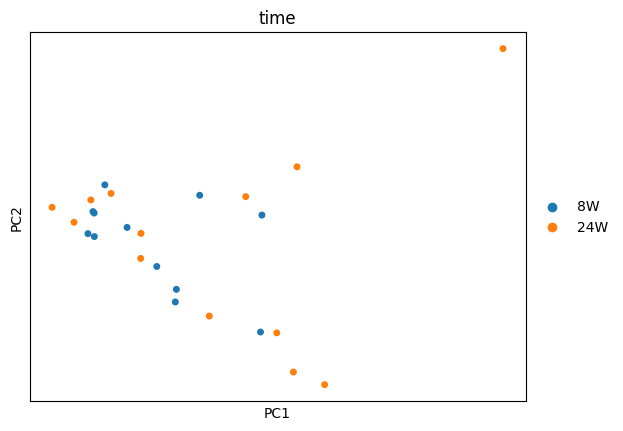

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.99 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.241640       -0.684939  0.349784 -1.958175  0.050209   
4930404H24Rik    0.342480        1.688685  1.402689  1.203891  0.228632   
4930455H04Rik    2.738920       -0.155543  0.480780 -0.323522  0.746300   
6330411D24Rik    3.924006        0.278022  0.702210  0.395925  0.692161   
A1cf             0.878748       -1.697244  0.977705 -1.735947  0.082573   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      2.661203       -0.975402  0.512105 -1.904691  0.056820   
mrpl11         208.942702        0.066103  0.083738  0.789399  0.429879   
mrpl24         279.808522        0.054894  0.102851  0.533725  0.593532   
mrpl9           65.575244       -0.388356  0.113421 -3.424007  0.000617   
rnf141         100.163249        0.175866  0.152377  1.154150  0.248438   

                   padj  
3110082J24Rik  0.183723  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
6330411D24Rik  0.841419  
A1cf                NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.652141  
mrpl24         0.775975  
mrpl9          0.009668  
rnf141         0.477377  

[19328 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_Brown_24W_vs_8W_time_comparison....


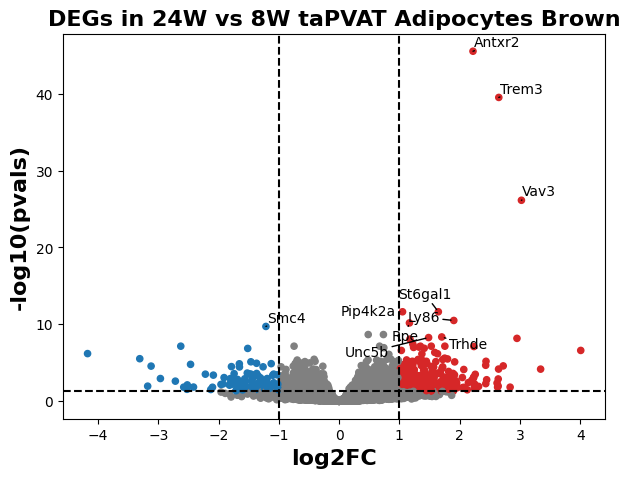

Comparing across time in taPVAT ECs_Venous_Fbn1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.73 seconds.

Fitting dispersion trend curve...
... done in 3.69 seconds.

Fitting MAP dispersions...
... done in 6.62 seconds.

Fitting LFCs...
... done in 4.44 seconds.

Refitting 19 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



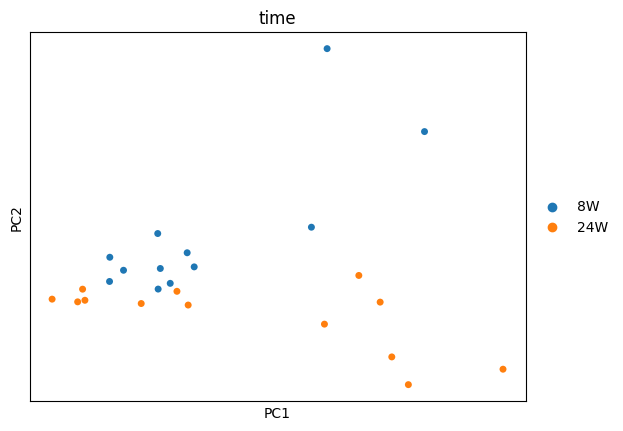

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.38 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.813637        0.155172  0.713107  0.217600  0.827740   
AABR07000398.1  44.594482        0.216526  0.328069  0.660000  0.509254   
AABR07001592.2   0.396992        1.033102  1.038131  0.995156  0.319660   
AABR07001942.1   0.798685        0.345933  0.854096  0.405028  0.685457   
AABR07002969.1   1.852703        0.343166  0.504259  0.680537  0.496165   
...                   ...             ...       ...       ...       ...   
Zzz3             9.478574       -0.026596  0.230285 -0.115490  0.908057   
mrpl11           0.250690       -0.749580  1.377124 -0.544308  0.586229   
mrpl24           1.257648       -0.031959  0.678923 -0.047074  0.962455   
mrpl9            1.210491        0.716190  0.610794  1.172555  0.240974   
rnf141           1.691591        0.559050  0.495035  1.129314  0.258765   

                   padj  
A3galt2             NaN  
AABR07000398.1  0.86135  
AABR07001592.2      NaN  
AABR07001942.1      NaN  
AABR07002969.1      NaN  
...                 ...  
Zzz3                NaN  
mrpl11              NaN  
mrpl24              NaN  
mrpl9               NaN  
rnf141              NaN  

[12187 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Venous_Fbn1+_24W_vs_8W_time_comparison....


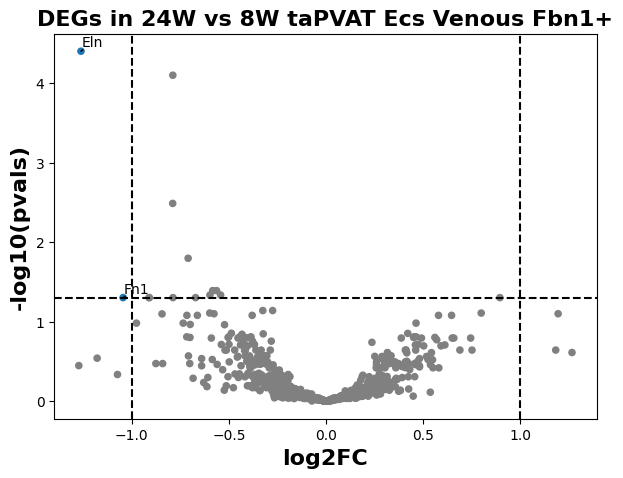

Comparing across time in taPVAT ECs_Lymph


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.42 seconds.

Fitting dispersion trend curve...
... done in 3.65 seconds.

Fitting MAP dispersions...
... done in 6.49 seconds.

Fitting LFCs...
... done in 4.30 seconds.

Refitting 5 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/utils.py:767: RuntimeWarning:

M

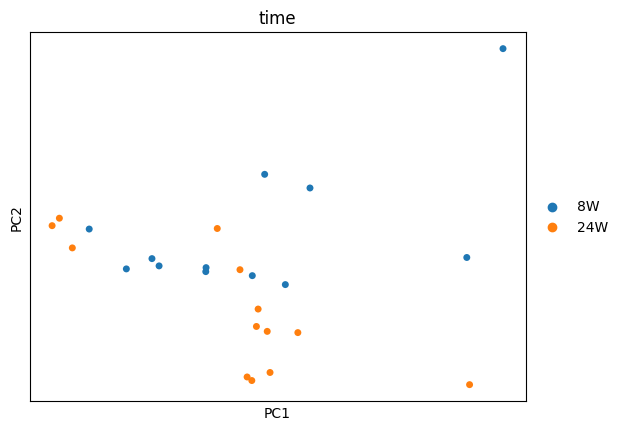

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.01 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.230947       -0.180074  1.320657 -0.136352  0.891543   
AABR07000398.1  31.699712        0.362909  0.429499  0.844957  0.398135   
AABR07000544.1   0.169785        1.429013  1.586211  0.900897  0.367643   
AABR07001592.2   0.771572       -0.600740  0.734499 -0.817892  0.413419   
AABR07001942.1   0.453397       -1.497485  1.027317 -1.457665  0.144933   
...                   ...             ...       ...       ...       ...   
Zzz3             7.110890        0.140476  0.252132  0.557153  0.577423   
mrpl11           0.569108       -0.182571  1.043734 -0.174921  0.861142   
mrpl24           1.019733        0.222876  0.616816  0.361332  0.717851   
mrpl9            0.352539        0.909576  1.131508  0.803861  0.421477   
rnf141           2.701625        0.238539  0.422671  0.564361  0.572508   

                    padj  
A3galt2         0.999691  
AABR07000398.1  0.999691  
AABR07000544.1  0.999691  
AABR07001592.2  0.999691  
AABR07001942.1  0.999691  
...                  ...  
Zzz3            0.999691  
mrpl11          0.999691  
mrpl24          0.999691  
mrpl9           0.999691  
rnf141          0.999691  

[11859 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_ECs_Lymph_24W_vs_8W_time_comparison....


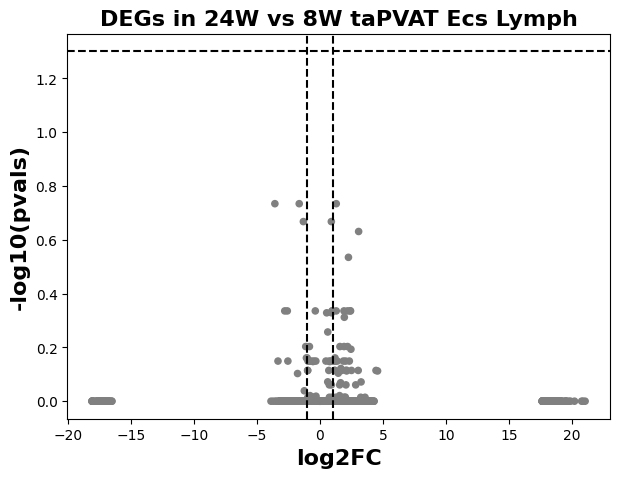

Comparing across time in taPVAT Fibroblasts_Pi16+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.36 seconds.

Fitting dispersion trend curve...
... done in 4.15 seconds.

Fitting MAP dispersions...
... done in 7.35 seconds.

Fitting LFCs...
... done in 4.77 seconds.

Refitting 12 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MA

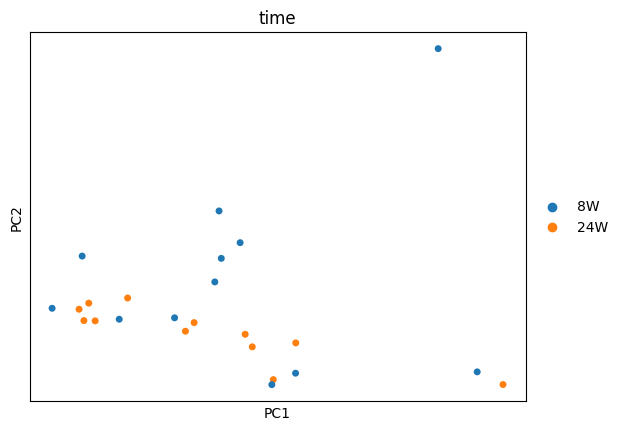

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.59 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4933400A11Rik    0.227098       18.727207  362.616111  0.051645  0.958812   
6330411D24Rik    0.111472       -1.410980    2.038819 -0.692057  0.488901   
A3galt2          1.847449        0.178620    0.636238  0.280744  0.778906   
AABR07000398.1  88.104550       -0.568176    0.234660 -2.421269  0.015466   
AABR07000544.1   0.484080       -1.165279    1.955316 -0.595954  0.551206   
...                   ...             ...         ...       ...       ...   
Zzz3            11.528841       -0.063440    0.226886 -0.279611  0.779776   
mrpl11           0.826134        0.372494    0.789148  0.472021  0.636912   
mrpl24           2.015844       -0.483092    0.533132 -0.906140  0.364862   
mrpl9            1.476131       -0.319983    0.557343 -0.574121  0.565886   
rnf141           2.908191       -0.031240    0.367910 -0.084912  0.932331   

                    padj  
4933400A11Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.253556  
AABR07000544.1       NaN  
...                  ...  
Zzz3            0.958794  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[13398 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16+_24W_vs_8W_time_comparison....


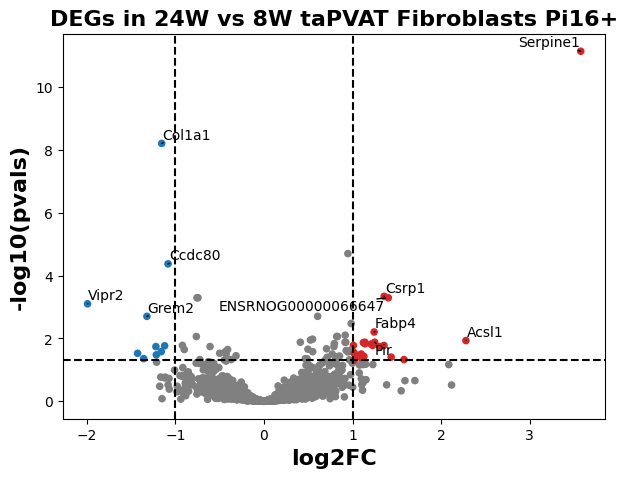

Comparing across time in taPVAT ECs_Artery


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.30 seconds.

Fitting dispersion trend curve...
... done in 4.03 seconds.

Fitting MAP dispersions...
... done in 7.44 seconds.

Fitting LFCs...
... done in 4.99 seconds.

Refitting 4 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

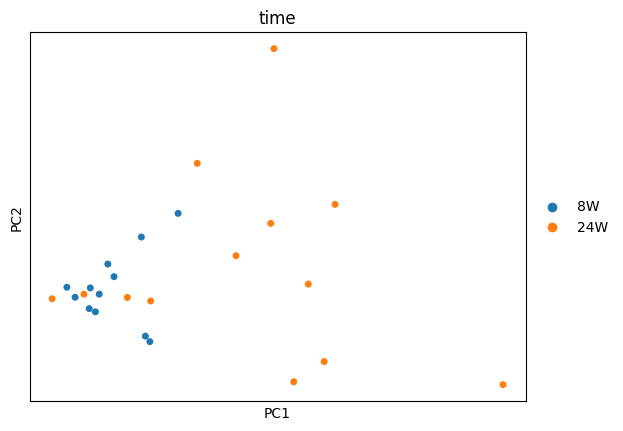

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.49 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4930455H04Rik    0.138071        1.308156    1.960777  0.667162  0.504669   
6330411D24Rik    0.043727       16.204860  381.164002  0.042514  0.966089   
A3galt2          2.520876       -0.734767    0.430554 -1.706559  0.087904   
A4galt           0.144901       -0.682093    1.902709 -0.358485  0.719980   
AABR07000398.1  95.363299       -0.481984    0.227343 -2.120070  0.034000   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.154302       -3.269421    2.183810 -1.497118  0.134363   
mrpl11           0.806279        0.172577    0.824903  0.209209  0.834285   
mrpl24           1.874449       -0.109543    0.472032 -0.232067  0.816486   
mrpl9            1.279639       -0.406766    0.623452 -0.652442  0.514116   
rnf141           2.794297        0.079518    0.437387  0.181802  0.855738   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
A4galt               NaN  
AABR07000398.1  0.391138  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.971104  

[13394 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Artery_24W_vs_8W_time_comparison....


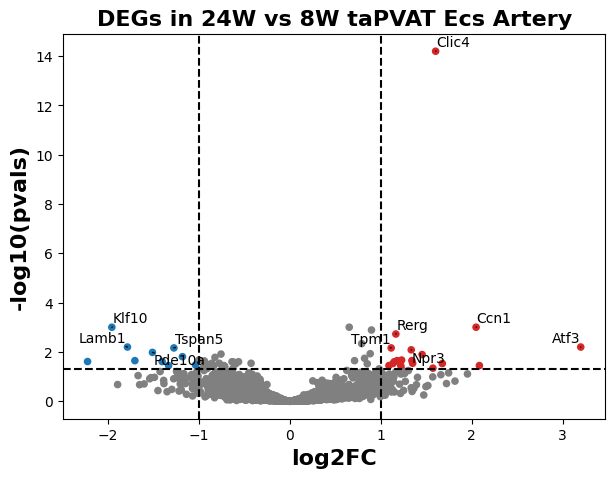

Comparing across time in taPVAT Adipocytes_3


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.88 seconds.

Fitting dispersion trend curve...
... done in 4.55 seconds.

Fitting MAP dispersions...
... done in 8.17 seconds.

Fitting LFCs...
... done in 5.27 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

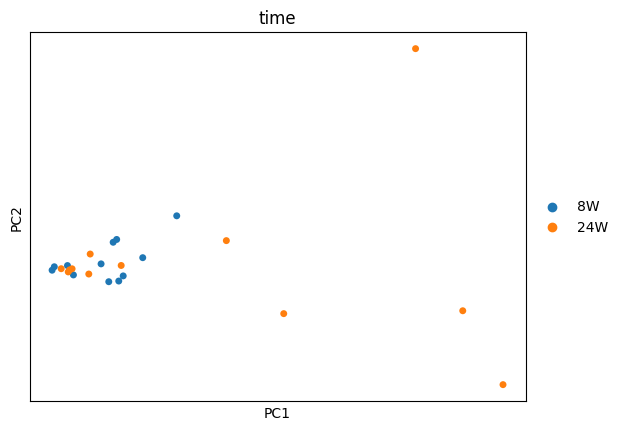

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.58 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4930455H04Rik     0.256205        2.771418    1.743076  1.589958  0.111844   
6330411D24Rik     0.182879       17.639747  353.918169  0.049841  0.960249   
AABR07000398.1  186.602801       -0.209424    0.242133 -0.864912  0.387087   
AABR07000544.1    0.676014        0.821595    0.827315  0.993086  0.320668   
AABR07001512.1    0.071297       16.972460  358.131696  0.047392  0.962201   
...                    ...             ...         ...       ...       ...   
hist1h2ail2       0.239472        0.010099    1.445617  0.006986  0.994426   
mrpl11            6.871847       -0.271966    0.311146 -0.874077  0.382076   
mrpl24            8.011141       -0.381715    0.223637 -1.706848  0.087850   
mrpl9             3.031601        0.294367    0.430231  0.684208  0.493844   
rnf141            6.056361        0.420442    0.295901  1.420887  0.155350   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
AABR07000398.1  0.735455  
AABR07000544.1       NaN  
AABR07001512.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.730152  
mrpl24          0.390294  
mrpl9           0.800754  
rnf141          0.503396  

[14752 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_3_24W_vs_8W_time_comparison....


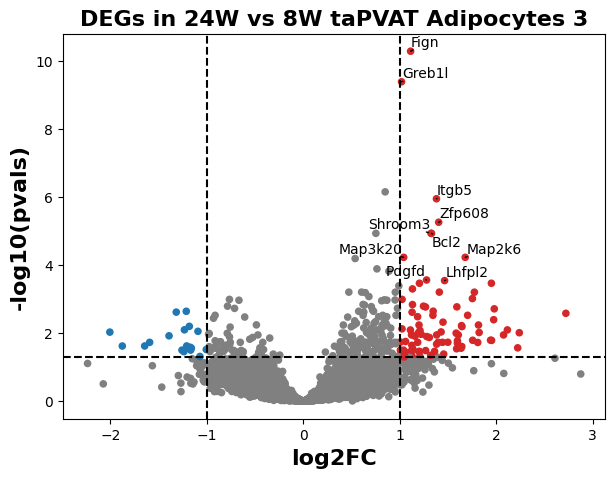

Comparing across time in taPVAT Macrophages_M2_F13a1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.69 seconds.

Fitting dispersion trend curve...
... done in 3.39 seconds.

Fitting MAP dispersions...
... done in 5.65 seconds.

Fitting LFCs...
... done in 3.89 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

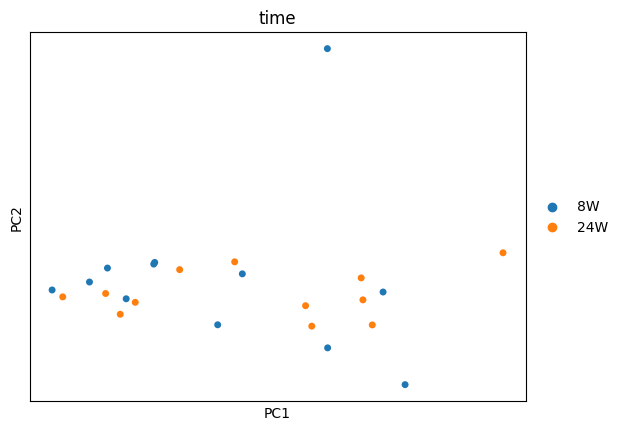

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.22 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
6330411D24Rik    7.131699        0.079922    0.364914  0.219016  0.826638   
A3galt2          0.590497       -1.244492    0.863495 -1.441227  0.149521   
AABR07000398.1  35.780783       -0.141661    0.250916 -0.564574  0.572364   
AABR07002969.1  41.211452        0.037948    0.170037  0.223176  0.823398   
AABR07004891.1   0.390426        2.169776    1.303998  1.663941  0.096124   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.131989      -17.110684  264.909918 -0.064591  0.948500   
mrpl11           0.487701       -0.519551    0.944797 -0.549907  0.582383   
mrpl24           0.699165       -1.924042    0.905799 -2.124138  0.033659   
mrpl9            0.434351       -0.221020    1.117188 -0.197836  0.843173   
rnf141           2.248872       -0.285168    0.420446 -0.678251  0.497613   

                    padj  
6330411D24Rik   0.999365  
A3galt2         0.999365  
AABR07000398.1  0.999365  
AABR07002969.1  0.999365  
AABR07004891.1  0.999365  
...                  ...  
hist1h2ail2     0.999365  
mrpl11          0.999365  
mrpl24          0.999365  
mrpl9           0.999365  
rnf141          0.999365  

[10830 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Macrophages_M2_F13a1+_24W_vs_8W_time_comparison....


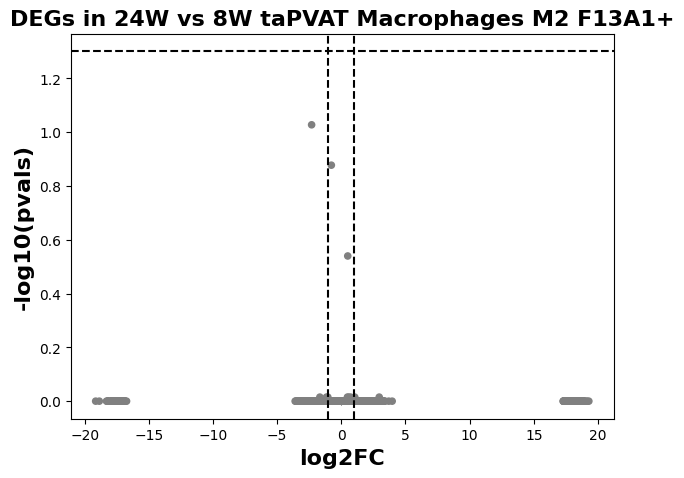

Comparing across time in taPVAT ECs_Cap


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.92 seconds.

Fitting dispersion trend curve...
... done in 4.60 seconds.

Fitting MAP dispersions...
... done in 8.49 seconds.

Fitting LFCs...
... done in 5.38 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

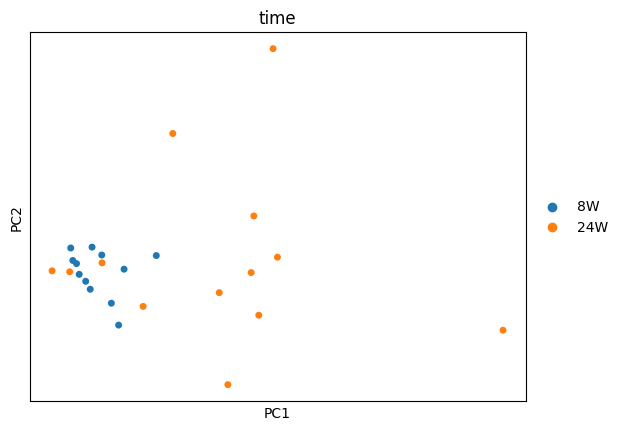

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.61 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.409209        0.254106  1.078482  0.235615  0.813732   
6330411D24Rik     0.164530       -1.555683  2.100937 -0.740471  0.459014   
A3galt2           2.551477       -0.891054  0.435466 -2.046207  0.040736   
AABR07000398.1  265.737154       -0.449281  0.297909 -1.508116  0.131525   
AABR07000544.1    0.181598        1.325978  1.751762  0.756940  0.449086   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.643871       -0.582293  0.984921 -0.591208  0.554381   
mrpl11            2.244345       -0.788831  0.521703 -1.512032  0.130526   
mrpl24            4.339981       -0.371610  0.322578 -1.152002  0.249320   
mrpl9             3.259174       -0.181319  0.390745 -0.464035  0.642623   
rnf141            5.700391        0.280379  0.310827  0.902043  0.367034   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2         0.370983  
AABR07000398.1  0.575423  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.574611  
mrpl24          0.708252  
mrpl9           0.917196  
rnf141          0.793597  

[14932 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Cap_24W_vs_8W_time_comparison....


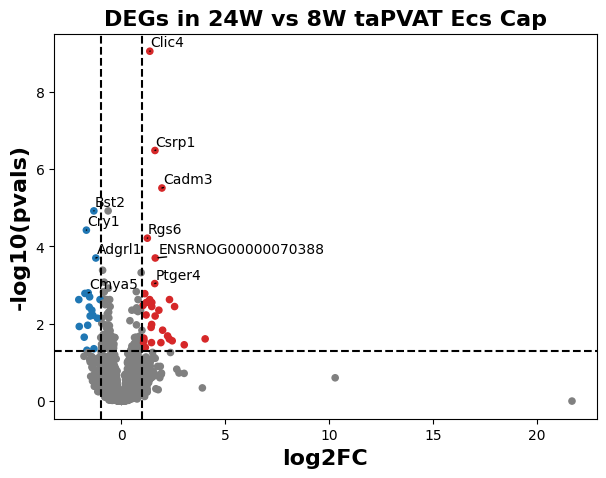

Comparing across time in taPVAT Fibroblasts_Bmper+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.94 seconds.

Fitting dispersion trend curve...
... done in 3.93 seconds.

Fitting MAP dispersions...
... done in 6.82 seconds.

Fitting LFCs...
... done in 4.33 seconds.

Refitting 1 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

... done in 0.45 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 s

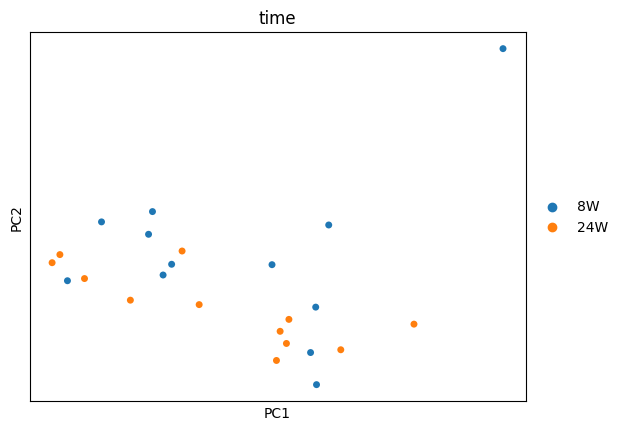

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.38 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik    0.083221       -0.512406  2.253294 -0.227403  0.820110   
A3galt2          0.747801       -0.048946  0.768529 -0.063688  0.949219   
AABR07000398.1  80.616195       -0.365648  0.194015 -1.884641  0.059478   
AABR07000544.1   0.144294       -0.615597  1.653974 -0.372193  0.709749   
AABR07001942.1   0.596555        0.727804  0.986831  0.737516  0.460808   
...                   ...             ...       ...       ...       ...   
Zzz3            11.245333       -0.017013  0.216305 -0.078654  0.937307   
mrpl11           0.419523       -0.196719  1.035156 -0.190038  0.849279   
mrpl24           1.111081       -0.538954  0.611730 -0.881033  0.378300   
mrpl9            0.944631        0.178421  0.706491  0.252545  0.800620   
rnf141           2.497083       -0.052912  0.403223 -0.131222  0.895599   

                    padj  
4933400A11Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.537252  
AABR07000544.1       NaN  
AABR07001942.1       NaN  
...                  ...  
Zzz3            0.992737  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.989477  

[12520 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Bmper+_24W_vs_8W_time_comparison....


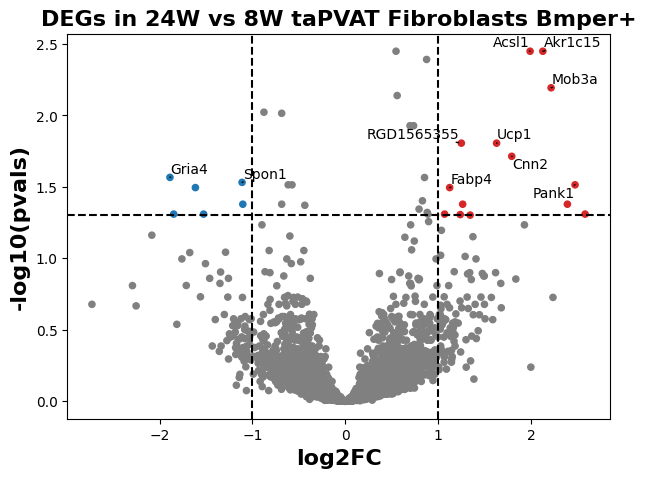

Comparing across time in taPVAT ECs_Lymph_Piezo2+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    2
Name: count, dtype: int64
Comparing across time in taPVAT Neutrophils
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       1
P_CTRL_24W_M_03    1
P_CTRL_8W_F_03     1
P_HF_24W_F_02      1
P_HF_24W_F_04      1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across time in taPVAT T_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.80 seconds.

Fitting dispersion trend curve...
... done in 3.27 seconds.

Fitting MAP dispersions...
... done in 5.90 seconds.

Fitting LFCs...
... done in 4.17 seconds.

Refitting 39 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting dispersions...
... done in 0.07 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MA

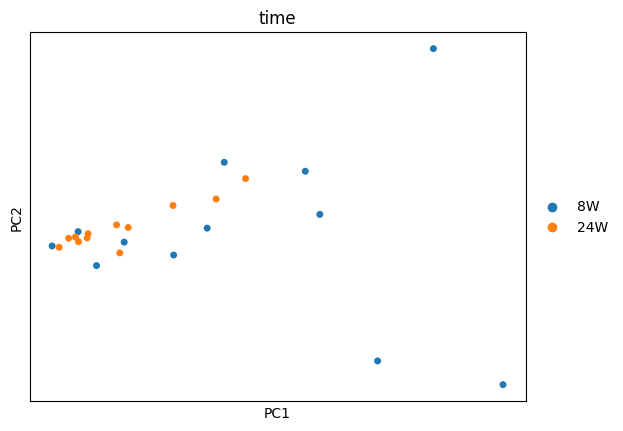

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.46 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
A2ml1            0.093610      -15.907733  270.441744 -0.058821  0.953094   
AABR07000398.1  37.651115       -0.676493    0.271804 -2.488902  0.012814   
AABR07002969.1   0.781082       -0.425557    0.777652 -0.547233  0.584219   
AABR07005588.1   0.289951        0.002001    1.096757  0.001825  0.998544   
AABR07007032.1  13.131359        0.268100    0.238926  1.122106  0.261817   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.120055      -16.517427  268.610034 -0.061492  0.950967   
mrpl11           0.136256        0.107246    1.964929  0.054580  0.956473   
mrpl24           0.759484        0.414946    0.710424  0.584083  0.559165   
mrpl9            0.617085        0.370239    0.989577  0.374139  0.708301   
rnf141           0.132433       -0.761973    2.106800 -0.361673  0.717596   

                    padj  
A2ml1           0.999916  
AABR07000398.1  0.999916  
AABR07002969.1  0.999916  
AABR07005588.1  0.999916  
AABR07007032.1  0.999916  
...                  ...  
hist1h2ail2     0.999916  
mrpl11          0.999916  
mrpl24          0.999916  
mrpl9           0.999916  
rnf141          0.999916  

[10371 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_T_Cells_24W_vs_8W_time_comparison....


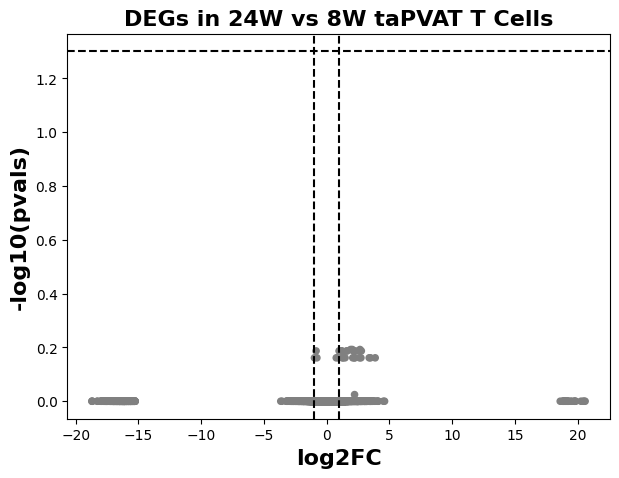

Comparing across time in taPVAT Doublets
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       2
P_CTRL_24W_M_03    2
P_CTRL_8W_M_02     2
P_CTRL_8W_M_01     2
P_HF_24W_F_01      1
P_CTRL_24W_F_03    1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across time in taPVAT Fibroblasts_Pi16++


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.77 seconds.

Fitting dispersion trend curve...
... done in 4.06 seconds.

Fitting MAP dispersions...
... done in 6.55 seconds.

Fitting LFCs...
... done in 4.34 seconds.

Refitting 5 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/t

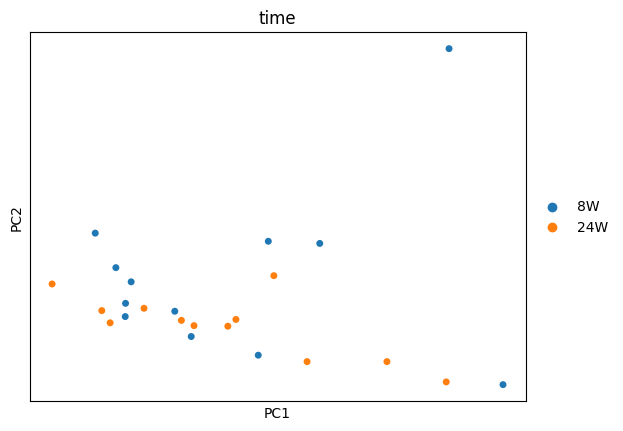

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.31 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4933400A11Rik    0.076763       -1.035787    2.373057 -0.436478  0.662490   
A3galt2          0.906427       -0.181720    0.733744 -0.247661  0.804397   
AABR07000398.1  75.749387       -0.456859    0.276872 -1.650074  0.098928   
AABR07001942.1   0.646792        0.646752    0.919002  0.703755  0.481585   
AABR07002467.1   0.152648      -17.103257  265.558726 -0.064405  0.948648   
...                   ...             ...         ...       ...       ...   
Zzz3             7.546010       -0.000798    0.241773 -0.003301  0.997366   
mrpl11           0.625120       -0.892565    0.840638 -1.061771  0.288340   
mrpl24           1.041941        0.130988    0.648944  0.201848  0.840035   
mrpl9            1.069111       -0.264620    0.632823 -0.418159  0.675831   
rnf141           0.890237        0.018219    0.686475  0.026540  0.978827   

                    padj  
4933400A11Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.483284  
AABR07001942.1       NaN  
AABR07002467.1       NaN  
...                  ...  
Zzz3                 NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[12108 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16++_24W_vs_8W_time_comparison....


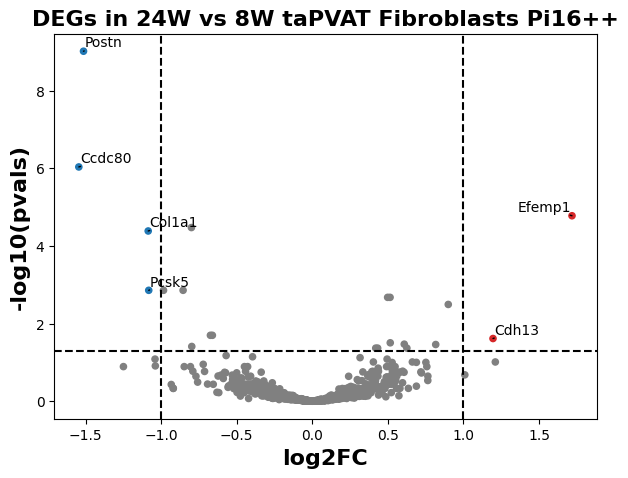

Comparing across time in taPVAT ECs_Venous


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.30 seconds.

Fitting dispersion trend curve...
... done in 3.46 seconds.

Fitting MAP dispersions...
... done in 6.20 seconds.

Fitting LFCs...
... done in 4.64 seconds.

Refitting 4 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

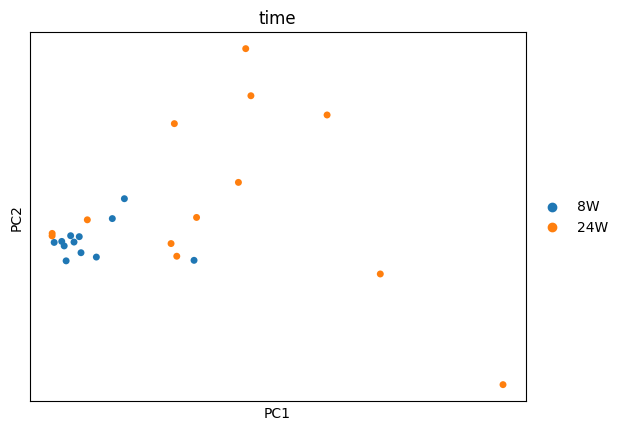

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.26 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
A3galt2          0.596717       -0.934880    0.802746 -1.164603  0.244180   
AABR07000398.1  25.927528       -0.691558    0.335747 -2.059763  0.039421   
AABR07001592.2   0.104361        1.043885    1.937756  0.538708  0.590088   
AABR07001942.1   0.424355        2.282644    1.583017  1.441958  0.149314   
AABR07002969.1   0.798046        1.355619    0.859663  1.576918  0.114814   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.399686       -4.228357    1.819134 -2.324380  0.020105   
mrpl11           0.337220        0.228577    1.160535  0.196958  0.843860   
mrpl24           0.598267       -0.487749    0.814846 -0.598578  0.549455   
mrpl9            0.246717       18.241881  363.663950  0.050161  0.959994   
rnf141           0.493010        1.181861    0.985349  1.199434  0.230359   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.441944  
AABR07001592.2       NaN  
AABR07001942.1       NaN  
AABR07002969.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[11347 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Venous_24W_vs_8W_time_comparison....


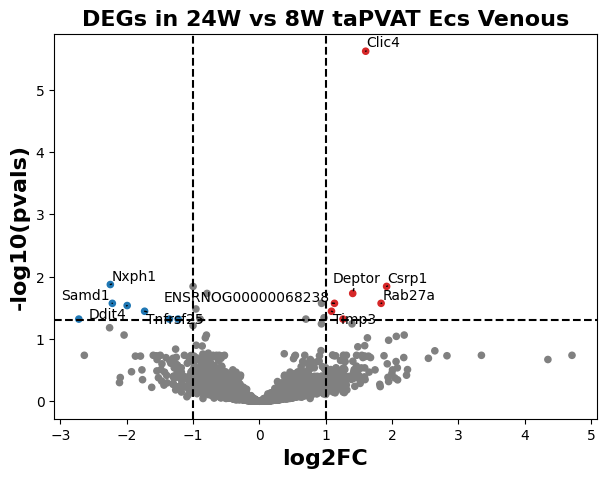

Comparing across time in taPVAT Macrophages_M1_Cd80+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_01    2
Name: count, dtype: int64
Comparing across time in taPVAT Dendritic_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_M_02       2
P_CTRL_24W_M_01    2
P_CTRL_24W_F_02    2
P_CTRL_8W_M_03     2
P_CTRL_8W_M_02     1
P_CTRL_8W_M_01     1
P_HF_8W_F_01       1
Name: count, dtype: int64
Comparing across time in taPVAT B_Cells_Naive
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_02    2
P_CTRL_24W_F_03    1
P_CTRL_24W_F_01    1
Name: count, dtype: int64
Comparing across time in taPVAT NK_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_02     2
P_CTRL_8W_F_01    1
Name: count, dtype: int64
Comparing across time in taPVAT T_Regs
There are less than 3 cells of this cell type in the following samples

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.74 seconds.

Fitting dispersion trend curve...
... done in 3.34 seconds.

Fitting MAP dispersions...
... done in 5.91 seconds.

Fitting LFCs...
... done in 4.25 seconds.

Refitting 3 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

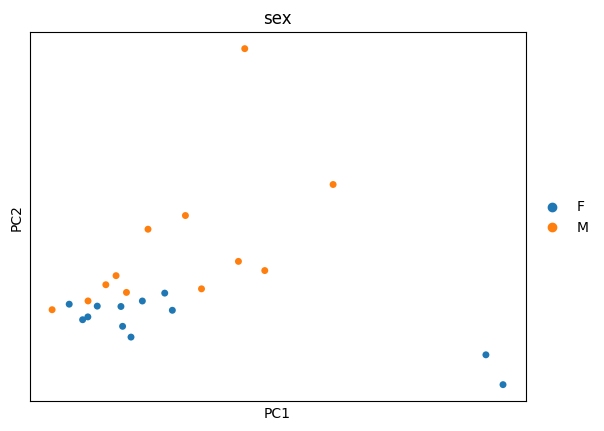

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.26 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6330411D24Rik    1.352040        0.407992  0.706048  0.577853  0.563363   
A3galt2          1.257140        0.088439  0.610615  0.144836  0.884840   
AABR07000398.1  35.773819       -0.345345  0.258872 -1.334038  0.182192   
AABR07002969.1  23.864825       -0.003589  0.197265 -0.018196  0.985482   
AABR07004891.1   0.489734       -0.705631  0.920960 -0.766190  0.443563   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.322004       -0.706980  1.814262 -0.389679  0.696774   
mrpl11           0.319461        1.640796  1.416099  1.158674  0.246589   
mrpl24           0.620651        1.398264  0.841148  1.662329  0.096447   
mrpl9            0.207148       -0.133421  1.371343 -0.097292  0.922494   
rnf141           2.190172       -0.365198  0.457544 -0.798169  0.424772   

                    padj  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.898378  
AABR07002969.1  0.998414  
AABR07004891.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.952651  

[11102 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Macrophages_M2_F_vs_M_sex_comparison....


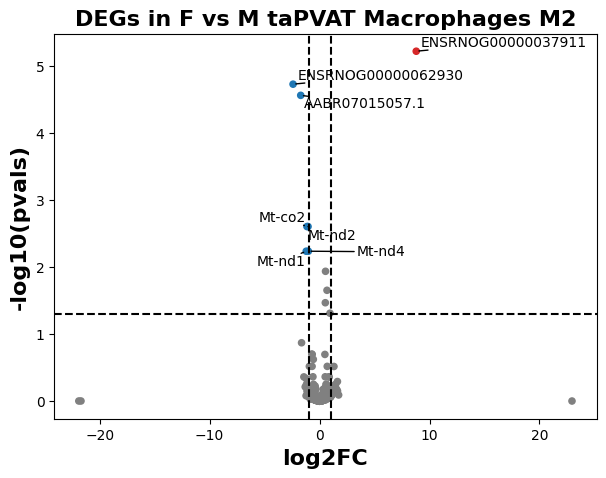

Comparing across sex in taPVAT Adipocytes_Brown


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.45 seconds.

Fitting dispersion trend curve...
... done in 5.89 seconds.

Fitting MAP dispersions...
... done in 12.44 seconds.

Fitting LFCs...
... done in 6.43 seconds.

Refitting 61 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



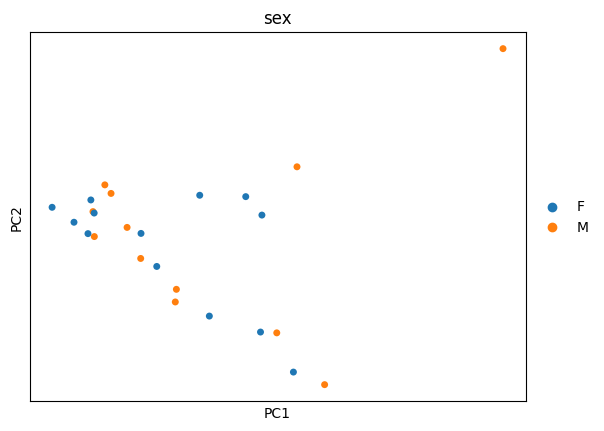

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.11 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.241640        0.700850  0.345629  2.027755  0.042585   
4930404H24Rik    0.342480        1.970409  1.353568  1.455715  0.145471   
4930455H04Rik    2.738920       -0.553632  0.474228 -1.167438  0.243034   
6330411D24Rik    3.924006        0.229837  0.699446  0.328599  0.742459   
A1cf             0.878748        0.408755  0.998973  0.409175  0.682411   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      2.661203        0.937015  0.519724  1.802910  0.071402   
mrpl11         208.942702       -0.010292  0.082322 -0.125024  0.900505   
mrpl24         279.808522       -0.005752  0.104108 -0.055255  0.955935   
mrpl9           65.575244        0.021132  0.139492  0.151493  0.879587   
rnf141         100.163249        0.189912  0.149959  1.266431  0.205359   

                   padj  
3110082J24Rik  0.299228  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
6330411D24Rik  0.920889  
A1cf                NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.978116  
mrpl24         0.990959  
mrpl9          0.971677  
rnf141         0.590974  

[19328 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_Brown_F_vs_M_sex_comparison....


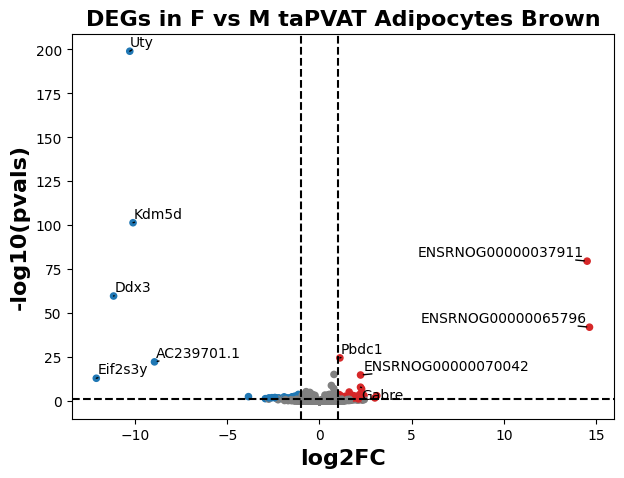

Comparing across sex in taPVAT ECs_Venous_Fbn1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.61 seconds.

Fitting dispersion trend curve...
... done in 3.69 seconds.

Fitting MAP dispersions...
... done in 6.87 seconds.

Fitting LFCs...
... done in 4.43 seconds.

Refitting 12 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MA

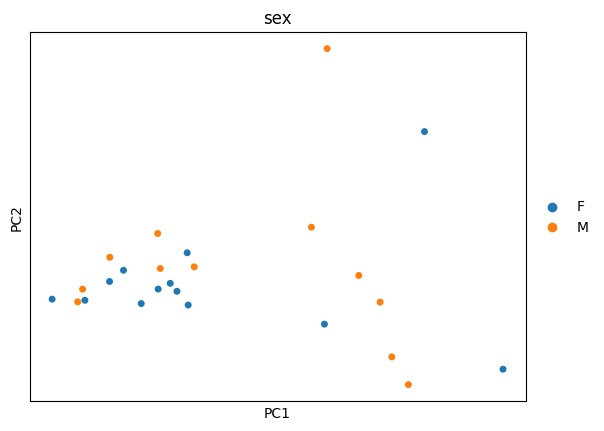

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.32 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.813637        1.203930  0.700414  1.718882  0.085636   
AABR07000398.1  44.594482       -0.865169  0.296701 -2.915959  0.003546   
AABR07001592.2   0.396992       -1.309799  1.038357 -1.261414  0.207160   
AABR07001942.1   0.798685       -0.829652  0.894935 -0.927054  0.353899   
AABR07002969.1   1.852703       -0.135800  0.514527 -0.263931  0.791833   
...                   ...             ...       ...       ...       ...   
Zzz3             9.478574        0.158667  0.228706  0.693760  0.487833   
mrpl11           0.250690        0.090735  1.389931  0.065280  0.947951   
mrpl24           1.257648        1.356360  0.662906  2.046080  0.040748   
mrpl9            1.210491        0.280484  0.608878  0.460657  0.645044   
rnf141           1.691591        0.346103  0.491817  0.703724  0.481605   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.376379  
AABR07001592.2       NaN  
AABR07001942.1       NaN  
AABR07002969.1       NaN  
...                  ...  
Zzz3            0.996190  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[12187 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Venous_Fbn1+_F_vs_M_sex_comparison....


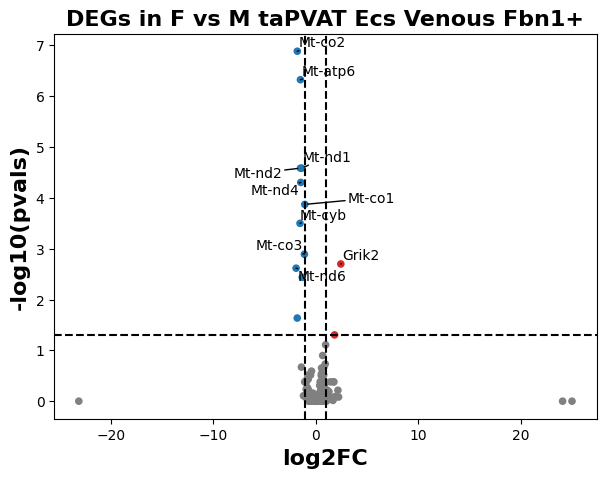

Comparing across sex in taPVAT ECs_Lymph


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.42 seconds.

Fitting dispersion trend curve...
... done in 3.64 seconds.

Fitting MAP dispersions...
... done in 6.47 seconds.

Fitting LFCs...
... done in 4.25 seconds.

Refitting 7 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

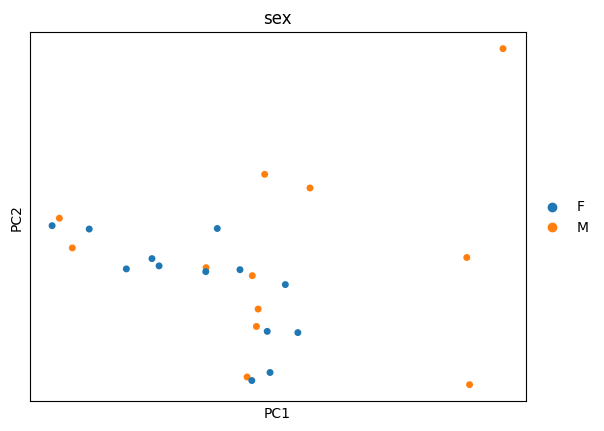

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.48 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.230947       -0.415323  1.342573 -0.309349  0.757056   
AABR07000398.1  31.699712       -0.990836  0.354302 -2.796581  0.005165   
AABR07000544.1   0.169785       -2.225311  1.820803 -1.222159  0.221647   
AABR07001592.2   0.771572        0.585782  0.730246  0.802170  0.422455   
AABR07001942.1   0.453397        0.060745  0.997976  0.060868  0.951464   
...                   ...             ...       ...       ...       ...   
Zzz3             7.110890       -0.392839  0.251889 -1.559574  0.118861   
mrpl11           0.569108       -0.961517  1.083435 -0.887471  0.374826   
mrpl24           1.019733       -0.171214  0.618790 -0.276692  0.782017   
mrpl9            0.352539        1.225748  1.125132  1.089426  0.275966   
rnf141           2.701625        0.438953  0.425385  1.031894  0.302122   

                   padj  
A3galt2             NaN  
AABR07000398.1  0.28623  
AABR07000544.1      NaN  
AABR07001592.2      NaN  
AABR07001942.1      NaN  
...                 ...  
Zzz3                NaN  
mrpl11              NaN  
mrpl24              NaN  
mrpl9               NaN  
rnf141              NaN  

[11859 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Lymph_F_vs_M_sex_comparison....


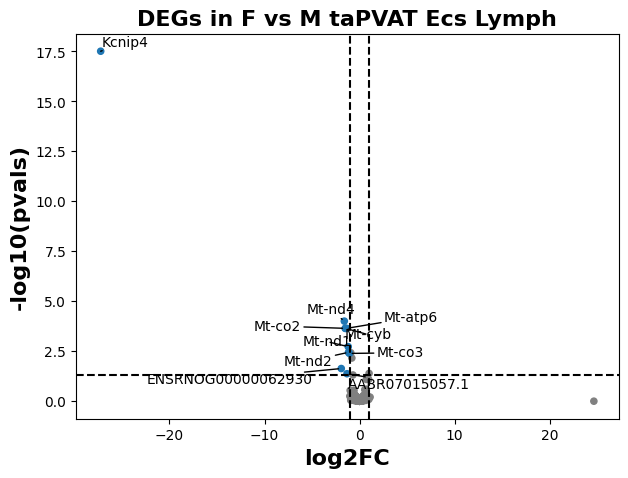

Comparing across sex in taPVAT Fibroblasts_Pi16+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.36 seconds.

Fitting dispersion trend curve...
... done in 4.07 seconds.

Fitting MAP dispersions...
... done in 7.38 seconds.

Fitting LFCs...
... done in 4.68 seconds.

Refitting 11 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



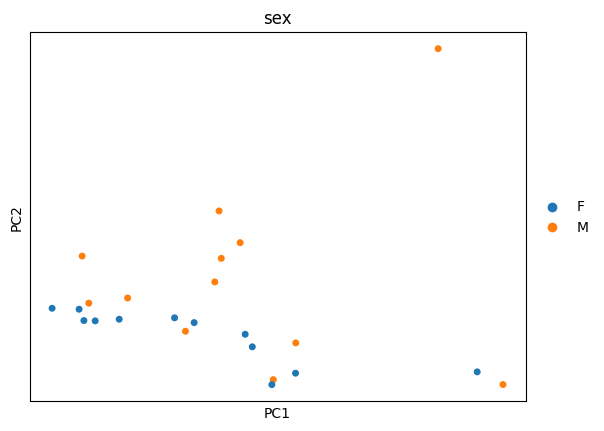

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.50 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik    0.227098       -1.509588  1.851884 -0.815163  0.414979   
6330411D24Rik    0.111472       -1.613858  2.109515 -0.765038  0.444249   
A3galt2          1.847449       -0.695485  0.652986 -1.065084  0.286838   
AABR07000398.1  88.104550       -0.594395  0.234443 -2.535350  0.011233   
AABR07000544.1   0.484080        2.444983  1.574882  1.552486  0.120546   
...                   ...             ...       ...       ...       ...   
Zzz3            11.528841       -0.468785  0.214324 -2.187275  0.028722   
mrpl11           0.826134        0.737312  0.787546  0.936214  0.349163   
mrpl24           2.015844        0.220600  0.528817  0.417158  0.676563   
mrpl9            1.476131       -0.490857  0.569927 -0.861263  0.389093   
rnf141           2.908191       -0.242576  0.376228 -0.644759  0.519084   

                    padj  
4933400A11Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.363774  
AABR07000544.1       NaN  
...                  ...  
Zzz3            0.518367  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[13398 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16+_F_vs_M_sex_comparison....


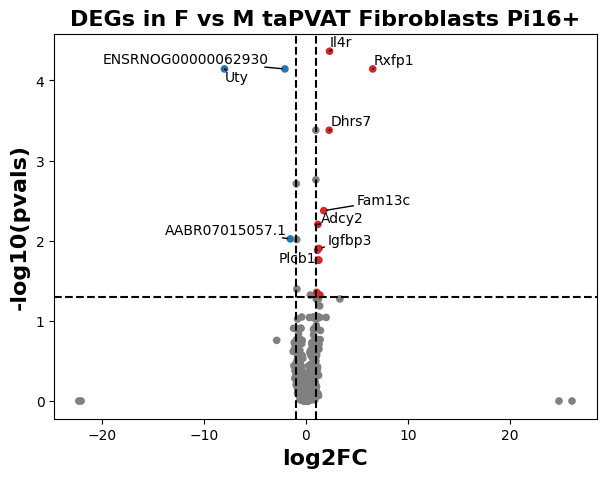

Comparing across sex in taPVAT ECs_Artery


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.20 seconds.

Fitting dispersion trend curve...
... done in 4.06 seconds.

Fitting MAP dispersions...
... done in 7.44 seconds.

Fitting LFCs...
... done in 4.89 seconds.

Refitting 1 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

... done in 0.47 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 s

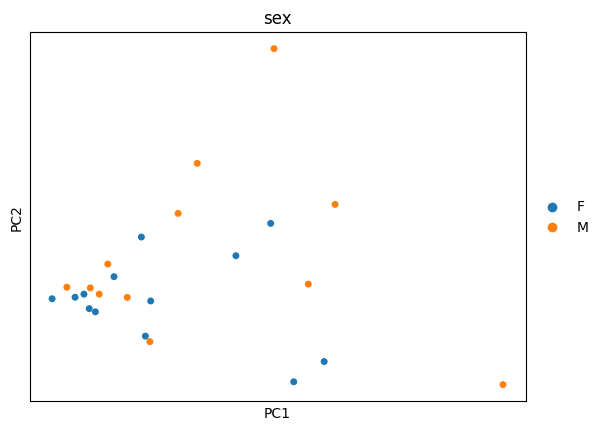

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.57 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik    0.138071       -0.919260  1.667139 -0.551400  0.581360   
6330411D24Rik    0.043727        1.159663  2.925938  0.396339  0.691855   
A3galt2          2.520876        0.728125  0.427729  1.702303  0.088699   
A4galt           0.144901        0.035025  1.925726  0.018188  0.985489   
AABR07000398.1  95.363299       -0.399802  0.233999 -1.708561  0.087532   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.154302       -1.505772  2.251340 -0.668834  0.503602   
mrpl11           0.806279        1.093482  0.764124  1.431028  0.152422   
mrpl24           1.874449        0.108156  0.450079  0.240304  0.810094   
mrpl9            1.279639       -0.822403  0.620137 -1.326164  0.184785   
rnf141           2.794297        0.095763  0.427400  0.224060  0.822710   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
A4galt               NaN  
AABR07000398.1  0.696795  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[13394 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Artery_F_vs_M_sex_comparison....


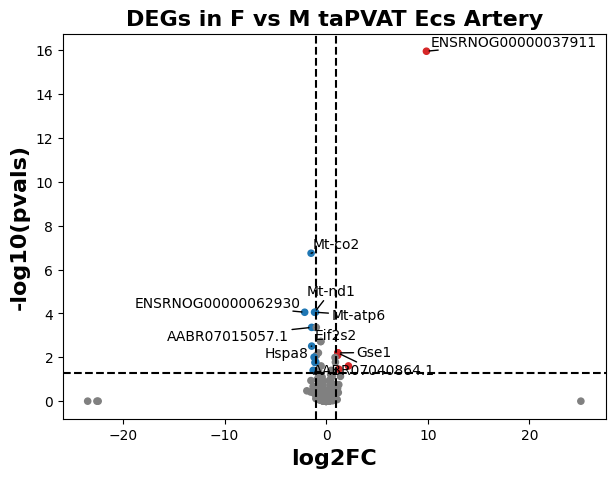

Comparing across sex in taPVAT Adipocytes_3


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.97 seconds.

Fitting dispersion trend curve...
... done in 4.52 seconds.

Fitting MAP dispersions...
... done in 8.18 seconds.

Fitting LFCs...
... done in 5.59 seconds.

Refitting 4 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



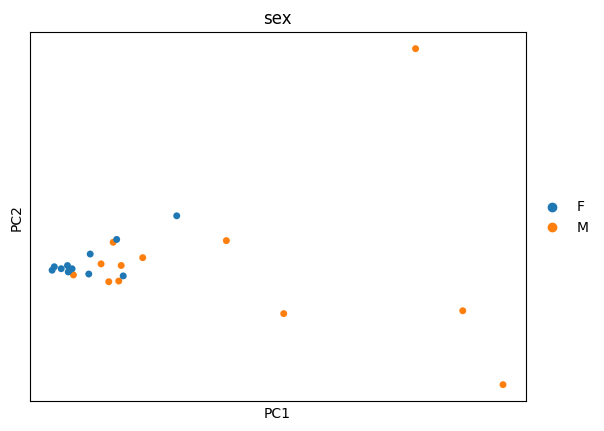

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.66 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.256205       -0.602588  1.438727 -0.418834  0.675337   
6330411D24Rik     0.182879        2.386199  1.772411  1.346301  0.178206   
AABR07000398.1  186.602801       -0.276035  0.242487 -1.138349  0.254975   
AABR07000544.1    0.676014        0.765214  0.780114  0.980900  0.326642   
AABR07001512.1    0.071297        0.765170  2.090849  0.365961  0.714394   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.239472        2.529220  1.358751  1.861430  0.062683   
mrpl11            6.871847        0.424020  0.307654  1.378235  0.168131   
mrpl24            8.011141        0.052126  0.250041  0.208470  0.834862   
mrpl9             3.031601        0.094723  0.436549  0.216980  0.828224   
rnf141            6.056361        0.323486  0.286805  1.127896  0.259364   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
AABR07000398.1  0.730192  
AABR07000544.1       NaN  
AABR07001512.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.654933  
mrpl24          0.975744  
mrpl9           0.973892  
rnf141          0.733847  

[14752 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_3_F_vs_M_sex_comparison....


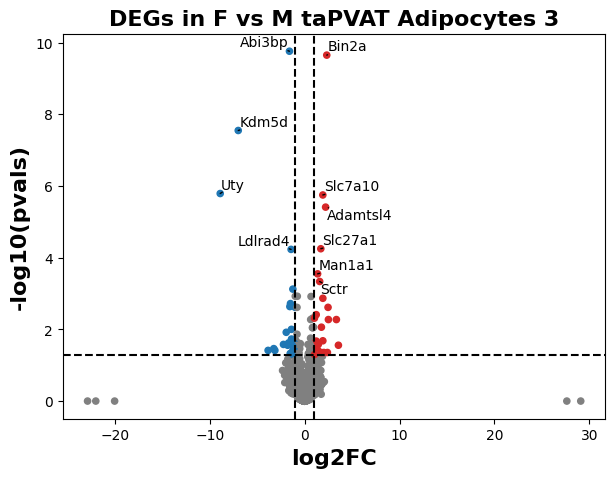

Comparing across sex in taPVAT Macrophages_M2_F13a1+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.66 seconds.

Fitting dispersion trend curve...
... done in 3.25 seconds.

Fitting MAP dispersions...
... done in 5.64 seconds.

Fitting LFCs...
... done in 3.87 seconds.

Refitting 1 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

... done in 0.47 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 s

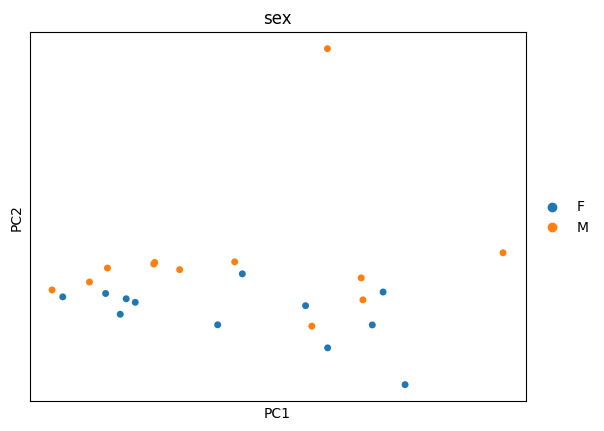

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.23 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6330411D24Rik    7.131699        0.447672  0.353933  1.264850  0.205925   
A3galt2          0.590497        1.022824  0.861061  1.187865  0.234887   
AABR07000398.1  35.780783       -0.414864  0.242067 -1.713841  0.086558   
AABR07002969.1  41.211452       -0.088330  0.169198 -0.522053  0.601634   
AABR07004891.1   0.390426       -1.596006  1.191041 -1.340009  0.180243   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.131989       -1.391888  2.219883 -0.627010  0.530653   
mrpl11           0.487701        0.783384  0.956225  0.819246  0.412646   
mrpl24           0.699165        0.212998  0.882726  0.241296  0.809326   
mrpl9            0.434351       -0.352500  1.120595 -0.314565  0.753092   
rnf141           2.248872        0.224856  0.422229  0.532544  0.594349   

                    padj  
6330411D24Rik   0.998369  
A3galt2         0.998369  
AABR07000398.1  0.998369  
AABR07002969.1  0.998369  
AABR07004891.1  0.998369  
...                  ...  
hist1h2ail2     0.998369  
mrpl11          0.998369  
mrpl24          0.998369  
mrpl9           0.998369  
rnf141          0.998369  

[10830 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Macrophages_M2_F13a1+_F_vs_M_sex_comparison....


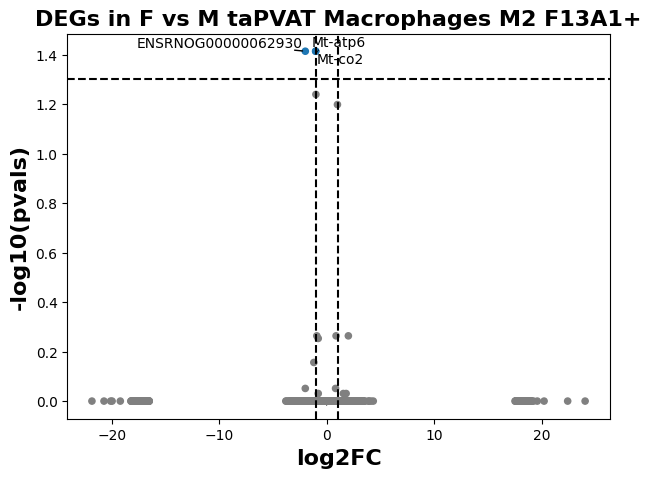

Comparing across sex in taPVAT ECs_Cap


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.48 seconds.

Fitting dispersion trend curve...
... done in 4.48 seconds.

Fitting MAP dispersions...
... done in 8.40 seconds.

Fitting LFCs...
... done in 5.27 seconds.

Refitting 5 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

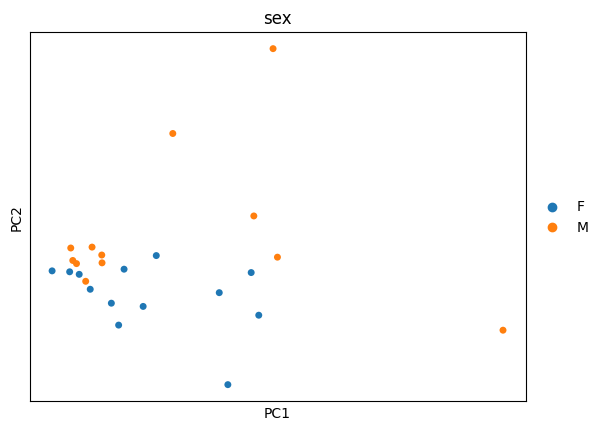

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.70 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.409209       -0.435847  0.967818 -0.450340  0.652465   
6330411D24Rik     0.164530        3.242746  2.593264  1.250450  0.211135   
A3galt2           2.551477        0.810672  0.438701  1.847893  0.064618   
AABR07000398.1  265.737154       -0.783963  0.245678 -3.191013  0.001418   
AABR07000544.1    0.181598       -1.209328  1.431882 -0.844572  0.398350   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.643871       -0.145786  0.986095 -0.147842  0.882468   
mrpl11            2.244345       -0.331575  0.536618 -0.617897  0.536643   
mrpl24            4.339981        0.544778  0.312572  1.742887  0.081353   
mrpl9             3.259174        0.474558  0.368015  1.289505  0.197223   
rnf141            5.700391       -0.185425  0.303791 -0.610371  0.541616   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.034898  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[14932 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Cap_F_vs_M_sex_comparison....


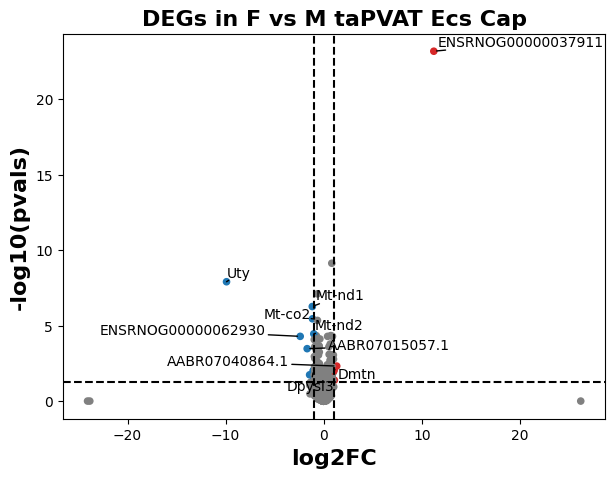

Comparing across sex in taPVAT Fibroblasts_Bmper+


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.87 seconds.

Fitting dispersion trend curve...
... done in 3.84 seconds.

Fitting MAP dispersions...
... done in 6.70 seconds.

Fitting LFCs...
... done in 4.32 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



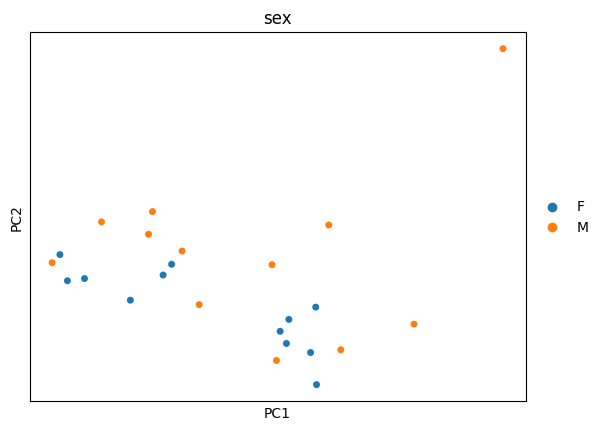

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.53 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik    0.083221       -0.740476  2.302091 -0.321654  0.747715   
A3galt2          0.747801       -0.681384  0.779530 -0.874097  0.382066   
AABR07000398.1  80.616195       -0.082203  0.206266 -0.398528  0.690241   
AABR07000544.1   0.144294        2.300816  1.899579  1.211224  0.225810   
AABR07001942.1   0.596555       -0.193626  0.998064 -0.194001  0.846175   
...                   ...             ...       ...       ...       ...   
Zzz3            11.245333        0.231559  0.219296  1.055923  0.291003   
mrpl11           0.419523       -0.105590  1.039688 -0.101559  0.919107   
mrpl24           1.111081       -0.600681  0.612654 -0.980457  0.326861   
mrpl9            0.944631        0.923774  0.710577  1.300034  0.193589   
rnf141           2.497083        0.726455  0.398215  1.824279  0.068110   

                    padj  
4933400A11Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.977704  
AABR07000544.1       NaN  
AABR07001942.1       NaN  
...                  ...  
Zzz3            0.902926  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.698624  

[12520 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Bmper+_F_vs_M_sex_comparison....


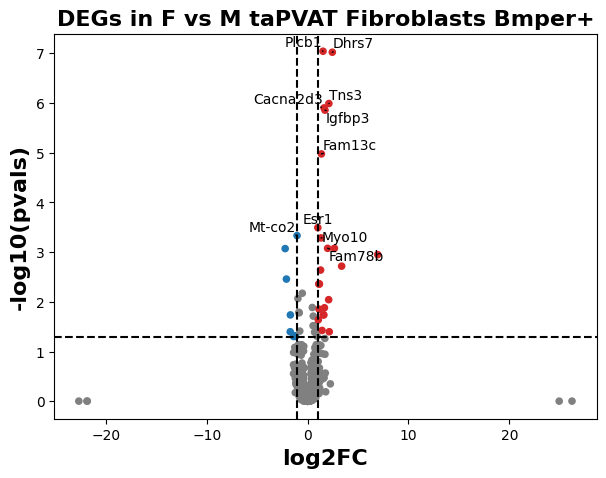

Comparing across sex in taPVAT ECs_Lymph_Piezo2+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    2
Name: count, dtype: int64
Comparing across sex in taPVAT Neutrophils
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       1
P_CTRL_24W_M_03    1
P_CTRL_8W_F_03     1
P_HF_24W_F_02      1
P_HF_24W_F_04      1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across sex in taPVAT T_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.45 seconds.

Fitting dispersion trend curve...
... done in 3.18 seconds.

Fitting MAP dispersions...
... done in 5.48 seconds.

Fitting LFCs...
... done in 3.90 seconds.

Refitting 45 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



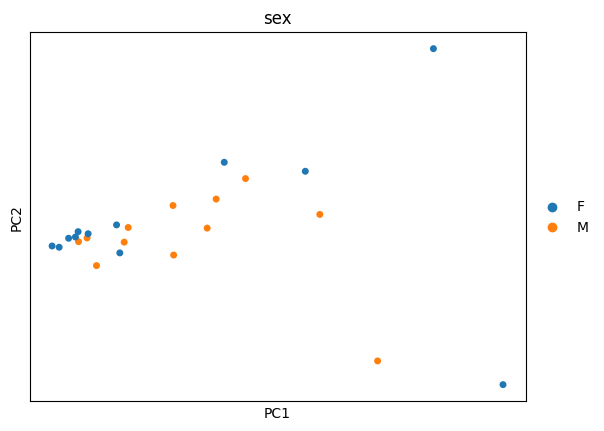

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.22 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
A2ml1            0.093610       -1.475829    2.537871 -0.581523  0.560888   
AABR07000398.1  37.651115        0.136218    0.291951  0.466577  0.640803   
AABR07002969.1   0.781082        0.543544    0.729970  0.744611  0.456507   
AABR07005588.1   0.289951       -0.507240    1.087281 -0.466521  0.640842   
AABR07007032.1  13.131359        0.385860    0.245838  1.569566  0.116516   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      0.120055      -17.238674  259.211444 -0.066504  0.946976   
mrpl11           0.136256       -0.779671    2.058213 -0.378810  0.704829   
mrpl24           0.759484       -0.215124    0.720271 -0.298671  0.765191   
mrpl9            0.617085        1.036179    0.955606  1.084316  0.278225   
rnf141           0.132433       -2.154464    2.251737 -0.956801  0.338668   

                   padj  
A2ml1           0.99983  
AABR07000398.1  0.99983  
AABR07002969.1  0.99983  
AABR07005588.1  0.99983  
AABR07007032.1  0.99983  
...                 ...  
hist1h2ail2     0.99983  
mrpl11          0.99983  
mrpl24          0.99983  
mrpl9           0.99983  
rnf141          0.99983  

[10371 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_T_Cells_F_vs_M_sex_comparison....


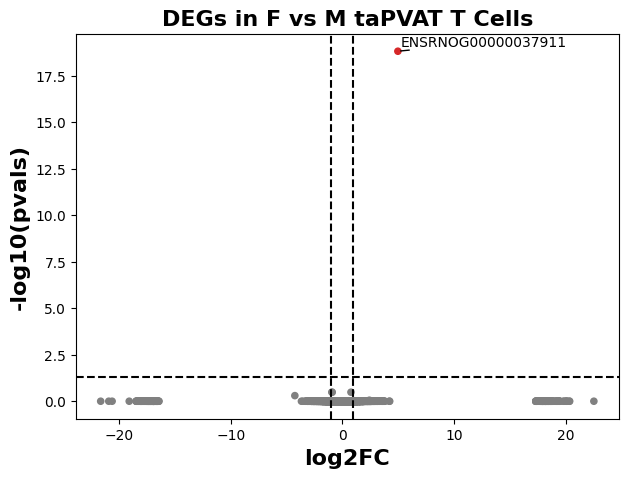

Comparing across sex in taPVAT Doublets
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_01       2
P_CTRL_24W_M_03    2
P_CTRL_8W_M_02     2
P_CTRL_8W_M_01     2
P_HF_24W_F_01      1
P_CTRL_24W_F_03    1
P_CTRL_8W_F_01     1
Name: count, dtype: int64
Comparing across sex in taPVAT Fibroblasts_Pi16++


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.71 seconds.

Fitting dispersion trend curve...
... done in 3.76 seconds.

Fitting MAP dispersions...
... done in 6.56 seconds.

Fitting LFCs...
... done in 4.35 seconds.

Refitting 6 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



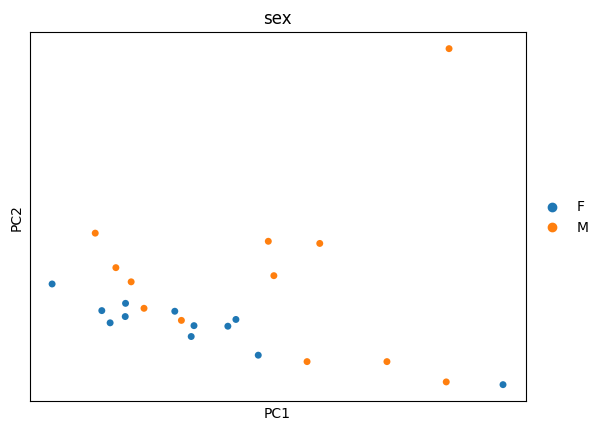

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.61 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
4933400A11Rik    0.076763       -0.148471    2.308173 -0.064324  0.948712   
A3galt2          0.906427       -0.898521    0.781733 -1.149396  0.250393   
AABR07000398.1  75.749387       -0.424753    0.279973 -1.517120  0.129236   
AABR07001942.1   0.646792       -2.003362    1.052185 -1.904002  0.056910   
AABR07002467.1   0.152648      -16.847639  267.201587 -0.063052  0.949725   
...                   ...             ...         ...       ...       ...   
Zzz3             7.546010        0.176154    0.240586  0.732189  0.464053   
mrpl11           0.625120        1.336888    0.831348  1.608096  0.107814   
mrpl24           1.041941        1.187363    0.642876  1.846956  0.064754   
mrpl9            1.069111       -0.458537    0.649083 -0.706439  0.479915   
rnf141           0.890237        0.182514    0.687433  0.265501  0.790623   

                    padj  
4933400A11Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.844497  
AABR07001942.1       NaN  
AABR07002467.1       NaN  
...                  ...  
Zzz3            0.922323  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[12108 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_Pi16++_F_vs_M_sex_comparison....


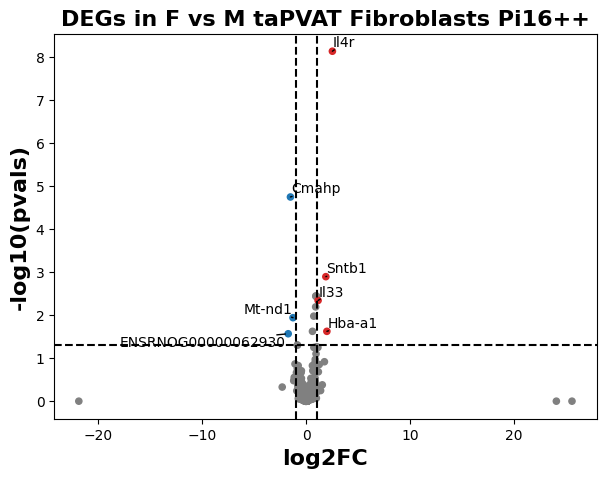

Comparing across sex in taPVAT ECs_Venous


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.93 seconds.

Fitting dispersion trend curve...
... done in 3.45 seconds.

Fitting MAP dispersions...
... done in 6.14 seconds.

Fitting LFCs...
... done in 4.34 seconds.

Refitting 8 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP

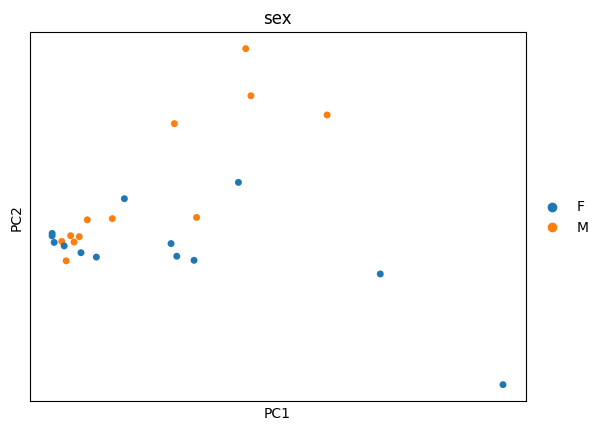

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 7.35 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.596717        1.030045  0.838856  1.227917  0.219478   
AABR07000398.1  25.927528       -1.103459  0.307180 -3.592222  0.000328   
AABR07001592.2   0.104361        1.276233  1.672753  0.762954  0.445491   
AABR07001942.1   0.424355       -1.425840  1.089501 -1.308709  0.190633   
AABR07002969.1   0.798046        0.158096  0.761720  0.207551  0.835580   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      0.399686        1.483707  2.455004  0.604360  0.545604   
mrpl11           0.337220        0.586329  1.082160  0.541814  0.587947   
mrpl24           0.598267        0.287037  0.799323  0.359100  0.719520   
mrpl9            0.246717        0.510472  1.198528  0.425916  0.670169   
rnf141           0.493010        0.046013  0.786004  0.058541  0.953318   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.010346  
AABR07001592.2       NaN  
AABR07001942.1       NaN  
AABR07002969.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141               NaN  

[11347 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_ECs_Venous_F_vs_M_sex_comparison....


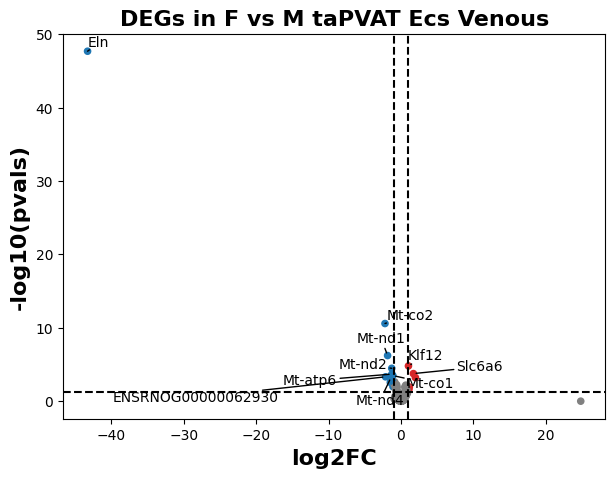

Comparing across sex in taPVAT Macrophages_M1_Cd80+
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_01    2
Name: count, dtype: int64
Comparing across sex in taPVAT Dendritic_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_M_02       2
P_CTRL_24W_M_01    2
P_CTRL_24W_F_02    2
P_CTRL_8W_M_03     2
P_CTRL_8W_M_02     1
P_CTRL_8W_M_01     1
P_HF_8W_F_01       1
Name: count, dtype: int64
Comparing across sex in taPVAT B_Cells_Naive
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_24W_F_02    2
P_CTRL_24W_F_03    1
P_CTRL_24W_F_01    1
Name: count, dtype: int64
Comparing across sex in taPVAT NK_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_02     2
P_CTRL_8W_F_01    1
Name: count, dtype: int64
Comparing across sex in taPVAT T_Regs
There are less than 3 cells of this cell type in the following samples:
sam

In [11]:
%%time
### High level comparisons across 28 specific cell types
deseqRes = []

group_list = ['diet', 'time', 'sex']
group1_list = ['Control', '8W', 'M']
group2_list = ['HF', '24W', 'F']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
              
        adata_subset = adata[adata.obs['celltype'] == celltype].copy()
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2)
            de['subset'] = 'None'
            de['sub_id'] = 'None'
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'high'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, return_fig = False, save = True)
            plt.show()
        
deseqResults3 = pd.concat(deseqRes)
deseqResults3.to_csv('../output/DEGs/taPVAT_celltype_high_level_deseq_all_genes_all.txt', sep = '\t')

## Mid-level comparisons

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.03 seconds.

Fitting dispersion trend curve...
... done in 5.98 seconds.

Fitting MAP dispersions...
... done in 11.34 seconds.

Fitting LFCs...
... done in 6.36 seconds.

Refitting 26 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



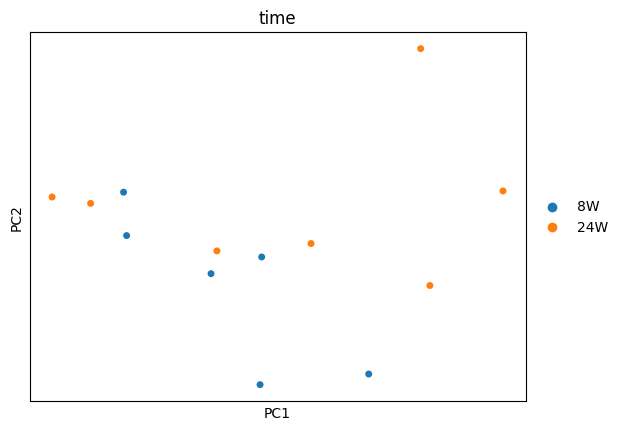

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.31 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.391090       -0.506025  0.517802 -0.977256  0.328443   
4930404H24Rik    0.178447        1.757328  2.599659  0.675984  0.499051   
4930455H04Rik    4.146346        0.347254  0.636020  0.545979  0.585080   
4933400A11Rik    0.547962        0.904003  1.623748  0.556739  0.577706   
6330411D24Rik   14.128785       -0.166549  0.439597 -0.378867  0.704787   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      5.763590       -0.712088  0.524913 -1.356584  0.174913   
mrpl11         229.398483        0.054961  0.172846  0.317976  0.750503   
mrpl24         277.513119        0.052157  0.107977  0.483035  0.629071   
mrpl9           84.701596       -0.448626  0.158955 -2.822352  0.004767   
rnf141         167.882408       -0.001729  0.154214 -0.011215  0.991052   

                   padj  
3110082J24Rik  0.647422  
4930404H24Rik       NaN  
4930455H04Rik  0.820806  
4933400A11Rik       NaN  
6330411D24Rik  0.880137  
...                 ...  
hist1h2ail2    0.481952  
mrpl11         0.903673  
mrpl24         0.843466  
mrpl9          0.072293  
rnf141         0.996619  

[19718 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


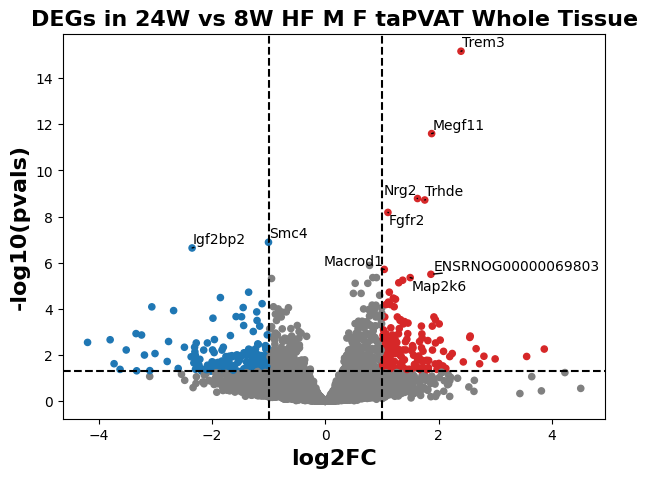

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.28 seconds.

Fitting dispersion trend curve...
... done in 6.00 seconds.

Fitting MAP dispersions...
... done in 11.34 seconds.

Fitting LFCs...
... done in 5.81 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



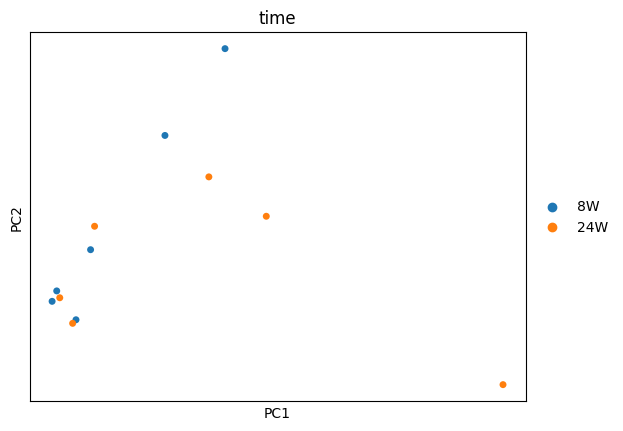

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.08 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   33.193348       -0.886877  0.443372 -2.000300  0.045468   
4930404H24Rik    0.510693        1.539202  2.020800  0.761679  0.446251   
4930455H04Rik    4.687607        0.258980  0.540844  0.478844  0.632050   
4933400A11Rik    0.785306        0.408770  1.440406  0.283788  0.776573   
6330411D24Rik   14.182080       -0.161216  0.481601 -0.334750  0.737814   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      8.726830       -1.296061  0.394795 -3.282872  0.001028   
mrpl11         257.881167        0.140541  0.175030  0.802956  0.422000   
mrpl24         399.520752        0.039163  0.180205  0.217326  0.827955   
mrpl9          107.300958       -0.174179  0.128388 -1.356669  0.174886   
rnf141         179.098620        0.194015  0.152790  1.269813  0.204151   

                   padj  
3110082J24Rik  0.229671  
4930404H24Rik       NaN  
4930455H04Rik  0.849594  
4933400A11Rik       NaN  
6330411D24Rik  0.903606  
...                 ...  
hist1h2ail2    0.021291  
mrpl11         0.724510  
mrpl24         0.943713  
mrpl9          0.478251  
rnf141         0.519972  

[19439 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


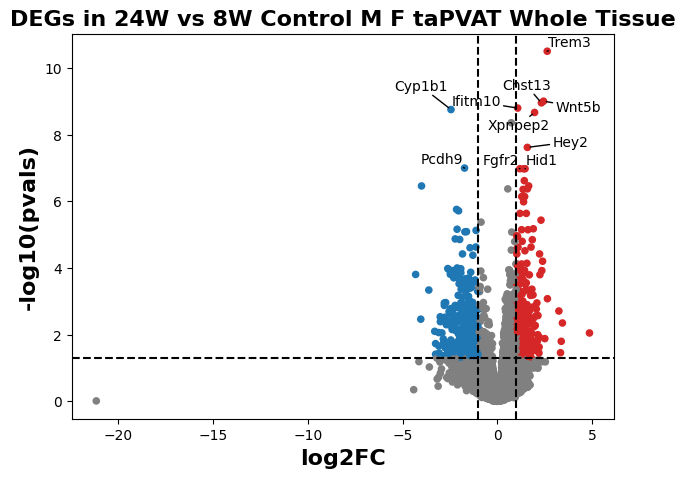

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.26 seconds.

Fitting dispersion trend curve...
... done in 6.19 seconds.

Fitting MAP dispersions...
... done in 11.42 seconds.

Fitting LFCs...
... done in 5.80 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



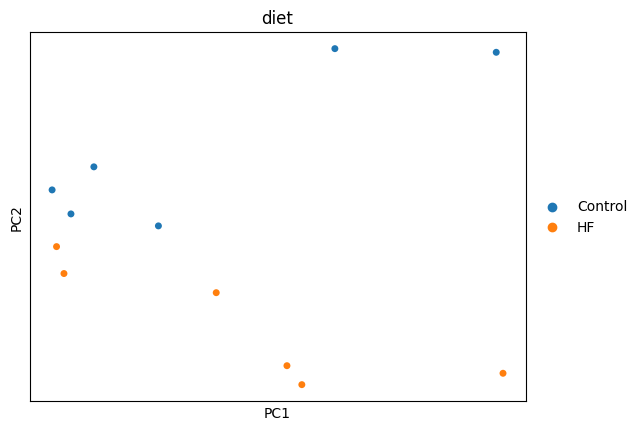

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.18 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.486955       -1.774923  2.234166 -0.794446  0.426936   
3110082J24Rik   41.926093        0.163794  0.330758  0.495207  0.620454   
4930455H04Rik    4.092710        0.010323  0.582562  0.017720  0.985862   
4933400A11Rik    0.433729       -0.573412  1.624326 -0.353015  0.724077   
6330411D24Rik   14.021537        0.018731  0.471793  0.039701  0.968331   
...                   ...             ...       ...       ...       ...   
hist1h2ail2     10.177715       -0.546194  0.416500 -1.311391  0.189726   
mrpl11         234.115239        0.053605  0.169419  0.316405  0.751695   
mrpl24         337.341039       -0.278046  0.174165 -1.596453  0.110388   
mrpl9          108.450418        0.054900  0.136962  0.400842  0.688537   
rnf141         171.484569        0.261662  0.122838  2.130142  0.033160   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.886886  
4930455H04Rik  0.996745  
4933400A11Rik       NaN  
6330411D24Rik  0.994069  
...                 ...  
hist1h2ail2    0.565008  
mrpl11         0.934596  
mrpl24         0.430233  
mrpl9          0.912390  
rnf141         0.217573  

[19605 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_8W_M_F_vs_Control_8W_M_F_diet_comparison....


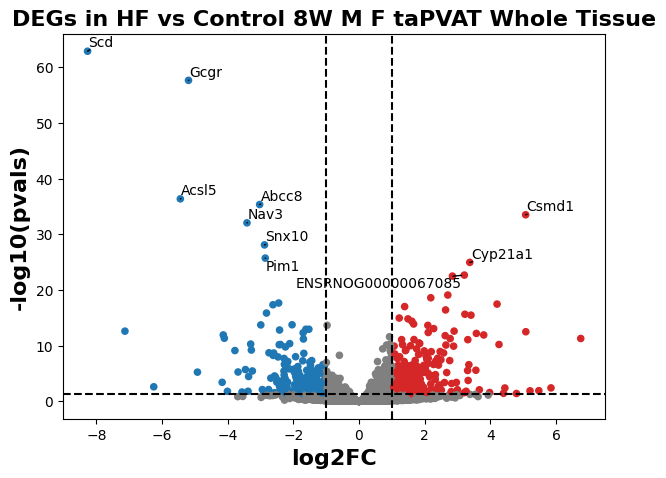

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.05 seconds.

Fitting dispersion trend curve...
... done in 5.79 seconds.

Fitting MAP dispersions...
... done in 11.37 seconds.

Fitting LFCs...
... done in 6.29 seconds.

Refitting 8 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



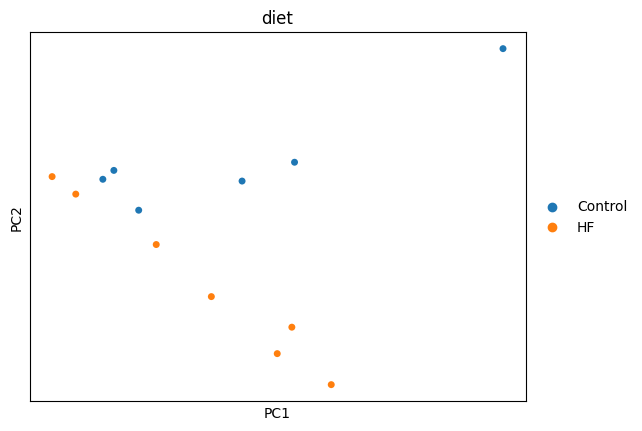

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.08 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   24.115571        0.496091  0.597058  0.830892  0.406035   
4930404H24Rik    0.423971       -0.541046  1.668761 -0.324220  0.745772   
4930455H04Rik    4.681922        0.125316  0.593129  0.211279  0.832670   
4933400A11Rik    0.858851       -0.146018  1.451462 -0.100601  0.919867   
6330411D24Rik   14.458476        0.029580  0.452707  0.065340  0.947904   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      4.362299        0.098851  0.518715  0.190568  0.848864   
mrpl11         252.209310       -0.011065  0.189000 -0.058544  0.953315   
mrpl24         328.915284       -0.252271  0.123243 -2.046941  0.040664   
mrpl9           83.422863       -0.208398  0.151119 -1.379029  0.167886   
rnf141         175.869048        0.080496  0.170864  0.471109  0.637563   

                   padj  
3110082J24Rik  0.750191  
4930404H24Rik       NaN  
4930455H04Rik  0.951153  
4933400A11Rik       NaN  
6330411D24Rik  0.985286  
...                 ...  
hist1h2ail2    0.955502  
mrpl11         0.987043  
mrpl24         0.256019  
mrpl9          0.513975  
rnf141         0.878838  

[19547 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_24W_M_F_vs_Control_24W_M_F_diet_comparison....


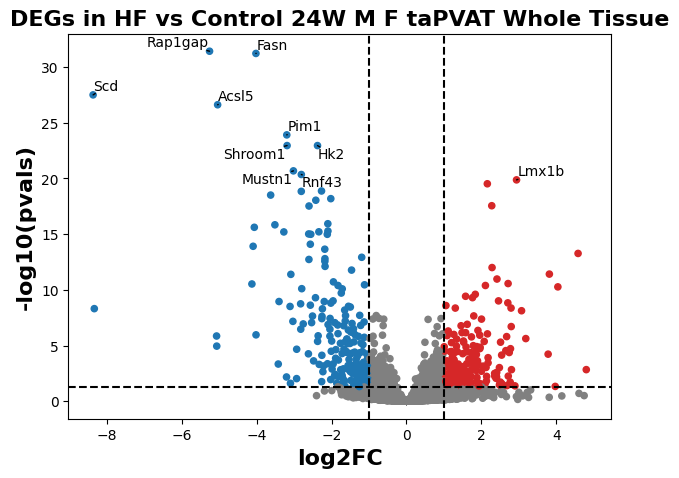

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.08 seconds.

Fitting dispersion trend curve...
... done in 5.98 seconds.

Fitting MAP dispersions...
... done in 11.45 seconds.

Fitting LFCs...
... done in 6.29 seconds.

Refitting 26 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



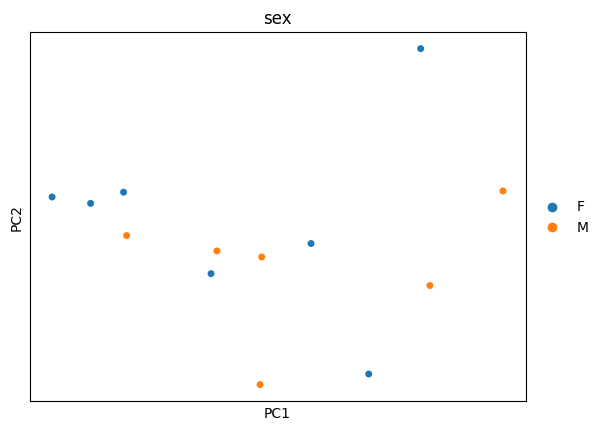

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.28 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.391090        0.860246  0.474093  1.814508  0.069600   
4930404H24Rik    0.178447        0.999084  2.452849  0.407316  0.683776   
4930455H04Rik    4.146346       -1.118942  0.584552 -1.914186  0.055596   
4933400A11Rik    0.547962       -0.865901  1.651641 -0.524267  0.600093   
6330411D24Rik   14.128785        0.315890  0.425398  0.742576  0.457739   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      5.763590        0.611760  0.528129  1.158354  0.246720   
mrpl11         229.398483        0.228274  0.156293  1.460548  0.144139   
mrpl24         277.513119       -0.069820  0.108295 -0.644718  0.519110   
mrpl9           84.701596       -0.111282  0.205219 -0.542259  0.587640   
rnf141         167.882408        0.090546  0.152715  0.592908  0.553243   

                   padj  
3110082J24Rik  0.440853  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
4933400A11Rik       NaN  
6330411D24Rik  0.823447  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.567496  
mrpl24         0.856599  
mrpl9          0.881182  
rnf141         0.869999  

[19718 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_HF_8W_24W_vs_M_HF_8W_24W_sex_comparison....


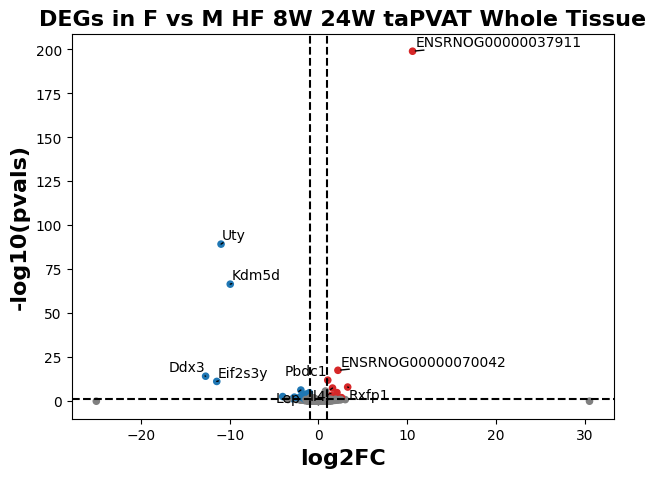

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.26 seconds.

Fitting dispersion trend curve...
... done in 6.09 seconds.

Fitting MAP dispersions...
... done in 11.67 seconds.

Fitting LFCs...
... done in 5.82 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



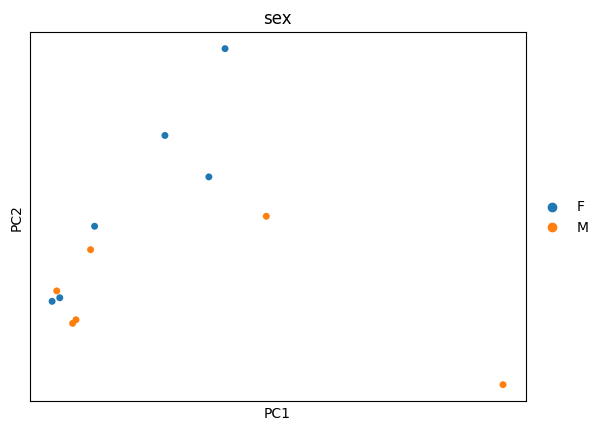

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.14 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   33.193348        0.741847  0.471571  1.573139  0.115687   
4930404H24Rik    0.510693        3.090904  2.202995  1.403046  0.160603   
4930455H04Rik    4.687607       -0.275236  0.538338 -0.511270  0.609162   
4933400A11Rik    0.785306       -0.574774  1.439492 -0.399290  0.689680   
6330411D24Rik   14.182080        0.729054  0.452839  1.609962  0.107406   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      8.726830        0.054972  0.510826  0.107613  0.914303   
mrpl11         257.881167       -0.083475  0.179835 -0.464176  0.642522   
mrpl24         399.520752        0.178570  0.173326  1.030253  0.302891   
mrpl9          107.300958        0.117778  0.131909  0.892877  0.371923   
rnf141         179.098620        0.235692  0.146067  1.613593  0.106616   

                   padj  
3110082J24Rik  0.654808  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
4933400A11Rik       NaN  
6330411D24Rik  0.640321  
...                 ...  
hist1h2ail2    0.987536  
mrpl11         0.947949  
mrpl24         0.824367  
mrpl9          0.865131  
rnf141         0.638795  

[19439 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_Control_8W_24W_vs_M_Control_8W_24W_sex_comparison....


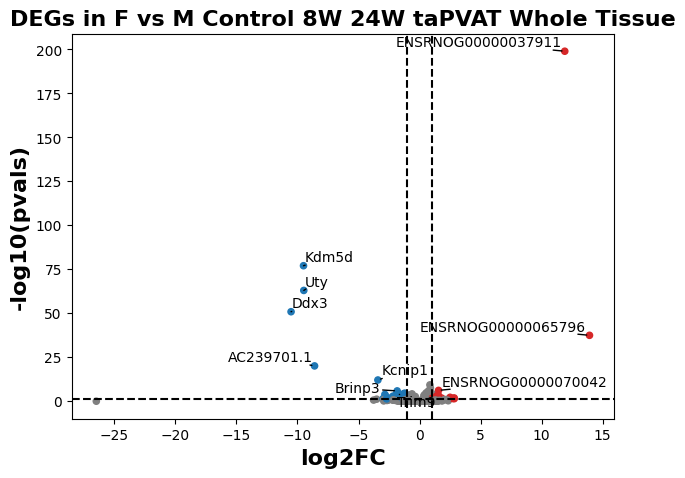

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.60 seconds.

Fitting dispersion trend curve...
... done in 6.09 seconds.

Fitting MAP dispersions...
... done in 11.63 seconds.

Fitting LFCs...
... done in 5.95 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



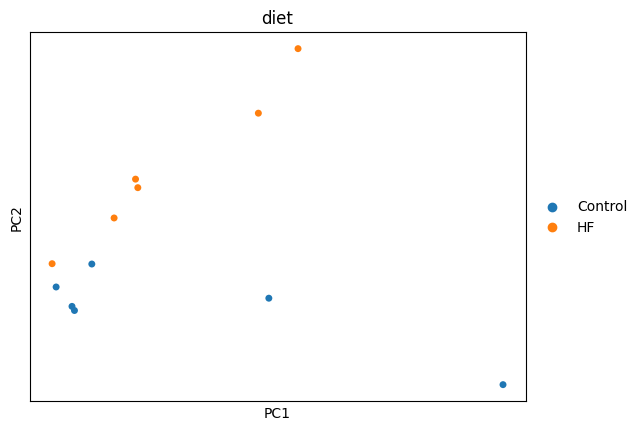

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.15 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   31.108679        0.187926  0.551011  0.341057  0.733061   
4930404H24Rik    0.121936        1.064314  3.040353  0.350063  0.726292   
4930455H04Rik    6.822313        0.305105  0.472325  0.645964  0.518302   
4933400A11Rik    0.997406       -0.189394  1.260545 -0.150247  0.880569   
6330411D24Rik   13.989461        0.268840  0.451548  0.595374  0.551594   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      8.618058       -0.573913  0.457614 -1.254142  0.209790   
mrpl11         298.171876       -0.149893  0.134995 -1.110359  0.266845   
mrpl24         422.244955       -0.138426  0.139588 -0.991673  0.321357   
mrpl9          123.059535        0.048770  0.165826  0.294105  0.768678   
rnf141         211.973517        0.240199  0.153396  1.565876  0.117378   

                   padj  
3110082J24Rik  0.956310  
4930404H24Rik       NaN  
4930455H04Rik  0.897266  
4933400A11Rik       NaN  
6330411D24Rik  0.906388  
...                 ...  
hist1h2ail2    0.716455  
mrpl11         0.765036  
mrpl24         0.804966  
mrpl9          0.963322  
rnf141         0.580447  

[19915 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_M_8W_24W_vs_Control_M_8W_24W_diet_comparison....


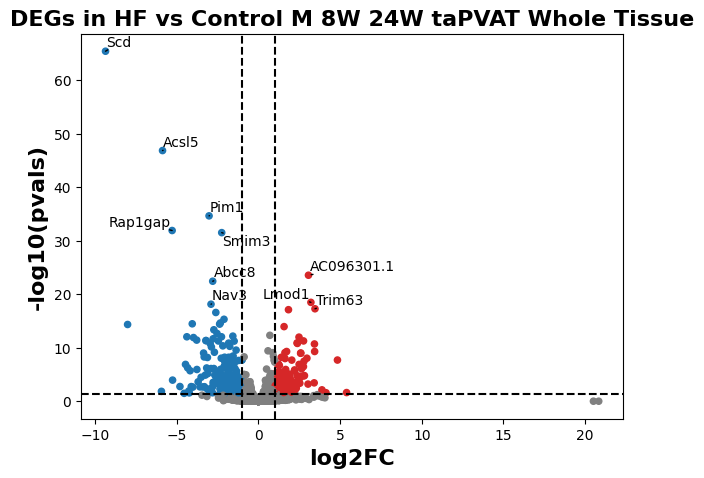

Comparing across diet in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 8.82 seconds.

Fitting dispersion trend curve...
... done in 6.19 seconds.

Fitting MAP dispersions...
... done in 11.31 seconds.

Fitting LFCs...
... done in 6.19 seconds.

Refitting 7 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



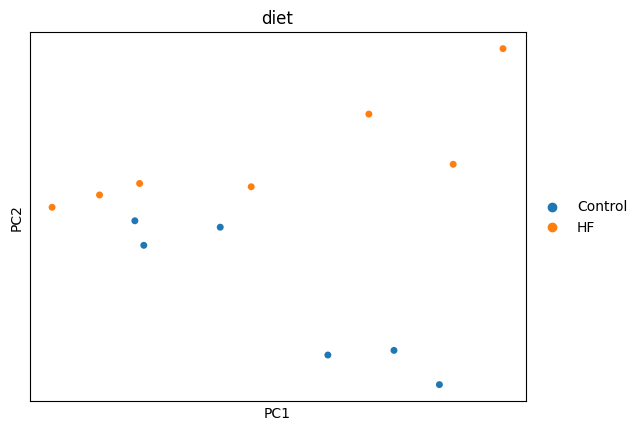

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 8.09 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.230394        0.469533  2.682770  0.175018  0.861065   
3110082J24Rik   31.438659        0.350474  0.375649  0.932983  0.350829   
4930404H24Rik    0.422163       -1.169340  1.824215 -0.641010  0.521516   
4930455H04Rik    2.847900       -0.505518  0.656481 -0.770042  0.441275   
4933400A11Rik    0.430230       -0.437868  1.861503 -0.235223  0.814036   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      5.878951       -0.025131  0.582653 -0.043131  0.965597   
mrpl11         200.455908        0.183902  0.195751  0.939468  0.347490   
mrpl24         265.792863       -0.387598  0.150803 -2.570223  0.010163   
mrpl9           74.650568       -0.189806  0.182137 -1.042105  0.297363   
rnf141         143.669365        0.094370  0.141158  0.668539  0.503790   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.655457  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
4933400A11Rik       NaN  
...                 ...  
hist1h2ail2    0.986933  
mrpl11         0.651166  
mrpl24         0.091210  
mrpl9          0.604293  
rnf141         0.768421  

[19236 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_HF_F_8W_24W_vs_Control_F_8W_24W_diet_comparison....


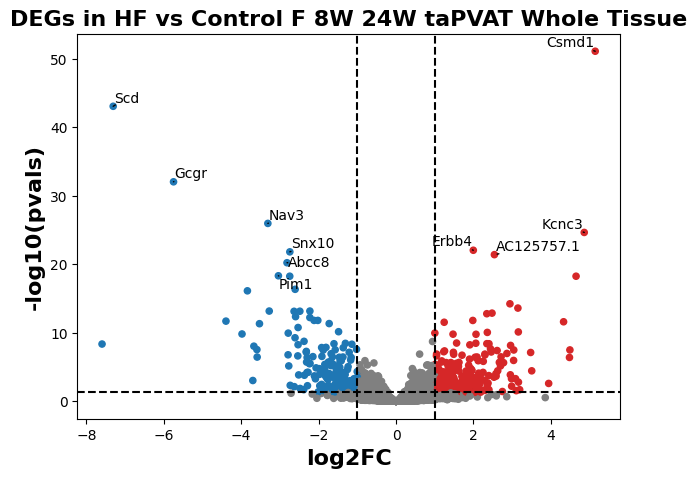

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.55 seconds.

Fitting dispersion trend curve...
... done in 6.20 seconds.

Fitting MAP dispersions...
... done in 11.48 seconds.

Fitting LFCs...
... done in 5.90 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



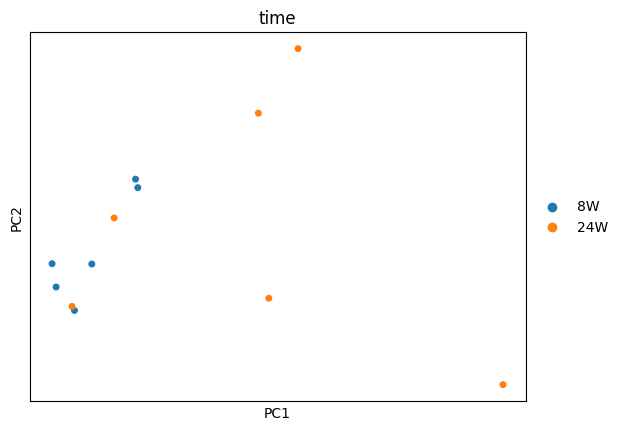

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.26 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
3110082J24Rik   31.108679       -1.088039    0.467107 -2.329313  0.019842   
4930404H24Rik    0.121936       16.819410  389.151593  0.043221  0.965526   
4930455H04Rik    6.822313        0.258182    0.456950  0.565011  0.572066   
4933400A11Rik    0.997406        0.416342    1.257151  0.331179  0.740509   
6330411D24Rik   13.989461        0.171676    0.446331  0.384638  0.700506   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      8.618058       -0.800633    0.419584 -1.908159  0.056371   
mrpl11         298.171876        0.204571    0.128156  1.596266  0.110429   
mrpl24         422.244955        0.166964    0.135544  1.231805  0.218022   
mrpl9          123.059535       -0.313435    0.135853 -2.307171  0.021045   
rnf141         211.973517       -0.003864    0.165322 -0.023374  0.981352   

                   padj  
3110082J24Rik  0.082136  
4930404H24Rik       NaN  
4930455H04Rik  0.747922  
4933400A11Rik       NaN  
6330411D24Rik  0.836937  
...                 ...  
hist1h2ail2    0.171708  
mrpl11         0.267947  
mrpl24         0.418543  
mrpl9          0.085610  
rnf141         0.990860  

[19915 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_M_Control_HF_vs_8W_M_Control_HF_time_comparison....


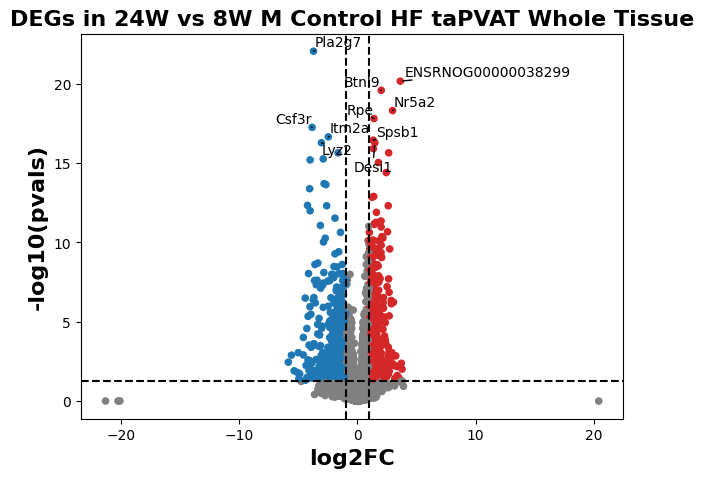

Comparing across time in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 8.88 seconds.

Fitting dispersion trend curve...
... done in 5.88 seconds.

Fitting MAP dispersions...
... done in 11.37 seconds.

Fitting LFCs...
... done in 6.19 seconds.

Refitting 8 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



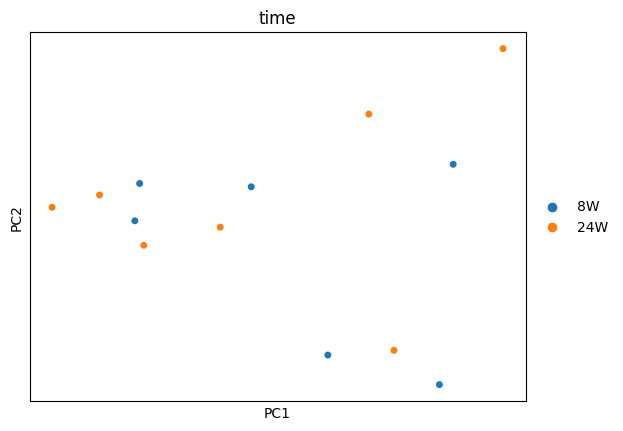

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.12 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.230394       -1.890909  2.779411 -0.680327  0.496297   
3110082J24Rik   31.438659       -0.396813  0.382602 -1.037142  0.299669   
4930404H24Rik    0.422163        1.390149  1.790934  0.776215  0.437622   
4930455H04Rik    2.847900        0.223477  0.663932  0.336597  0.736421   
4933400A11Rik    0.430230        0.867277  1.839922  0.471366  0.637379   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      5.878951       -1.208146  0.514334 -2.348954  0.018826   
mrpl11         200.455908        0.021494  0.202909  0.105931  0.915637   
mrpl24         265.792863       -0.071054  0.188232 -0.377484  0.705814   
mrpl9           74.650568       -0.294062  0.170132 -1.728430  0.083911   
rnf141         143.669365        0.192754  0.133269  1.446351  0.148079   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.694232  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
4933400A11Rik       NaN  
...                 ...  
hist1h2ail2    0.255040  
mrpl11         0.976594  
mrpl24         0.906092  
mrpl9          0.451247  
rnf141         0.554938  

[19236 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_24W_F_Control_HF_vs_8W_F_Control_HF_time_comparison....


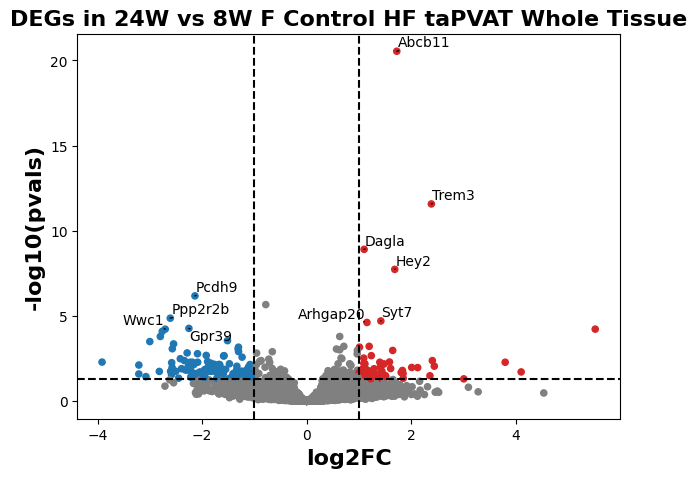

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.23 seconds.

Fitting dispersion trend curve...
... done in 6.18 seconds.

Fitting MAP dispersions...
... done in 11.52 seconds.

Fitting LFCs...
... done in 5.94 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



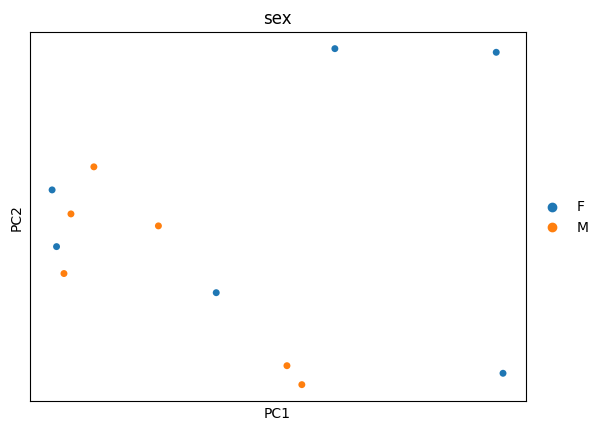

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.10 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
1700066B19Rik    0.486955        0.295624  2.177511  0.135762  0.892009   
3110082J24Rik   41.926093        0.555839  0.301836  1.841529  0.065544   
4930455H04Rik    4.092710       -0.615120  0.555670 -1.106988  0.268299   
4933400A11Rik    0.433729       -0.739152  1.590664 -0.464682  0.642160   
6330411D24Rik   14.021537        0.781684  0.431161  1.812974  0.069836   
...                   ...             ...       ...       ...       ...   
hist1h2ail2     10.177715        0.414200  0.429128  0.965214  0.334438   
mrpl11         234.115239        0.196228  0.158829  1.235466  0.216657   
mrpl24         337.341039        0.187361  0.185314  1.011047  0.311994   
mrpl9          108.450418       -0.015741  0.136357 -0.115442  0.908095   
rnf141         171.484569        0.059840  0.142833  0.418954  0.675250   

                   padj  
1700066B19Rik       NaN  
3110082J24Rik  0.410360  
4930455H04Rik  0.705068  
4933400A11Rik       NaN  
6330411D24Rik  0.422282  
...                 ...  
hist1h2ail2    0.754589  
mrpl11         0.653925  
mrpl24         0.740337  
mrpl9          0.982893  
rnf141         0.923160  

[19605 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_8W_Control_HF_vs_M_8W_Control_HF_sex_comparison....


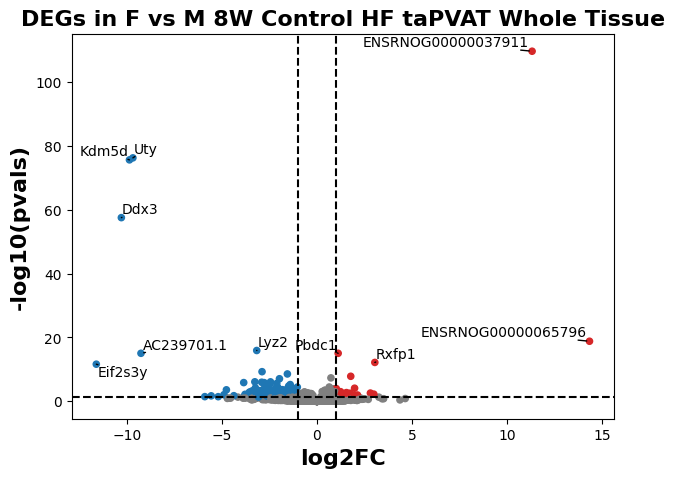

Comparing across sex in taPVAT whole_tissue


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 9.05 seconds.

Fitting dispersion trend curve...
... done in 5.81 seconds.

Fitting MAP dispersions...
... done in 11.38 seconds.

Fitting LFCs...
... done in 6.21 seconds.

Refitting 6 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



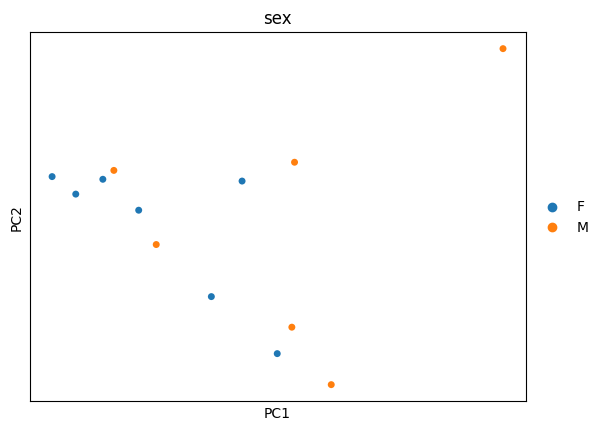

Running Wald tests...


Log2 fold change & Wald test p-value: sex F vs M


... done in 8.18 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   24.115571        1.210284  0.528661  2.289341  0.022060   
4930404H24Rik    0.423971        1.830026  1.587787  1.152564  0.249089   
4930455H04Rik    4.681922       -0.688850  0.553723 -1.244033  0.213488   
4933400A11Rik    0.858851       -0.556768  1.449149 -0.384203  0.700828   
6330411D24Rik   14.458476        0.225776  0.436947  0.516712  0.605357   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      4.362299        0.019726  0.510710  0.038624  0.969190   
mrpl11         252.209310       -0.018013  0.187204 -0.096223  0.923343   
mrpl24         328.915284       -0.053236  0.145386 -0.366169  0.714239   
mrpl9           83.422863        0.002484  0.162942  0.015246  0.987836   
rnf141         175.869048        0.250397  0.155854  1.606606  0.108141   

                   padj  
3110082J24Rik  0.161145  
4930404H24Rik       NaN  
4930455H04Rik  0.535459  
4933400A11Rik       NaN  
6330411D24Rik  0.842935  
...                 ...  
hist1h2ail2    0.991434  
mrpl11         0.973790  
mrpl24         0.895518  
mrpl9          0.996129  
rnf141         0.378789  

[19547 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_whole_tissue_F_24W_Control_HF_vs_M_24W_Control_HF_sex_comparison....


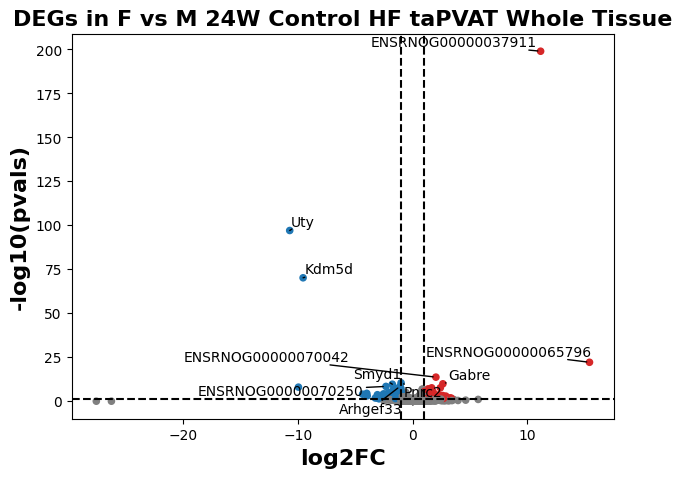

CPU times: user 16min 39s, sys: 1min 56s, total: 18min 35s
Wall time: 24min 2s


In [12]:
%%time
### Mid-level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    adata_subset = adata[(adata.obs[sub_list[i]] == sub_id[i])].copy()   
          
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    more_info = more_info_list[i]
    
    ### Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    ### Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
        de['subset'] = sub_list[i]
        de['sub_id'] = sub_id[i]
        de['sub_2'] = 'None'
        de['sub_id_2'] = 'None'
        de['level'] = 'mid'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plt.show()
    
deseqResults4 = pd.concat(deseqRes)
deseqResults4.to_csv('../output/DEGs/taPVAT_whole_tissue_mid_level_deseq_all_genes_all.txt', sep = '\t')

Comparing across time in taPVAT Fibroblasts
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_24W_F_01    1
Name: count, dtype: int64
Comparing across time in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 8.27 seconds.

Fitting dispersion trend curve...
... done in 5.67 seconds.

Fitting MAP dispersions...
... done in 10.57 seconds.

Fitting LFCs...
... done in 6.07 seconds.

Refitting 14 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



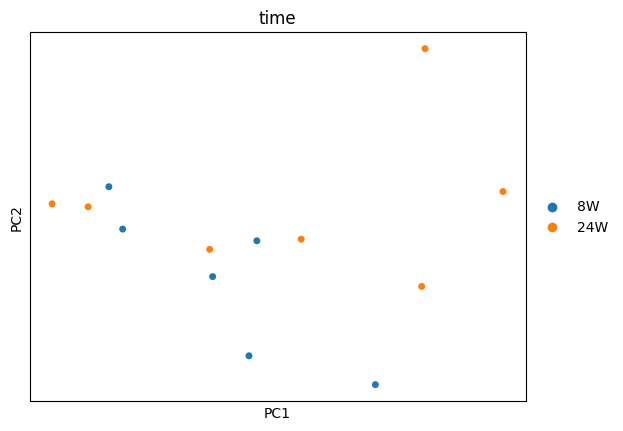

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 8.18 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik   30.940295       -0.517234  0.524508 -0.986132  0.324068   
4930404H24Rik    0.169235        1.803691  2.709884  0.665597  0.505669   
4930455H04Rik    3.526779        0.208311  0.792171  0.262962  0.792580   
6330411D24Rik    6.093328        0.443564  0.931314  0.476277  0.633877   
A1cf             1.124546       -0.770918  1.096504 -0.703069  0.482013   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      2.160745       -0.454730  0.791419 -0.574575  0.565578   
mrpl11         210.435120        0.032871  0.146649  0.224144  0.822645   
mrpl24         248.625347        0.075014  0.111923  0.670227  0.502713   
mrpl9           64.307157       -0.553402  0.192419 -2.876024  0.004027   
rnf141         115.120921        0.094303  0.200700  0.469871  0.638447   

                   padj  
3110082J24Rik  0.628798  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
6330411D24Rik  0.848785  
A1cf                NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11         0.934226  
mrpl24         0.769754  
mrpl9          0.055301  
rnf141         0.851605  

[18570 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


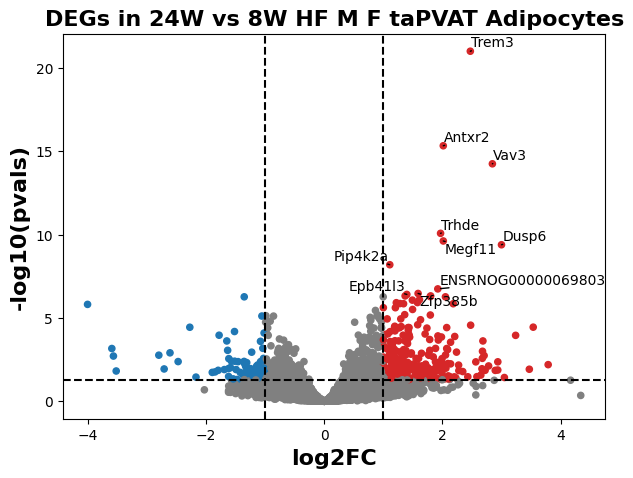

Comparing across time in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.31 seconds.

Fitting dispersion trend curve...
... done in 4.31 seconds.

Fitting MAP dispersions...
... done in 6.81 seconds.

Fitting LFCs...
... done in 4.60 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



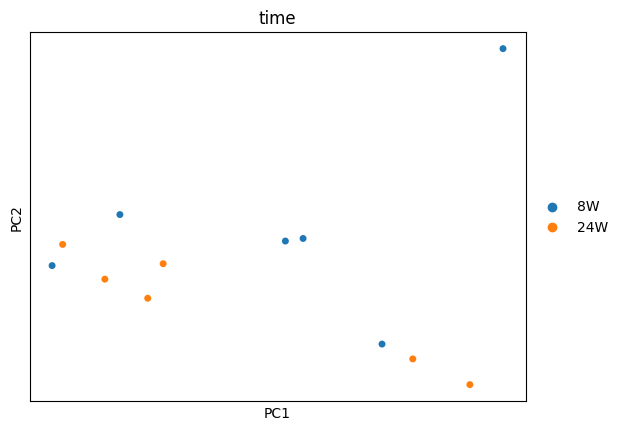

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.87 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
3110082J24Rik     0.233273       -0.914171  2.119167 -0.431382  0.666190   
6330411D24Rik    10.269203        0.385401  0.626344  0.615318  0.538345   
A3galt2           1.914887        0.122126  0.728157  0.167719  0.866804   
AABR07000398.1  256.636584       -0.732270  0.336558 -2.175764  0.029573   
AABR07001592.2    0.666652        2.227490  1.538486  1.447845  0.147660   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.819462       -1.520340  1.246154 -1.220026  0.222455   
mrpl11            2.188942        0.482077  0.771036  0.625233  0.531818   
mrpl24            4.946202        0.156683  0.460664  0.340125  0.733762   
mrpl9             4.559149       -0.000128  0.531628 -0.000240  0.999808   
rnf141            7.208584        0.050755  0.387729  0.130902  0.895853   

                    padj  
3110082J24Rik        NaN  
6330411D24Rik   0.921855  
A3galt2              NaN  
AABR07000398.1  0.490032  
AABR07001592.2       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24          0.968144  
mrpl9           0.999892  
rnf141          0.988272  

[13565 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


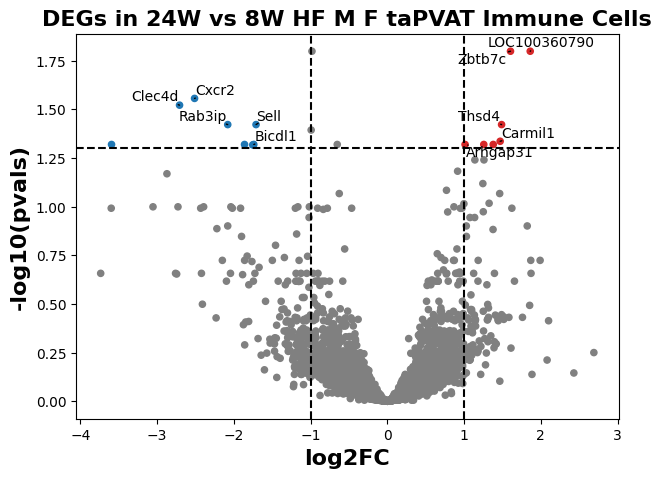

Comparing across time in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.18 seconds.

Fitting dispersion trend curve...
... done in 4.58 seconds.

Fitting MAP dispersions...
... done in 8.20 seconds.

Fitting LFCs...
... done in 5.23 seconds.

Refitting 7 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP

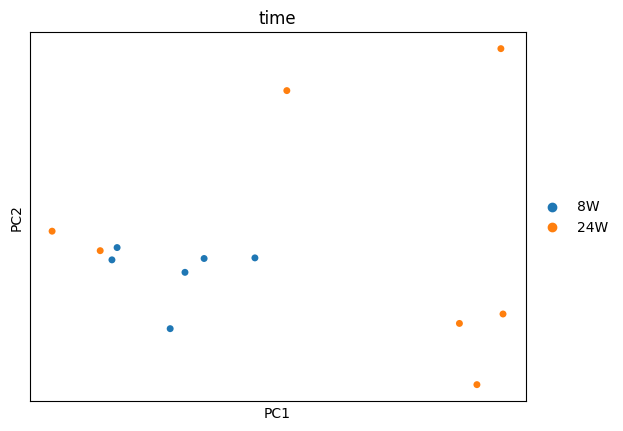

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.70 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.603793        1.220151  1.441373  0.846520  0.397263   
6330411D24Rik     0.209899       -1.370991  2.503091 -0.547719  0.583885   
A3galt2           6.533055       -0.653389  0.417342 -1.565598  0.117443   
AABR07000398.1  473.904155       -0.284701  0.305327 -0.932446  0.351106   
AABR07000544.1    0.627906        0.816939  1.317903  0.619878  0.535338   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       1.064571       -0.494209  0.999765 -0.494326  0.621076   
mrpl11            4.205762        0.103140  0.546841  0.188610  0.850398   
mrpl24            9.102769       -0.414570  0.384287 -1.078804  0.280675   
mrpl9             5.902693        0.582513  0.454698  1.281099  0.200159   
rnf141           22.672008       -0.350882  0.261447 -1.342074  0.179572   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2              NaN  
AABR07000398.1  0.838329  
AABR07000544.1       NaN  
...                  ...  
hist1h2ail2          NaN  
mrpl11               NaN  
mrpl24          0.794663  
mrpl9                NaN  
rnf141          0.710195  

[15327 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


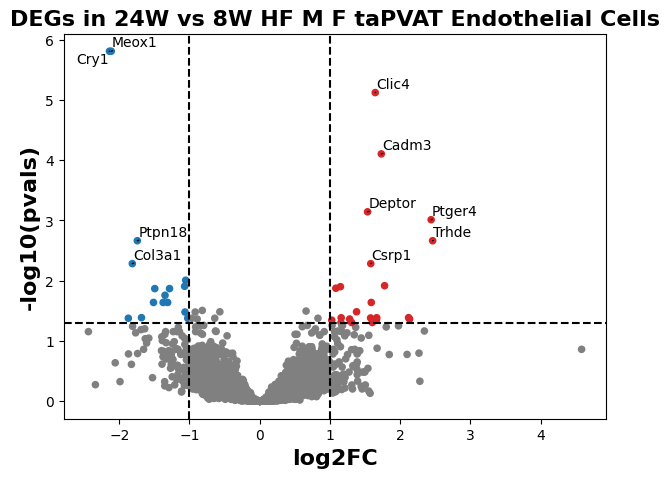

Comparing across time in taPVAT Pericytes


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 4.43 seconds.

Fitting dispersion trend curve...
... done in 3.86 seconds.

Fitting MAP dispersions...
... done in 6.67 seconds.

Fitting LFCs...
... done in 4.46 seconds.

Refitting 1 outliers.

Fitting size factors...
/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/dds.py:830: RuntimeWarning:

Every gene contains at least one zero, cannot compute log geometric means. Switching to iterative mode.

Fitting dispersions...
... done in 0.01 seconds.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/pydeseq2/utils.py:767: RuntimeWarning:

Mean of empty slice.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean 

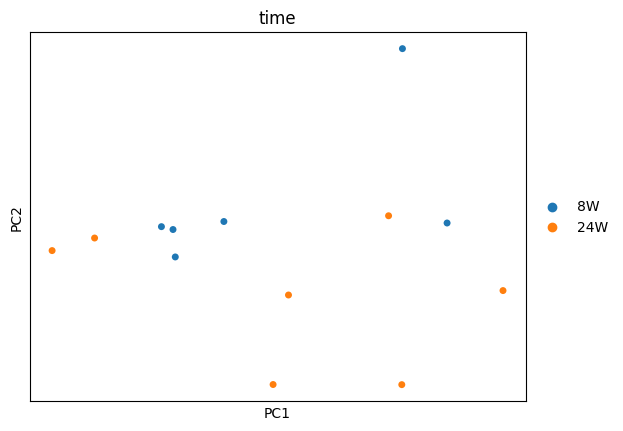

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.46 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2          0.740920       -0.459103  1.197514 -0.383380  0.701438   
AABR07000398.1  94.959345       -0.561165  0.280907 -1.997691  0.045750   
AABR07000544.1   0.779934        0.310403  1.300112  0.238751  0.811299   
AABR07001942.1   2.027986        0.100510  0.722990  0.139020  0.889434   
AABR07002969.1   2.114091       -0.204051  0.698916 -0.291953  0.770322   
...                   ...             ...       ...       ...       ...   
Zzz3            14.329979        0.242450  0.303538  0.798747  0.424437   
mrpl11           1.303370       -0.504556  0.938334 -0.537714  0.590774   
mrpl24           2.345815       -0.945724  0.749760 -1.261369  0.207176   
mrpl9            1.704084       -0.155047  0.831246 -0.186524  0.852034   
rnf141           3.418559        0.485625  0.571247  0.850114  0.395262   

                    padj  
A3galt2         0.999994  
AABR07000398.1  0.999994  
AABR07000544.1  0.999994  
AABR07001942.1  0.999994  
AABR07002969.1  0.999994  
...                  ...  
Zzz3            0.999994  
mrpl11          0.999994  
mrpl24          0.999994  
mrpl9           0.999994  
rnf141          0.999994  

[12488 rows x 6 columns]

files saved to: ../output/DEGs/taPVAT_Pericytes_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


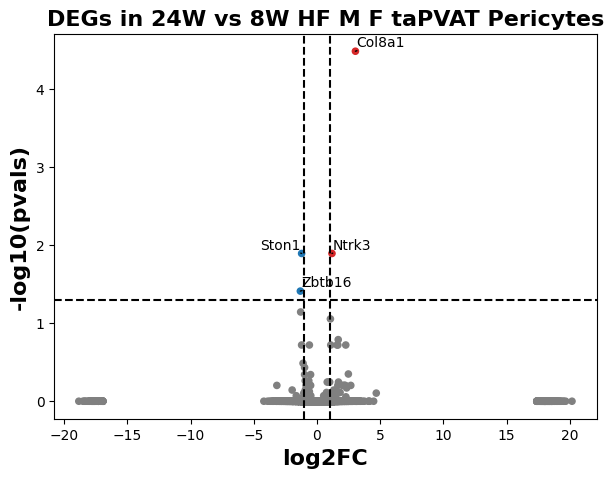

Comparing across time in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 5.46 seconds.

Fitting dispersion trend curve...
... done in 3.73 seconds.

Fitting MAP dispersions...
... done in 6.20 seconds.

Fitting LFCs...
... done in 4.47 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



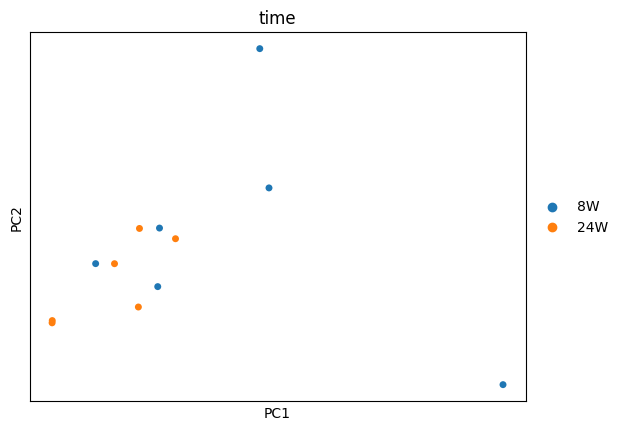

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.42 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2           0.469164        0.215845  1.434807  0.150435  0.880422   
AABR07000398.1  110.226273        0.025284  0.309071  0.081805  0.934802   
AABR07000544.1    0.329460        0.534059  1.981987  0.269456  0.787578   
AABR07001592.2    0.319462       -0.005001  1.684283 -0.002970  0.997631   
AABR07001942.1    1.299054       -0.285366  0.946882 -0.301374  0.763129   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.977986        0.670093  0.979626  0.684029  0.493957   
mrpl11            1.237663       -1.421290  1.051744 -1.351365  0.176579   
mrpl24            1.368381       -2.577090  1.200300 -2.147038  0.031790   
mrpl9             1.036746       -1.383591  1.122378 -1.232732  0.217676   
rnf141            4.061858        0.538472  0.565851  0.951614  0.341293   

                    padj  
A3galt2         0.999884  
AABR07000398.1  0.999884  
AABR07000544.1  0.999884  
AABR07001592.2  0.999884  
AABR07001942.1  0.999884  
...                  ...  
hist1h2ail2     0.999884  
mrpl11          0.999884  
mrpl24          0.999884  
mrpl9           0.999884  
rnf141          0.999884  

[12250 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_24W_HF_M_F_vs_8W_HF_M_F_time_comparison....


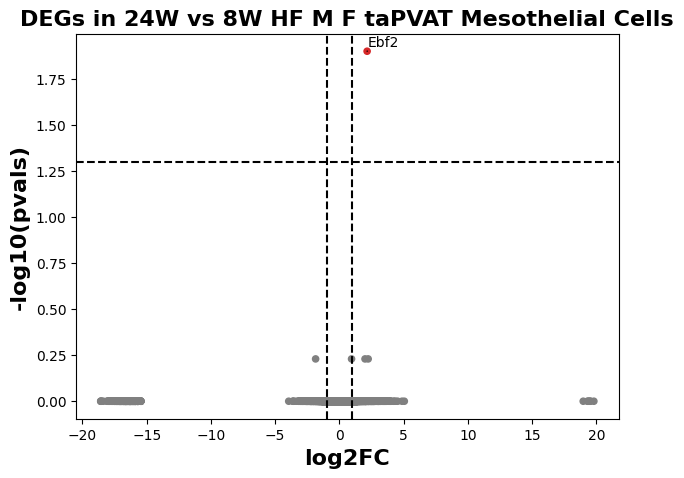

Comparing across time in taPVAT Neuronal_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_02     2
P_HF_8W_M_01     2
P_HF_24W_M_01    2
P_HF_24W_F_02    1
P_HF_24W_M_02    1
Name: count, dtype: int64
Comparing across time in taPVAT SMCs
There are less than 3 cells of this cell type in the following samples:
sample_id
P_HF_8W_F_02    1
P_HF_8W_F_03    1
P_HF_8W_M_01    1
P_HF_8W_M_02    1
Name: count, dtype: int64
Comparing across time in taPVAT Fibroblasts


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.82 seconds.

Fitting dispersion trend curve...
... done in 4.52 seconds.

Fitting MAP dispersions...
... done in 7.47 seconds.

Fitting LFCs...
... done in 4.78 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



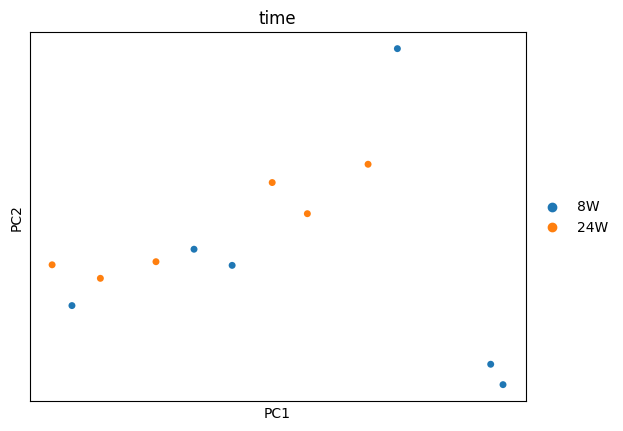

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.74 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik   0.381614        0.225549  2.026362  0.111307  0.911373   
4933400A11Rik   0.898103        1.077555  1.315923  0.818858  0.412867   
6330411D24Rik   0.774819       -0.483558  1.360692 -0.355377  0.722307   
A1cf            0.339226       -0.587128  2.144944 -0.273726  0.784295   
A3galt2         5.748762        0.277098  0.628797  0.440680  0.659445   
...                  ...             ...       ...       ...       ...   
hist1h2ail2     0.441177        0.983168  1.781086  0.552005  0.580945   
mrpl11          4.133905        1.040706  0.573371  1.815065  0.069514   
mrpl24          8.789807       -0.334629  0.387311 -0.863981  0.387598   
mrpl9           7.903437        0.028435  0.492744  0.057707  0.953982   
rnf141         14.201889        0.224751  0.298950  0.751802  0.452170   

                   padj  
4930455H04Rik       NaN  
4933400A11Rik       NaN  
6330411D24Rik       NaN  
A1cf                NaN  
A3galt2             NaN  
...                 ...  
hist1h2ail2         NaN  
mrpl11              NaN  
mrpl24         0.800869  
mrpl9               NaN  
rnf141         0.833546  

[14720 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


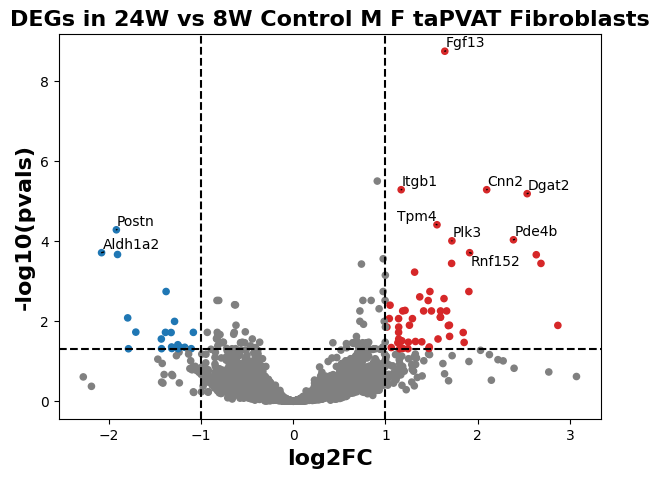

Comparing across time in taPVAT Adipocytes


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 8.76 seconds.

Fitting dispersion trend curve...
... done in 5.68 seconds.

Fitting MAP dispersions...
... done in 10.13 seconds.

Fitting LFCs...
... done in 5.51 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



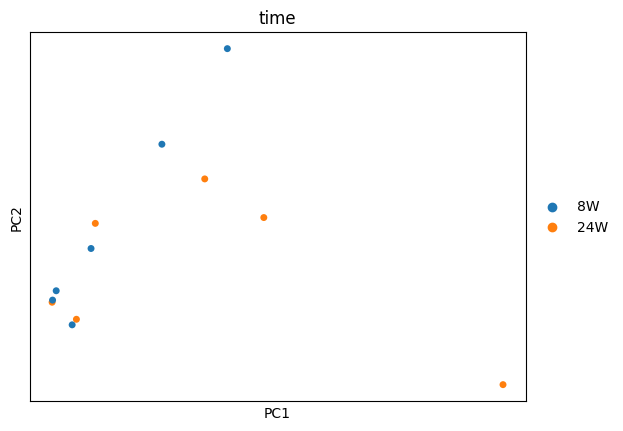

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.99 seconds.



baseMean  log2FoldChange       lfcSE      stat    pvalue  \
3110082J24Rik   32.817898       -0.967272    0.456608 -2.118387  0.034142   
4930404H24Rik    0.579762        1.459121    2.053031  0.710715  0.477261   
4930455H04Rik    2.797417        0.016154    0.690224  0.023405  0.981328   
6330411D24Rik    1.990969        0.472510    0.942113  0.501543  0.615989   
A1cf             0.680538      -18.839258  263.226255 -0.071571  0.942944   
...                   ...             ...         ...       ...       ...   
hist1h2ail2      3.900692       -1.195136    0.695056 -1.719480  0.085527   
mrpl11         233.818760        0.085961    0.123364  0.696806  0.485925   
mrpl24         350.397629        0.004005    0.122252  0.032759  0.973867   
mrpl9           80.053335       -0.224722    0.155113 -1.448763  0.147404   
rnf141         105.188941        0.290498    0.205546  1.413301  0.157567   

                   padj  
3110082J24Rik  0.196292  
4930404H24Rik       NaN  
4930455H04Rik       NaN  
6330411D24Rik       NaN  
A1cf                NaN  
...                 ...  
hist1h2ail2    0.323601  
mrpl11         0.753783  
mrpl24         0.990277  
mrpl9          0.426582  
rnf141         0.441471  

[18079 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Adipocytes_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


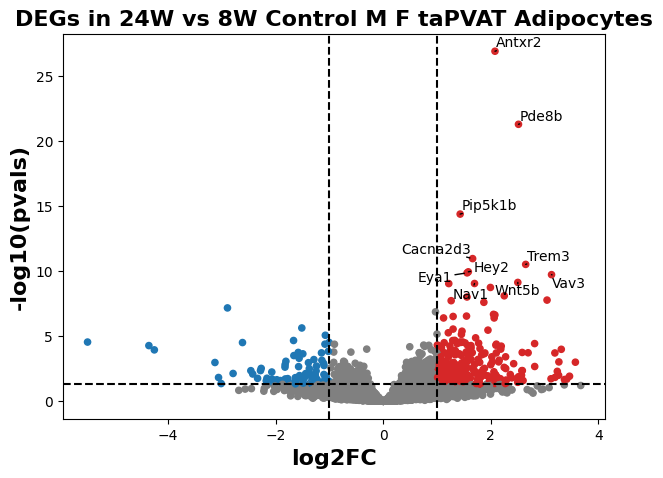

Comparing across time in taPVAT Immune_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.00 seconds.

Fitting dispersion trend curve...
... done in 4.05 seconds.

Fitting MAP dispersions...
... done in 6.65 seconds.

Fitting LFCs...
... done in 4.63 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



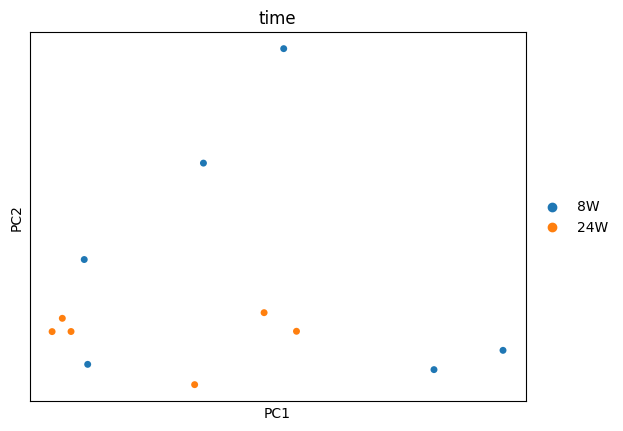

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.55 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
6330411D24Rik    10.300371        0.771822  0.643015  1.200316  0.230016   
A3galt2           2.067879       -0.168376  0.863872 -0.194908  0.845465   
AABR07000398.1  200.874318        0.014409  0.318559  0.045231  0.963923   
AABR07001592.2    0.256237        1.909526  2.344371  0.814515  0.415350   
AABR07002969.1   89.915791        0.044140  0.298930  0.147661  0.882611   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       0.514531        0.049983  1.497071  0.033387  0.973366   
mrpl11            1.931276        0.000103  0.936054  0.000110  0.999912   
mrpl24            5.316113       -0.482280  0.563832 -0.855361  0.392351   
mrpl9             1.769990        0.349147  0.743126  0.469836  0.638472   
rnf141            7.500538        0.634229  0.414170  1.531326  0.125689   

                    padj  
6330411D24Rik   0.999463  
A3galt2         0.999463  
AABR07000398.1  0.999463  
AABR07001592.2  0.999463  
AABR07002969.1  0.999463  
...                  ...  
hist1h2ail2     0.999463  
mrpl11          0.999993  
mrpl24          0.999463  
mrpl9           0.999463  
rnf141          0.999463  

[13290 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Immune_Cells_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


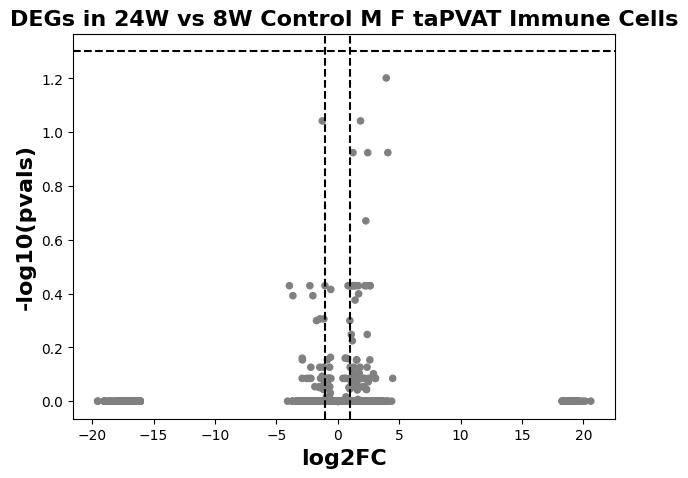

Comparing across time in taPVAT Endothelial_Cells


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 7.38 seconds.

Fitting dispersion trend curve...
... done in 4.61 seconds.

Fitting MAP dispersions...
... done in 8.00 seconds.

Fitting LFCs...
... done in 4.81 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



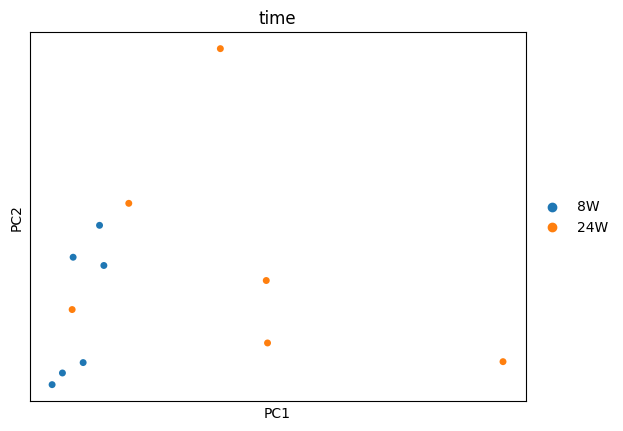

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.95 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik     0.721710        1.078115  1.306700  0.825067  0.409334   
6330411D24Rik     0.471648       -0.286127  1.711503 -0.167179  0.867229   
A3galt2          10.156686       -0.572738  0.378376 -1.513674  0.130109   
A4galt            0.402850       -0.921539  2.078166 -0.443438  0.657449   
AABR07000398.1  549.333010       -0.086146  0.320731 -0.268591  0.788244   
...                    ...             ...       ...       ...       ...   
hist1h2ail2       1.711430       -2.112343  0.880311 -2.399543  0.016416   
mrpl11            6.346099       -0.752482  0.457426 -1.645036  0.099962   
mrpl24           13.252332       -0.113791  0.309622 -0.367518  0.713233   
mrpl9             9.884953       -0.295950  0.333476 -0.887469  0.374826   
rnf141           27.494836       -0.203028  0.307429 -0.660407  0.508992   

                    padj  
4930455H04Rik        NaN  
6330411D24Rik        NaN  
A3galt2         0.554893  
A4galt               NaN  
AABR07000398.1  0.956495  
...                  ...  
hist1h2ail2          NaN  
mrpl11          0.497135  
mrpl24          0.941715  
mrpl9           0.817748  
rnf141          0.880341  

[15228 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Endothelial_Cells_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


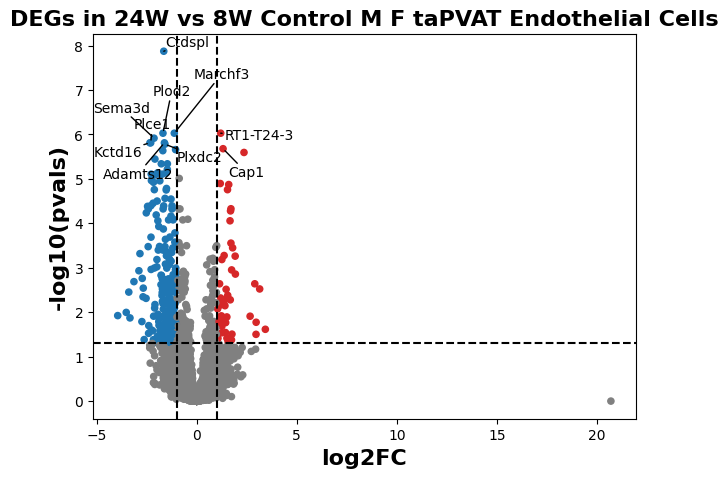

Comparing across time in taPVAT Pericytes


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 5.47 seconds.

Fitting dispersion trend curve...
... done in 3.74 seconds.

Fitting MAP dispersions...
... done in 6.32 seconds.

Fitting LFCs...
... done in 4.20 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



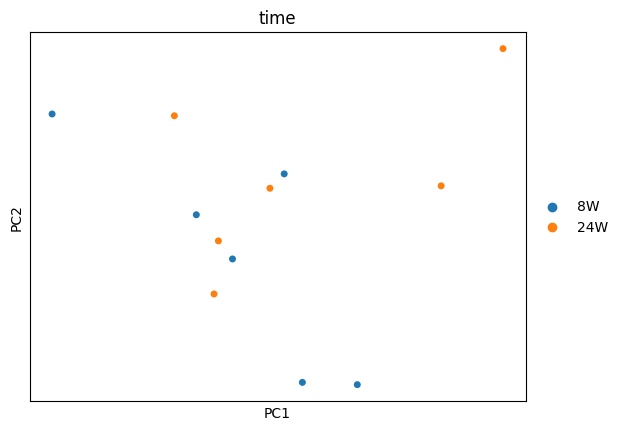

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.39 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
A3galt2           2.055914       -1.619339  0.853323 -1.897687  0.057737   
AABR07000398.1  113.789102       -0.377545  0.237439 -1.590075  0.111818   
AABR07000544.1    1.406272       -0.670805  0.879051 -0.763101  0.445403   
AABR07001942.1    4.633384       -0.324050  0.620697 -0.522074  0.601619   
AABR07002627.1    0.296696       -1.945333  2.122634 -0.916471  0.359420   
...                    ...             ...       ...       ...       ...   
Zzz3             16.841831       -0.013325  0.283820 -0.046950  0.962553   
mrpl11            1.998780        0.241921  0.720327  0.335849  0.736985   
mrpl24            3.279171        0.311668  0.624620  0.498973  0.617798   
mrpl9             1.975111       -0.207123  0.715704 -0.289397  0.772277   
rnf141            6.264249        0.430778  0.480836  0.895894  0.370310   

                    padj  
A3galt2              NaN  
AABR07000398.1  0.996345  
AABR07000544.1       NaN  
AABR07001942.1  0.999954  
AABR07002627.1       NaN  
...                  ...  
Zzz3            0.999954  
mrpl11               NaN  
mrpl24          0.999954  
mrpl9                NaN  
rnf141          0.999954  

[12477 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Pericytes_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


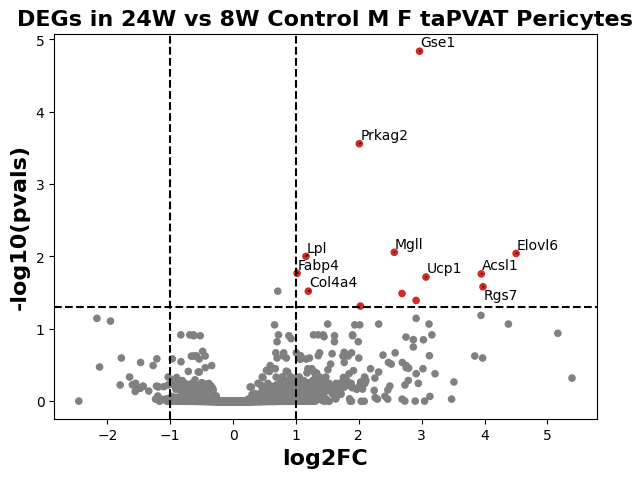

Comparing across time in taPVAT Mesothelial_Cells


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.02 seconds.

Fitting dispersion trend curve...
... done in 3.79 seconds.

Fitting MAP dispersions...
... done in 6.60 seconds.

Fitting LFCs...
... done in 4.54 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



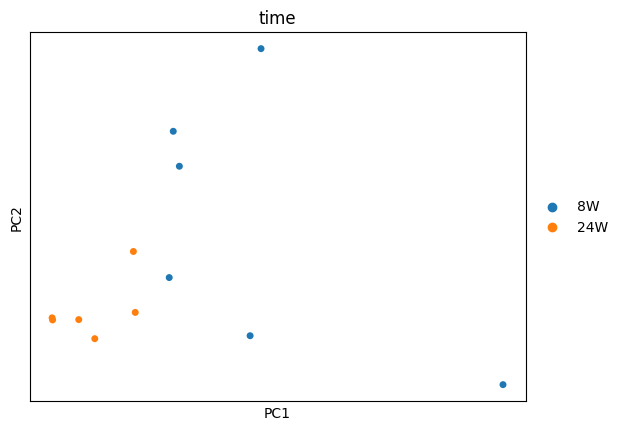

Running Wald tests...


Log2 fold change & Wald test p-value: time 24W vs 8W


... done in 7.52 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4930455H04Rik    0.205993        0.324822  2.346257  0.138443  0.889891   
6330411D24Rik    0.170801        0.601866  2.367451  0.254225  0.799321   
A3galt2          0.621357        1.363371  1.258909  1.082978  0.278818   
AABR07000398.1  97.695007       -0.247253  0.378438 -0.653351  0.513530   
AABR07000544.1   0.443750       -0.929539  1.806161 -0.514649  0.606798   
...                   ...             ...       ...       ...       ...   
hist1h2ail2      1.799660        0.262382  0.789353  0.332402  0.739586   
mrpl11           0.946579       -0.426698  1.121061 -0.380620  0.703485   
mrpl24           3.475524       -0.143783  0.633773 -0.226868  0.820526   
mrpl9            0.835117       -2.335795  1.587648 -1.471229  0.141229   
rnf141           4.184674       -0.423513  0.532642 -0.795117  0.426545   

                    padj  
4930455H04Rik   0.999901  
6330411D24Rik   0.999901  
A3galt2         0.999901  
AABR07000398.1  0.999901  
AABR07000544.1  0.999901  
...                  ...  
hist1h2ail2     0.999901  
mrpl11          0.999901  
mrpl24          0.999901  
mrpl9           0.999901  
rnf141          0.999901  

[12413 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Mesothelial_Cells_24W_Control_M_F_vs_8W_Control_M_F_time_comparison....


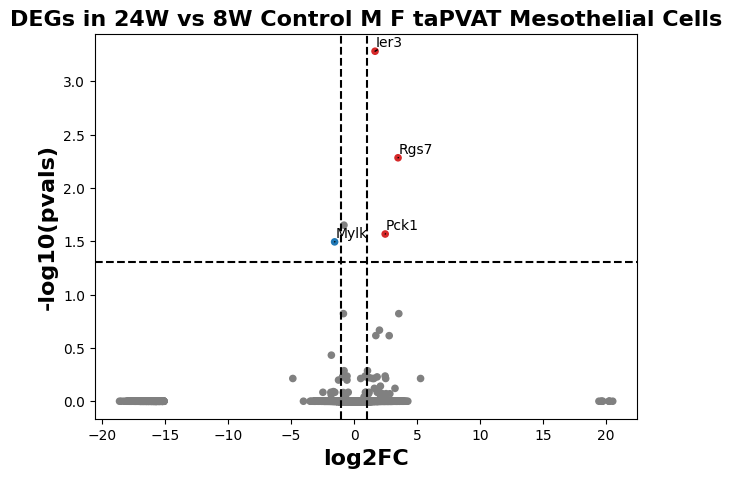

Comparing across time in taPVAT Neuronal_Cells
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_01     2
P_CTRL_8W_F_02     2
P_CTRL_8W_M_01     2
P_CTRL_8W_M_02     1
P_CTRL_8W_M_03     1
P_CTRL_24W_F_03    1
Name: count, dtype: int64
Comparing across time in taPVAT SMCs
There are less than 3 cells of this cell type in the following samples:
sample_id
P_CTRL_8W_F_03    2
P_CTRL_8W_M_01    2
P_CTRL_8W_M_03    1
Name: count, dtype: int64
Comparing across diet in taPVAT Fibroblasts


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.93 seconds.

Fitting dispersion trend curve...
... done in 4.67 seconds.

Fitting MAP dispersions...
... done in 7.75 seconds.

Fitting LFCs...
... done in 5.02 seconds.

Refitting 0 outliers.

/mnt/home/terrianl/anaconda3/envs/pydeseqEnv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



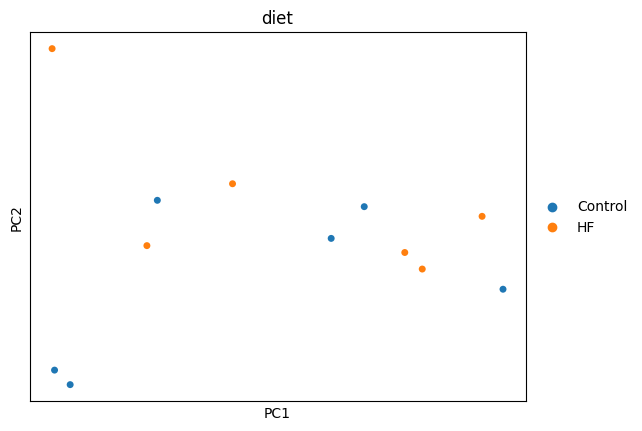

Running Wald tests...


Log2 fold change & Wald test p-value: diet HF vs Control


... done in 7.70 seconds.



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
4933400A11Rik     0.344239       -1.181697  1.869880 -0.631964  0.527410   
6330411D24Rik     0.788232       -0.615696  1.209404 -0.509090  0.610689   
A1cf              0.221256       -1.486993  2.399298 -0.619762  0.535415   
A3galt2           6.493252        0.332630  0.581547  0.571975  0.567339   
AABR07000398.1  711.187590        0.273662  0.232572  1.176675  0.239325   
...                    ...             ...       ...       ...       ...   
Zzz3             81.750968       -0.156087  0.155813 -1.001755  0.316462   
mrpl11            5.198889        1.250886  0.589782  2.120931  0.033928   
mrpl24           11.264785        0.104742  0.359005  0.291756  0.770473   
mrpl9             9.696149        0.423620  0.395734  1.070468  0.284409   
rnf141           15.835575        0.147770  0.288704  0.511840  0.608763   

                    padj  
4933400A11Rik        NaN  
6330411D24Rik        NaN  
A1cf                 NaN  
A3galt2              NaN  
AABR07000398.1  0.736720  
...                  ...  
Zzz3            0.797091  
mrpl11               NaN  
mrpl24               NaN  
mrpl9                NaN  
rnf141          0.932045  

[15124 rows x 6 columns]

/mnt/ufs18/home-149/terrianl/Documents/PVAT_snRNAseq_Work/taPVAT_8W_24W_M_F_HF_CTRL_PAPER3_CLEANED_V2/code/custom_functions_pydeseqEnv.py:363: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



files saved to: ../output/DEGs/taPVAT_Fibroblasts_HF_8W_M_F_vs_Control_8W_M_F_diet_comparison....


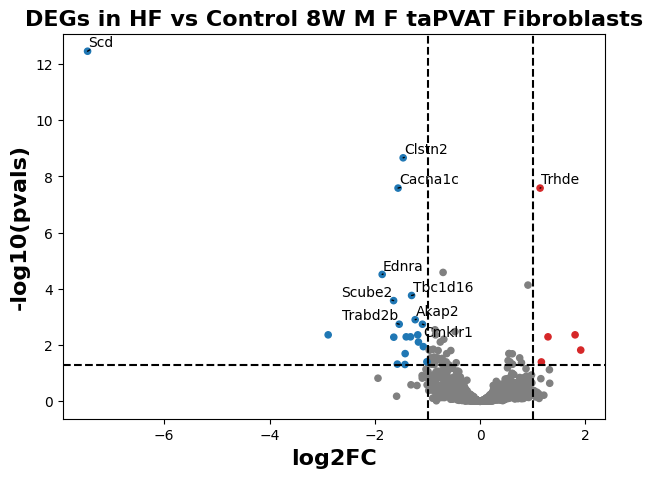

Comparing across diet in taPVAT Adipocytes


In [ ]:
%%time
### Mid level comparisons across 8 broad cell types
deseqRes = []

group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & (adata.obs[sub_list[i]] == sub_id[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        ### Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        ### Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'mid'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()

deseqResults5 = pd.concat(deseqRes)
deseqResults5.to_csv('../output/DEGs/taPVAT_celltype_broad_mid_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Mid level comparisons across 28 specific cell types
deseqRes = []

group_list = ['time', 'time', 'diet', 'diet', 'sex', 'sex', 'diet', 'diet', 'time', 'time', 'sex', 'sex']
group1_list = ['8W', '8W', 'Control', 'Control', 'M', 'M', 'Control', 'Control', '8W', '8W', 'M', 'M']
group2_list = ['24W', '24W', 'HF', 'HF', 'F', 'F', 'HF', 'HF', '24W', '24W', 'F', 'F']

sub_list = ['diet', 'diet', 'time', 'time', 'diet', 'diet', 'sex', 'sex', 'sex', 'sex', 'time', 'time']
sub_id = ['HF', 'Control', '8W', '24W', 'HF', 'Control', 'M', 'F', 'M', 'F', '8W', '24W']

more_info_list = ['_HF_M_F', '_Control_M_F', '_8W_M_F', '_24W_M_F', '_HF_8W_24W', '_Control_8W_24W',
                  '_M_8W_24W', '_F_8W_24W', '_M_Control_HF', '_F_Control_HF', '_8W_Control_HF', '_24W_Control_HF']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype'] == celltype) & (adata.obs[sub_list[i]] == sub_id[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = 'None'
            de['sub_id_2'] = 'None'
            de['level'] = 'mid'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults6 = pd.concat(deseqRes)
deseqResults6.to_csv('../output/DEGs/taPVAT_celltype_mid_level_deseq_all_genes_all.txt', sep = '\t')

## Low-level comparisons

In [ ]:
%%time
### Low-level comparisons across whole-tissue
deseqRes = []

celltype = 'whole_tissue'
group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

for i in range(len(group_list)):
    print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
    adata_subset = adata[(adata.obs[sub_list[i]] == sub_id[i]) & (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()   
          
    celltype = celltype
    group = group_list[i]
    group1 = group1_list[i] 
    group2 = group2_list[i]
    more_info = more_info_list[i]

    # Get the counts of cells per sample and check if any are less than 3
    sample_counts = adata_subset.obs['sample_id'].value_counts()
    failing_samples = sample_counts[sample_counts < 3]

    # Check if there are any failing samples before moving on to DEG analysis
    if not failing_samples.empty:
        print("There are less than 3 cells of this cell type in the following samples:")
        print(failing_samples)
        deseqRes
    else:
        ### Run DESeq and save results
        de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
        de['subset'] = sub_list[i]
        de['sub_id'] = sub_id[i]
        de['sub_2'] = sub_list_2[i]
        de['sub_id_2'] = sub_id_2[i]
        de['level'] = 'low'
        deseqRes.append(de)

        ### Generate and save volcano plots
        plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
        plt.show()
    
deseqResults7 = pd.concat(deseqRes)
deseqResults7.to_csv('../output/DEGs/taPVAT_whole_tissue_low_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Low level comparisons across 8 broad cell types
deseqRes = []

group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

for i in range(len(group_list)):
    for celltype in adata.obs.celltype_broad.unique():
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & 
                             (adata.obs[sub_list[i]] == sub_id[i]) &
                             (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = sub_list_2[i]
            de['sub_id_2'] = sub_id_2[i]
            de['level'] = 'low'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults8 = pd.concat(deseqRes)
deseqResults8.to_csv('../output/DEGs/taPVAT_celltype_broad_low_level_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
%%time
### Low level comparisons across 28 specific cell types
deseqRes = []

group_list = ['sex', 'sex', 'sex', 'sex', 'time', 'time', 'time', 'time', 'diet', 'diet', 'diet', 'diet']
group1_list = ['M', 'M', 'M', 'M', '8W', '8W', '8W', '8W', 'Control', 'Control', 'Control', 'Control']
group2_list = ['F', 'F', 'F', 'F', '24W', '24W', '24W', '24W', 'HF', 'HF',  'HF', 'HF']

sub_list = ['diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'diet', 'time', 'time', 'time', 'time']
sub_id = ['HF', 'HF', 'Control', 'Control', 'HF', 'HF', 'Control', 'Control', '8W', '8W', '24W', '24W']

sub_list_2 = ['time', 'time', 'time', 'time', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex']
sub_id_2 = ['8W', '24W', '8W', '24W', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

more_info_list = ['_HF_8W', '_HF_24W', '_Control_8W', '_Control_24W', '_HF_M', '_HF_F',
                  '_Control_M', '_Control_F', '_8W_M', '_8W_F', '_24W_M', '_24W_F']

celltypes = adata.obs.celltype.unique()
excluded_celltypes = ['Mesothelial_Cells', 'Pericytes', 'SMCs', 'Neuronal_Cells']
filtered_celltypes = [ct for ct in celltypes if ct not in excluded_celltypes]

for i in range(len(group_list)):
    for celltype in filtered_celltypes:
        print(f'Comparing across {group_list[i]} in taPVAT {celltype}')
        adata_subset = adata[(adata.obs['celltype'] == celltype) & 
                             (adata.obs[sub_list[i]] == sub_id[i]) &
                             (adata.obs[sub_list_2[i]] == sub_id_2[i])].copy()
              
        celltype = celltype
        group = group_list[i]
        group1 = group1_list[i] 
        group2 = group2_list[i]
        more_info = more_info_list[i]
        
        # Get the counts of cells per sample and check if any are less than 3
        sample_counts = adata_subset.obs['sample_id'].value_counts()
        failing_samples = sample_counts[sample_counts < 3]

        # Check if there are any failing samples before moving on to DEG analysis
        if not failing_samples.empty:
            print("There are less than 3 cells of this cell type in the following samples:")
            print(failing_samples)
            deseqRes
        else:
            ### Run DESeq and save results
            de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
            de['subset'] = sub_list[i]
            de['sub_id'] = sub_id[i]
            de['sub_2'] = sub_list_2[i]
            de['sub_id_2'] = sub_id_2[i]
            de['level'] = 'low'
            deseqRes.append(de)

            ### Generate and save volcano plots
            plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = True)
            plt.show()
        
deseqResults9 = pd.concat(deseqRes)
deseqResults9.to_csv('../output/DEGs/taPVAT_celltype_low_level_deseq_all_genes_all.txt', sep = '\t')

## Saving all DESeq results as a single tsv file

In [ ]:
deseqResults1 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults2 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults3 = pd.read_csv('../output/DEGs/taPVAT_celltype_high_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults4 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults5 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults6 = pd.read_csv('../output/DEGs/taPVAT_celltype_mid_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults7 = pd.read_csv('../output/DEGs/taPVAT_whole_tissue_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults8 = pd.read_csv('../output/DEGs/taPVAT_celltype_broad_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)
deseqResults9 = pd.read_csv('../output/DEGs/taPVAT_celltype_low_level_deseq_all_genes_all.txt', sep = '\t', index_col = 0)

In [ ]:
deseqResults_list = [deseqResults1, deseqResults2, deseqResults3, deseqResults4, deseqResults5,
                    deseqResults6, deseqResults7, deseqResults8, deseqResults9]
deseqResults_all = pd.concat(deseqResults_list)

In [ ]:
deseqResults_all

In [ ]:
deseqResults_all.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_genes_all.txt', sep = '\t')

In [ ]:
deseq_degs_all = deseqResults_all[deseqResults_all.padj <= 0.05]

In [ ]:
deseq_degs_all = deseqResults_all[(deseqResults_all.padj <= 0.05) & ((deseqResults_all.log2FoldChange >= 1)|(deseqResults_all.log2FoldChange <= -1))]\
    .sort_values('stat', ascending = False)

In [ ]:
deseq_degs_all.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05.txt', sep = '\t')

In [ ]:
top_genes = deseq_degs_all[deseq_degs_all['log2FoldChange'] >= 1]
bottom_genes = deseq_degs_all[deseq_degs_all['log2FoldChange'] <= -1]

In [ ]:
top_genes.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05_top.txt', sep = '\t')
bottom_genes.to_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_degs_pvalue_0.05_bottom.txt', sep = '\t')

## To do a single comparison

In [ ]:
# group = 'diet' #change to the group you want to compare across
# group1 = 'Control'
# group2 = 'HF'
# subset = 'time'
# subset_id = '24W'
# subset_2 = 'sex'
# subset_id_2 = 'F'
# more_info = 'testing_custom_function'

# celltype = 'Adipocytes'
# adata_subset = adata[(adata.obs['celltype_broad'] == celltype) & (adata.obs[subset] == subset_id) & (adata.obs[subset_2] == subset_id_2)].copy() #adata.copy() #

# # Get the counts of cells per sample and check if any are less than 3
# sample_counts = adata_subset.obs['sample_id'].value_counts()
# failing_samples = sample_counts[sample_counts < 3]

# # Check if there are any failing samples before moving on to DEG analysis
# if not failing_samples.empty:
#     print("There are less than 3 cells of this cell type in the following samples:")
#     print(failing_samples)

# else:
#     de = return_de(adata_subset, celltype, group, group1, group2, more_info = more_info)
#     plot_volcano_df(de, celltype, group, group1, group2, more_info, return_fig = False, save = False)
#     plot_volcano_df_html(de, celltype, group, group1, group2, more_info, return_fig = False, save = False)
#     plt.show()

## Heatmap

In [ ]:
### Creates a heatmap of top 5 up or downregulated genes in each celltype, I think?
### This is ugly and I don't like it.
# combined_indices = top_genes_df.index.tolist() + bottom_genes_df.index.tolist()

# selected_genes =  list(set(combined_indices))
# selected_data = deseqResults.loc[selected_genes, :]
# selected_data['gene_name'] = selected_data.index
# selected_data = selected_data[selected_data['padj'] <= 0.05]

# # Pivot the DataFrame to wide format for heatmap plotting
# heatmap_data = selected_data.pivot(index='celltype', columns='gene_name', values='log2FoldChange')

# # Fill missing values with 0 in the heatmap_data
# heatmap_data_filled = heatmap_data.fillna(0)

# # Create the heatmap with clustered columns using Seaborn clustermap
# plt.figure(figsize=(20, 12))
# clustered_heatmap = sns.clustermap(
#     heatmap_data_filled,  # Use the filled heatmap_data
#     cmap='coolwarm',  # Choose a colormap
#     annot=False,  # Remove values in cells
#     fmt='',  # Empty format string
#     linewidths=1,  # Add black borders
#     linecolor='black',  # Border color
#     cbar=True,
#     cbar_kws={'label': 'Log2 Fold Change'},  # Customize colorbar label
#     vmin=-10,  # Minimum value for the color scale
#     vmax=10,   # Maximum value for the color scale
#     center=0,  # Set the middle point of the color scale to 0
#     square=True,  # Make the boxes square
#     #row_cluster = False,
#     method='complete',  # Specify clustering method ('single', 'complete', 'average', etc.)
#     figsize=(20, 12)  # Set the figure size
# )

# # Add title and labels
# plt.title('DESeq2 Results Heatmap with Clustering')
# plt.xlabel('Gene Name')
# plt.ylabel('Cell Type')

# # Save the figure as a PDF
# plt.savefig('../output/DEGs/HF_' + celltype + '_vs_CTL_' + celltype + '_Heat_Map.pdf', format='pdf', bbox_inches='tight', dpi=600)

# # Show the plot
# plt.show()
